In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools
import sys

from clustering_scripts import *

In [2]:
def simple_gali(gali_matrix):
    if np.any(np.isnan(gali_matrix)):
        return np.nan
    else:
        _, s, _ = np.linalg.svd(gali_matrix)
        return np.prod(s)


def gali(gali_matrix):
    gali_matrix = np.transpose(gali_matrix, (2, 0, 1))
    gali = []
    for m in (gali_matrix):
        gali.append(simple_gali(m))
    gali = np.asarray(gali)
    return gali

In [3]:
OUTDIR = "/home/HPC/camontan/lhc_dynamic_indicators/out/htcondor_out"
TUNEDIR = '/home/HPC/camontan/lhc_dynamic_indicators/out/merged_tune'
IMGDIR = '/home/HPC/camontan/lhc_dynamic_indicators/img/paper_tier/'

In [4]:
# set latex rendering for plots
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [5]:
lattice_list = ["b1_worst", "b1_avg", "b1_best", "b2_worst", "b2_avg", "b2_best"]
lattice_list = ["b1_worst", "b1_avg", "b1_best"]
extent_list = [
    np.array([0.0, 0.00125, 0.0, 0.00125]),
    np.array([0.0, 0.00130, 0.0, 0.00130]),
    np.array([0.0, 0.00140, 0.0, 0.00140]),
]

## TODO : evaluate the extents and convert them to sigma units

##### END TODO #####

lattice_name_list = ["Worst", "Median", "Best"]
zeta_list = ["zeta_min", "zeta_avg", "zeta_max"]
zeta_name_list = ["0.0", "0.15", "0.3"]

In [6]:
variables = ["x", "px", "y", "py", "zeta", "delta"]
list(itertools.combinations(variables, 2))

[('x', 'px'),
 ('x', 'y'),
 ('x', 'py'),
 ('x', 'zeta'),
 ('x', 'delta'),
 ('px', 'y'),
 ('px', 'py'),
 ('px', 'zeta'),
 ('px', 'delta'),
 ('y', 'py'),
 ('y', 'zeta'),
 ('y', 'delta'),
 ('py', 'zeta'),
 ('py', 'delta'),
 ('zeta', 'delta')]

In [6]:
import scipy.constants as const

def x_m_to_sigma(x_m):
    proton_mass = const.m_p # kg

    # energy at 7 TeV
    proton_energy = 7000e9 # eV
    # tev to joule
    proton_energy *= const.e # J

    # get gamma
    proton_gamma = proton_energy/proton_mass/const.c**2

    # get beta
    proton_beta = np.sqrt(1 - 1/proton_gamma**2)

    beta_x = 117.83 # m
    beta_y = 219.64 # m
    beta_gamma = proton_beta * proton_gamma
    nom_emittance = 2.5e-6 # m

    phys_emittance = nom_emittance / (beta_gamma)

    return x_m / (np.sqrt(beta_x * phys_emittance))

def y_m_to_sigma(y_m):
    proton_mass = const.m_p # kg

    # energy at 7 TeV
    proton_energy = 7000e9 # eV
    # tev to joule
    proton_energy *= const.e # J

    # get gamma
    proton_gamma = proton_energy/proton_mass/const.c**2

    # get beta
    proton_beta = np.sqrt(1 - 1/proton_gamma**2)

    beta_x = 117.83 # m
    beta_y = 219.64 # m
    beta_gamma = proton_beta * proton_gamma
    nom_emittance = 2.5e-6 # m

    phys_emittance = nom_emittance / (beta_gamma)

    return y_m / (np.sqrt(beta_y * phys_emittance))

In [ ]:
x_m_to_sigma(1e-3)

5.032533521001068

In [7]:
l_list = []
l_name_list = []
e_list = []
e_list_sigma = []
z_list = []
z_name_list = []
stability_list = []
mask_list = []
title_plot_list = []

for (lattice, extent, l_name), (zeta, z_name) in itertools.product(zip(lattice_list, extent_list, lattice_name_list), zip(zeta_list, zeta_name_list)):
    l_list.append(lattice)
    l_name_list.append(l_name)
    e_list.append(extent)
    z_list.append(zeta)
    z_name_list.append(z_name)

    extent_sigma = np.array([x_m_to_sigma(extent[0]), x_m_to_sigma(extent[1]), y_m_to_sigma(extent[2]), y_m_to_sigma(extent[3])])
    e_list_sigma.append(extent_sigma)

    title_plot_list.append(f"{l_name} seed, $\\zeta={z_name}$")

    stability_file = h5py.File(os.path.join(OUTDIR, f"stability_{lattice}_{zeta}.h5"), "r")
    log_disp_file = h5py.File(os.path.join(OUTDIR, f"log_displacement_singles_{lattice}_{zeta}.h5"), "r")
    t = 100000
    stability = stability_file["stability"][:]
    stability_list.append(stability)
    mask = np.log10(stability) == 5
    mask_list.append(mask)

    times = np.array(sorted(int(j) for j in log_disp_file[f"disp/x/log_disp"].keys()))

In [ ]:
e_list

[array([0.     , 0.00125, 0.     , 0.00125]),
 array([0.     , 0.00125, 0.     , 0.00125]),
 array([0.     , 0.00125, 0.     , 0.00125]),
 array([0.    , 0.0013, 0.    , 0.0013]),
 array([0.    , 0.0013, 0.    , 0.0013]),
 array([0.    , 0.0013, 0.    , 0.0013]),
 array([0.    , 0.0014, 0.    , 0.0014]),
 array([0.    , 0.0014, 0.    , 0.0014]),
 array([0.    , 0.0014, 0.    , 0.0014])]

In [8]:
lattice_list = ["b1_worst", "b1_avg", "b1_best", "b2_worst", "b2_avg", "b2_best"]
lattice_list = ["b1_worst", "b1_avg", "b1_best"]
extent_list = [
    np.array([0.0, 0.00125, 0.0, 0.00125]),
    np.array([0.0, 0.00130, 0.0, 0.00130]),
    np.array([0.0, 0.00140, 0.0, 0.00140]),
]
lattice_name_list = ["Worst", "Median", "Best"]
zeta_list = ["zeta_min", "zeta_avg", "zeta_max"]
zeta_name_list = ["0.0", "0.15", "0.3"]

In [9]:
files = os.listdir("/home/HPC/camontan/lhc_dynamic_indicators/out/quick_scan/")

In [11]:
bounds = 0.002
values = []
for f in tqdm(files):
    h5 = h5py.File(f"/home/HPC/camontan/lhc_dynamic_indicators/out/quick_scan/{f}", mode="r")
    stab = h5["stability"][:].reshape(100, 100)
    h5.close()

    # plt.figure()
    # plt.imshow(np.log10(stab), origin="lower", extent=[0, bounds, 0, bounds])
    # plt.colorbar(label="log10(stability)")
    # plt.title(f[:-3])
    # plt.tight_layout()
    # plt.savefig(f"/home/HPC/camontan/lhc_dynamic_indicators/img/quick_scan/{f[:-3]}.jpg")
    # plt.close("all")

    s_mask = stab==1000
    values.append((f, np.count_nonzero(s_mask)))

100%|██████████| 120/120 [00:02<00:00, 45.08it/s]


In [12]:
sorted_vals = list(filter(lambda x: "b1" in x[0], sorted(values, key=lambda x: x[1])))
sorted_vals

element_min = sorted_vals[0][0]
element_max = sorted_vals[-1][0]
element_medium = sorted_vals[len(sorted_vals)//2][0]

/tmp/ipykernel_5522/2143936327.py:5: RuntimeWarning: divide by zero encountered in log10
  img = axs[0].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]), aspect="auto")
/tmp/ipykernel_5522/2143936327.py:24: RuntimeWarning: divide by zero encountered in log10
  axs[1].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]), aspect="auto")
/tmp/ipykernel_5522/2143936327.py:43: RuntimeWarning: divide by zero encountered in log10
  axs[2].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]), aspect="auto")
/tmp/ipykernel_5522/2143936327.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


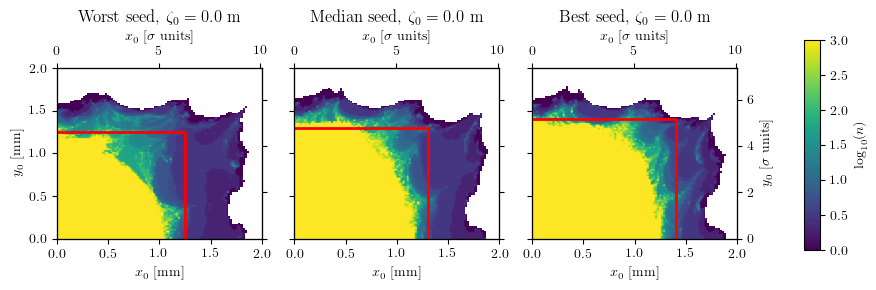

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

with h5py.File(f"/home/HPC/camontan/lhc_dynamic_indicators/out/quick_scan/{element_min}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
img = axs[0].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]), aspect="auto")
# draw the borders of a red rectangle
axs[0].plot([0, extent_list[0][1]*1000, extent_list[0][1]*1000], [extent_list[0][1]*1000, extent_list[0][1]*1000, 0], color="red", linewidth=2)

axs[0].set_title("Worst seed, $\\zeta_0=0.0$ m")
axs[0].set_xlabel("$x_0$ [mm]")
axs[0].set_ylabel("$y_0$ [mm]")

axs_bis = axs[0].twinx()
axs_ter = axs[0].twiny()
axs_bis.set_ylim(y_m_to_sigma(0), y_m_to_sigma(bounds))
axs_ter.set_xlim(x_m_to_sigma(0), x_m_to_sigma(bounds))

axs_ter.set_xlabel("$x_0$ [$\\sigma$ units]")
# remove tick labels from axs_bis
axs_bis.set_yticklabels([])

with h5py.File(f"/home/HPC/camontan/lhc_dynamic_indicators/out/quick_scan/{element_medium}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
axs[1].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]), aspect="auto")
# draw the borders of a red rectangle
axs[1].plot([0, extent_list[1][1]*1000, extent_list[1][1]*1000], [extent_list[1][1]*1000, extent_list[1][1]*1000, 0], color="red", linewidth=2)
axs[1].set_title("Median seed, $\\zeta_0=0.0$ m")
# axs[1].set_ylabel("$y_0$ [mm]")

axs_bis = axs[1].twinx()
axs_ter = axs[1].twiny()
axs_bis.set_ylim(y_m_to_sigma(0), y_m_to_sigma(bounds))
axs_ter.set_xlim(x_m_to_sigma(0), x_m_to_sigma(bounds))

axs_ter.set_xlabel("$x_0$ [$\\sigma$ units]")
# remove ticks from axs_bis
axs[1].set_yticklabels([])
axs_bis.set_yticklabels([])
axs[1].set_xlabel("$x_0$ [mm]")

with h5py.File(f"/home/HPC/camontan/lhc_dynamic_indicators/out/quick_scan/{element_max}", mode="r") as h5:
    stab = h5["stability"][:].reshape(100, 100)
axs[2].imshow(np.log10(stab), origin="lower", extent=1000 * np.array([0, bounds, 0, bounds]), aspect="auto")
# draw the borders of a red rectangle
axs[2].plot([0, extent_list[2][1]*1000, extent_list[2][1]*1000], [extent_list[2][1]*1000, extent_list[2][1]*1000, 0], color="red", linewidth=2)
axs[2].set_title("Best seed, $\\zeta_0=0.0$ m")
axs[2].set_xlabel("$x_0$ [mm]")

axs_bis = axs[2].twinx()
axs_ter = axs[2].twiny()
axs_bis.set_ylim(y_m_to_sigma(0), y_m_to_sigma(bounds))
axs_ter.set_xlim(x_m_to_sigma(0), x_m_to_sigma(bounds))

axs_ter.set_xlabel("$x_0$ [$\\sigma$ units]")
# remove ticks from axs_bis
axs[2].set_yticklabels([])
# axs_bis.set_yticklabels([])
axs_bis.set_ylabel("$y_0$ [$\\sigma$ units]")

# divider = make_axes_locatable(axs[0])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(img, cax=cax, label="$\\log_{{10}}(n)$")
# divider = make_axes_locatable(axs[1])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(img, cax=cax, label="$\\log_{{10}}(n)$")
# divider = make_axes_locatable(axs[2])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(img, cax=cax, label="$\\log_{{10}}(n)$")

cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(img, cax=cbar_ax, orientation="vertical", label="$\\log_{10}(n)$")

plt.tight_layout()

plt.savefig(os.path.join(IMGDIR, "quick_scan.png"), dpi=600, bbox_inches="tight")

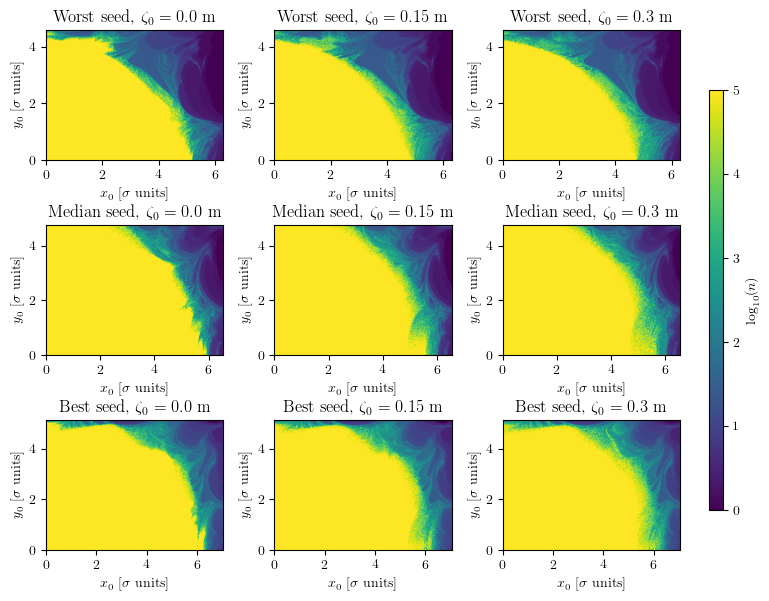

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(7, 6))

for i, ((lattice, extent, l_name), (zeta, z_name)) in enumerate(itertools.product(zip(lattice_list, extent_list, lattice_name_list), zip(zeta_list, zeta_name_list))):

    ax = axs[i // 3, i % 3]
    # im=ax.imshow(np.log10(stability_list[i]).reshape(300, 300), origin="lower", extent=1000 * e_list[i])
    im=ax.imshow(np.log10(stability_list[i]).reshape(300, 300), origin="lower", extent=e_list_sigma[i])
    ax.set_title(f"{l_name} seed, $\\zeta_0={z_name}$ m")
    ax.set_xlabel("$x_0$ [$\\sigma$ units]")
    ax.set_ylabel("$y_0$ [$\\sigma$ units]")

plt.tight_layout()

# add vertical colorbar to the right
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, orientation="vertical", label="$\\log_{10}(n)$")
plt.savefig(os.path.join(IMGDIR, "stability.png"), dpi=600, bbox_inches="tight")

In [13]:
fli_x_data_list = []
fli_px_data_list = []
fli_y_data_list = []
fli_py_data_list = []
fli_zeta_data_list = []
fli_delta_data_list = []

fli_x_post_data_list = []
fli_px_post_data_list = []
fli_y_post_data_list = []
fli_py_post_data_list = []
fli_zeta_post_data_list = []
fli_delta_post_data_list = []

fli_x_thresh_list = []
fli_px_thresh_list = []
fli_y_thresh_list = []
fli_py_thresh_list = []
fli_zeta_thresh_list = []
fli_delta_thresh_list = []

fli_x_guesses_list = []
fli_px_guesses_list = []
fli_y_guesses_list = []
fli_py_guesses_list = []
fli_zeta_guesses_list = []
fli_delta_guesses_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    log_disp_file = h5py.File(os.path.join(OUTDIR, f"log_displacement_singles_{lattice}_{zeta}.h5"), "r")
    for q in range(6):
    
        data_list = []
        post_data_list = []
        thresh_list = []
        guesses_list = []
        for t in times:
            if q == 0:
                disp = log_disp_file[f"disp/x/log_disp/{t}"][:]
            elif q == 1:
                disp = log_disp_file[f"disp/px/log_disp/{t}"][:]
            elif q == 2:
                disp = log_disp_file[f"disp/y/log_disp/{t}"][:]
            elif q == 3:
                disp = log_disp_file[f"disp/py/log_disp/{t}"][:]
            elif q == 4:
                disp = log_disp_file[f"disp/zeta/log_disp/{t}"][:]
            elif q == 5:
                disp = log_disp_file[f"disp/delta/log_disp/{t}"][:]
            data_list.append(disp)

            disp[~mask_list[i]] = np.nan
            if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
                disp[mask_list[i]] = 1e-14
                
            disp = np.log10(disp / t)
            disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmax(disp)
            disp[np.isinf(disp)] = np.nan
            disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmin(disp)

            post_data_list.append(disp)

            try:
                threshold = find_threshold_density(disp[mask_list[i]], where_chaos="higher")
            except:
                threshold = 1e-13
            thresh_list.append(threshold)
        
        if q == 0:
            fli_x_data_list.append(data_list)
            fli_x_post_data_list.append(post_data_list)
            fli_x_thresh_list.append(thresh_list)
            fli_x_guesses_list.append(guesses_list)
        elif q == 1:
            fli_px_data_list.append(data_list)
            fli_px_post_data_list.append(post_data_list)
            fli_px_thresh_list.append(thresh_list)
            fli_px_guesses_list.append(guesses_list)
        elif q == 2:
            fli_y_data_list.append(data_list)
            fli_y_post_data_list.append(post_data_list)
            fli_y_thresh_list.append(thresh_list)
            fli_y_guesses_list.append(guesses_list)
        elif q == 3:
            fli_py_data_list.append(data_list)
            fli_py_post_data_list.append(post_data_list)
            fli_py_thresh_list.append(thresh_list)
            fli_py_guesses_list.append(guesses_list)
        elif q == 4:
            fli_zeta_data_list.append(data_list)
            fli_zeta_post_data_list.append(post_data_list)
            fli_zeta_thresh_list.append(thresh_list)
            fli_zeta_guesses_list.append(guesses_list)
        elif q == 5:
            fli_delta_data_list.append(data_list)
            fli_delta_post_data_list.append(post_data_list)
            fli_delta_thresh_list.append(thresh_list)
            fli_delta_guesses_list.append(guesses_list)

/tmp/ipykernel_17859/3571279590.py:56: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_17859/3571279590.py:56: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_17859/3571279590.py:56: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_17859/3571279590.py:56: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_17859/3571279590.py:56: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_17859/3571279590.py:56: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_17859/3571279590.py:56: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_17859/3571279590.py:56: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp / t)
/tmp/ipykernel_17859/3571279590.py:56: RuntimeWarning: i

In [14]:
reference_x_list = []
reference_y_list = []

sigma_x_list = []
sigma_y_list = []

radius_phys_list = []
radius_sigma_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    log_disp_file = h5py.File(os.path.join(OUTDIR, f"log_displacement_singles_{lattice}_{zeta}.h5"), "r")

    reference_x_list.append(log_disp_file["reference/initial/x"][:])
    reference_y_list.append(log_disp_file["reference/initial/y"][:])

    radius_phys_list.append(
        np.sqrt(reference_x_list[-1]**2 + reference_y_list[-1]**2)
    )

    sigma_x_list.append(x_m_to_sigma(log_disp_file["reference/initial/x"][:]))
    sigma_y_list.append(y_m_to_sigma(log_disp_file["reference/initial/y"][:]))

    radius_sigma_list.append(
        np.sqrt(sigma_x_list[-1]**2 + sigma_y_list[-1]**2)
    )


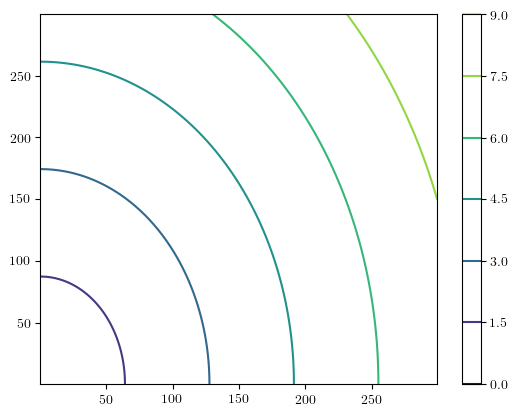

In [ ]:
# plt.figure()
# plt.contour(radius_phys_list[-1].reshape(300,300), origin="lower")
# plt.colorbar()
plt.figure()
plt.contour(radius_sigma_list[-1].reshape(300,300), origin="lower")
plt.colorbar()

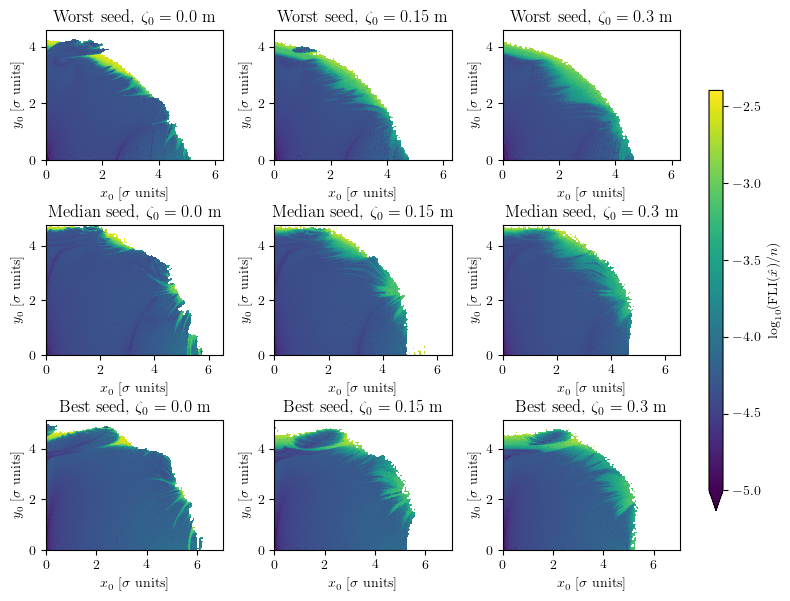

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(7, 6))

for i, ((lattice, extent, l_name), (zeta, z_name)) in enumerate(itertools.product(zip(lattice_list, extent_list, lattice_name_list), zip(zeta_list, zeta_name_list))):

    ax = axs[i // 3, i % 3]
    # im=ax.imshow(np.log10(stability_list[i]).reshape(300, 300), origin="lower", extent=1000 * e_list[i])
    im=ax.imshow((fli_x_post_data_list[i][-1]).reshape(300, 300), origin="lower", extent=e_list_sigma[i], vmin=-5.0, vmax=-2.4)
    ax.set_title(f"{l_name} seed, $\\zeta_0={z_name}$ m")
    ax.set_xlabel("$x_0$ [$\\sigma$ units]")
    ax.set_ylabel("$y_0$ [$\\sigma$ units]")

plt.tight_layout()

# add vertical colorbar to the right
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, orientation="vertical", label="$\\log_{10}($FLI$(\\hat{{x}})/n)$", extend="min")
plt.savefig(os.path.join(IMGDIR, "fli_all.png"), dpi=600, bbox_inches="tight")

In [15]:
flibk_x_data_list = []
flibk_px_data_list = []
flibk_y_data_list = []
flibk_py_data_list = []
flibk_zeta_data_list = []
flibk_delta_data_list = []

flibk_x_post_data_list = []
flibk_px_post_data_list = []
flibk_y_post_data_list = []
flibk_py_post_data_list = []
flibk_zeta_post_data_list = []
flibk_delta_post_data_list = []

flibk_x_thresh_list = []
flibk_px_thresh_list = []
flibk_y_thresh_list = []
flibk_py_thresh_list = []
flibk_zeta_thresh_list = []
flibk_delta_thresh_list = []

flibk_x_guesses_list = []
flibk_px_guesses_list = []
flibk_y_guesses_list = []
flibk_py_guesses_list = []
flibk_zeta_guesses_list = []
flibk_delta_guesses_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    log_disp_file = h5py.File(os.path.join(OUTDIR, f"log_displacement_singles_birkhoff_{lattice}_{zeta}.h5"), "r")
    for q in range(6):
    
        data_list = []
        post_data_list = []
        thresh_list = []
        guesses_list = []
        scores_list = []
        for t in times:
            if q == 0:
                disp = log_disp_file[f"disp/x/log_disp/{t}"][:]
            elif q == 1:
                disp = log_disp_file[f"disp/px/log_disp/{t}"][:]
            elif q == 2:
                disp = log_disp_file[f"disp/y/log_disp/{t}"][:]
            elif q == 3:
                disp = log_disp_file[f"disp/py/log_disp/{t}"][:]
            elif q == 4:
                disp = log_disp_file[f"disp/zeta/log_disp/{t}"][:]
            elif q == 5:
                disp = log_disp_file[f"disp/delta/log_disp/{t}"][:]
            data_list.append(disp)

            disp[~mask_list[i]] = np.nan
            if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
                disp[mask_list[i]] = 1e-14
            under_zero_mask = disp < 0
            disp = np.log10(disp)
            disp[np.isinf(disp)] = np.nan
            disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmax(disp)
            disp[under_zero_mask] = np.nanmin(disp[~under_zero_mask])

            post_data_list.append(disp)

            try:
                threshold = find_threshold_density(disp[mask_list[i]], where_chaos="higher")
            except:
                threshold = -13
            thresh_list.append(threshold)

            guess = disp < threshold
            guess = np.asarray(guess, dtype=float)
            guess[~mask_list[i]] = np.nan
            guesses_list.append(guess)
        
        if q == 0:
            flibk_x_data_list.append(data_list)
            flibk_x_post_data_list.append(post_data_list)
            flibk_x_thresh_list.append(thresh_list)
            flibk_x_guesses_list.append(guesses_list)
        elif q == 1:
            flibk_px_data_list.append(data_list)
            flibk_px_post_data_list.append(post_data_list)
            flibk_px_thresh_list.append(thresh_list)
            flibk_px_guesses_list.append(guesses_list)
        elif q == 2:
            flibk_y_data_list.append(data_list)
            flibk_y_post_data_list.append(post_data_list)
            flibk_y_thresh_list.append(thresh_list)
            flibk_y_guesses_list.append(guesses_list)
        elif q == 3:
            flibk_py_data_list.append(data_list)
            flibk_py_post_data_list.append(post_data_list)
            flibk_py_thresh_list.append(thresh_list)
            flibk_py_guesses_list.append(guesses_list)
        elif q == 4:
            flibk_zeta_data_list.append(data_list)
            flibk_zeta_post_data_list.append(post_data_list)
            flibk_zeta_thresh_list.append(thresh_list)
            flibk_zeta_guesses_list.append(guesses_list)
        elif q == 5:
            flibk_delta_data_list.append(data_list)
            flibk_delta_post_data_list.append(post_data_list)
            flibk_delta_thresh_list.append(thresh_list)
            flibk_delta_guesses_list.append(guesses_list)

/tmp/ipykernel_17859/3392687414.py:57: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_17859/3392687414.py:57: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_17859/3392687414.py:57: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_17859/3392687414.py:57: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_17859/3392687414.py:57: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_17859/3392687414.py:57: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_17859/3392687414.py:57: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_17859/3392687414.py:57: RuntimeWarning: invalid value encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_17859/3392687414.py:57: RuntimeWarning: invalid value encountered in log1

In [16]:
from_sigma = 0.1
to_sigma = 8.5

n_samples = 1000
sigma_sample = np.linspace(from_sigma, to_sigma, n_samples)

In [24]:
bucket_lenght_list = [0.05, 0.1, 0.2, 0.5, 1.0]

thick_lyapunov_wb_evo_list = {t: [] for t in bucket_lenght_list}
thick_lyapunov_wb_evo_std_list = {t: [] for t in bucket_lenght_list}
thick_stability_wb_evo_list = {t: [] for t in bucket_lenght_list}
thick_samples_evo_list = {t: [] for t in bucket_lenght_list}

for i, (idx) in enumerate((range(9))):
    for bucket_lenght in bucket_lenght_list:
        sigma_sample_low = sigma_sample - bucket_lenght / 2
        sigma_sample_high = sigma_sample + bucket_lenght / 2

        data_mean = []
        data_std = []
        
        data_mean_wb = []
        data_std_wb = []

        data_mean_stab = []
        data_std_stab = []
        
        n_samples = []

        for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
            mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)
            
            data_mean.append(np.nanmean(1/10**fli_x_post_data_list[idx][-1][mask]))
            data_std.append(np.nanstd(1/10**fli_x_post_data_list[idx][-1][mask]))
            
            tmp_data = flibk_x_post_data_list[idx][-1][mask].copy()
            tmp_data[tmp_data < -6] = np.nan
            tmp_data = 1/10**tmp_data
            data_mean_wb.append(np.nanmean(tmp_data))
            data_std_wb.append(np.nanstd(tmp_data))
            
            n_samples.append(np.count_nonzero(
                ~np.isnan(fli_x_post_data_list[idx][-1][mask])
            ))

            data_mean_stab.append(np.nanmean(stability_list[idx][mask]))
            data_std_stab.append(np.nanstd(stability_list[idx][mask]))
        
        thick_lyapunov_wb_evo_list[bucket_lenght].append(np.asarray(data_mean_wb))
        thick_lyapunov_wb_evo_std_list[bucket_lenght].append(np.asarray(data_std_wb))

        thick_stability_wb_evo_list[bucket_lenght].append(np.asarray(data_mean_stab))
        
        thick_samples_evo_list[bucket_lenght].append(np.asarray(n_samples))


In [18]:
import matplotlib.pyplot as plt

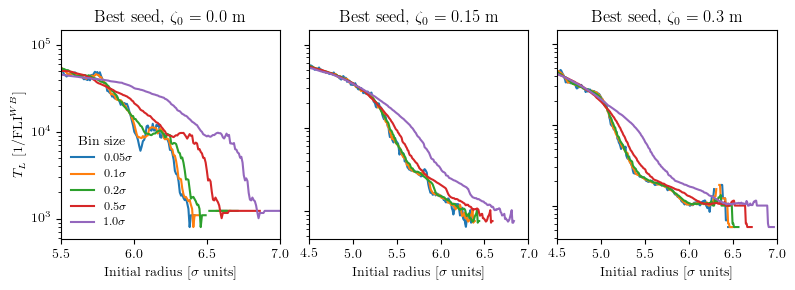

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, ax in zip(range(6,9), axs):
    for bucket_lenght in bucket_lenght_list:
        ax.plot(sigma_sample, thick_lyapunov_wb_evo_list[bucket_lenght][i], label=f"${bucket_lenght} \\sigma$")
    
    ax.set_yscale("log")
    ax.set_xlim(5.5 if i == 6 else 4.5, 7)
    ax.set_ylim(top=1.5e5)
    ax.set_xlabel("Initial radius [$\\sigma$ units]")

    if i > 6:
        ax.set_yticklabels([])
        ax.set_ylabel("")
    else:
        ax.legend(title="Bin size", frameon=False, fontsize="small")
        ax.set_ylabel("$T_L$ $[1/\\mathrm{{FLI}}^{{WB}}]$")

    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i%3]}$ m")

plt.tight_layout()

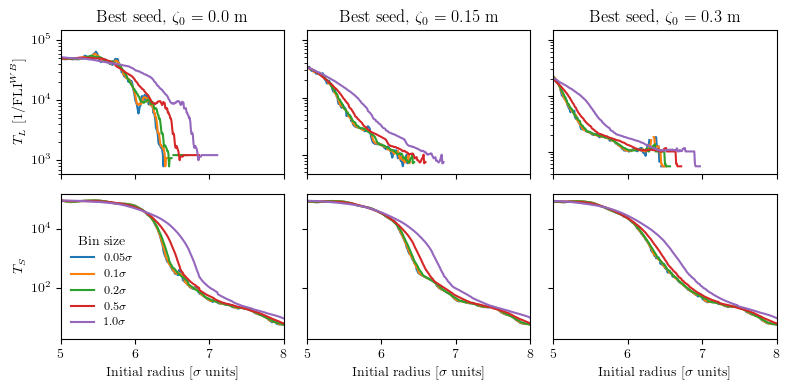

In [38]:
fig, axs = plt.subplots(2, 3, figsize=(8, 4), sharex=True)

for i, ax in zip(range(6,9), axs[0,:]):
    for bucket_lenght in bucket_lenght_list:
        ax.plot(sigma_sample, thick_lyapunov_wb_evo_list[bucket_lenght][i], label=f"${bucket_lenght} \\sigma$")
    
    ax.set_yscale("log")
    ax.set_xlim(5.5 if i == 6 else 4.5, 7)
    ax.set_ylim(top=1.5e5)
    # ax.set_xlabel("Initial radius [$\\sigma$ units]")

    if i > 6:
        ax.set_yticklabels([])
        ax.set_ylabel("")
    else:
        # ax.legend(title="Bin size", frameon=False, fontsize="small")
        ax.set_ylabel("$T_L$ $[1/\\mathrm{{FLI}}^{{WB}}]$")

    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i%3]}$ m")

for i, ax in zip(range(6,9), axs[1,:]):
    for bucket_lenght in bucket_lenght_list:
        ax.plot(sigma_sample, thick_stability_wb_evo_list[bucket_lenght][i], label=f"${bucket_lenght} \\sigma$")
    
    ax.set_yscale("log")
    ax.set_xlim(5.5 if i == 6 else 5, 8)
    ax.set_ylim(top=1.5e5)
    ax.set_xlabel("Initial radius [$\\sigma$ units]")

    if i > 6:
        ax.set_yticklabels([])
        ax.set_ylabel("")
    else:
        ax.legend(title="Bin size", frameon=False, fontsize="small")
        ax.set_ylabel("$T_S$")


    # ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i%3]}$ m")

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "lyapunov_time_vs_thickness.png"), bbox_inches="tight", dpi=600)


In [19]:
lyapunov_evo_list = {t: [] for t in times}
lyapunov_wb_evo_list = {t: [] for t in times}
loss_evo_list = {t: [] for t in times}
lyapunov_evo_std_list = {t: [] for t in times}
lyapunov_wb_evo_std_list = {t: [] for t in times}
loss_evo_std_list = {t: [] for t in times}

samples_evo_list = {t: [] for t in times}

bucket_lenght = 0.2
n_samples = 1000

sigma_sample_low = sigma_sample - bucket_lenght / 2
sigma_sample_high = sigma_sample + bucket_lenght / 2

for i, (idx) in enumerate((range(9))):
    for j, t in list(zip(range(26, len(times), 13), (times[26::13])))[::-1]:
        # print(j, t)
        data_mean = []
        data_std = []
        
        data_mean_wb = []
        data_std_wb = []

        data_mean_stab = []
        data_std_stab = []
        
        n_samples = []

        for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
            mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)
            
            data_mean.append(np.nanmean(1/10**fli_x_post_data_list[idx][j][mask]))
            data_std.append(np.nanstd(1/10**fli_x_post_data_list[idx][j][mask]))
            
            tmp_data = flibk_x_post_data_list[idx][j][mask].copy()
            tmp_data[tmp_data < -6] = np.nan
            tmp_data = 1/10**tmp_data
            data_mean_wb.append(np.nanmean(tmp_data))
            data_std_wb.append(np.nanstd(tmp_data))
            
            n_samples.append(np.count_nonzero(
                ~np.isnan(fli_x_post_data_list[idx][j][mask])
            ))

            data_mean_stab.append(np.nanmean(stability_list[idx][mask]))
            data_std_stab.append(np.nanstd(stability_list[idx][mask]))
        
        lyapunov_evo_list[t].append(np.asarray(data_mean))
        lyapunov_evo_std_list[t].append(np.asarray(data_std))

        lyapunov_wb_evo_list[t].append(np.asarray(data_mean_wb))
        lyapunov_wb_evo_std_list[t].append(np.asarray(data_std_wb))

        loss_evo_list[t].append(np.asarray(data_mean_stab))
        loss_evo_std_list[t].append(np.asarray(data_std_stab))
        
        samples_evo_list[t].append(np.asarray(n_samples))


/tmp/ipykernel_17859/2456997652.py:33: RuntimeWarning: Mean of empty slice
  data_mean.append(np.nanmean(1/10**fli_x_post_data_list[idx][j][mask]))
/tmp/ipykernel_17859/2456997652.py:39: RuntimeWarning: Mean of empty slice
  data_mean_wb.append(np.nanmean(tmp_data))


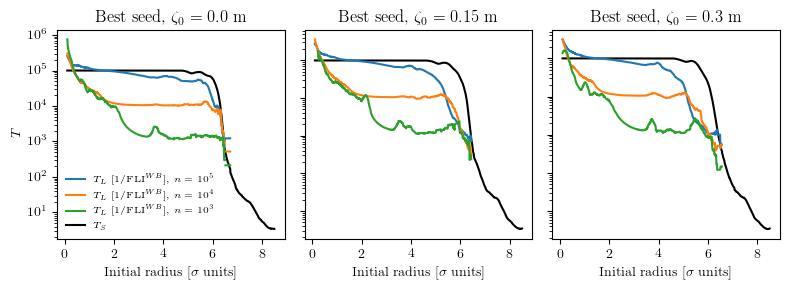

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, (idx, ax) in enumerate(zip(range(6, 9), axs)):
    ax.plot(sigma_sample, loss_evo_list[100000][idx], c="black")
    for t in [100000, 10000, 1000]:
        ax.plot(sigma_sample, lyapunov_wb_evo_list[t][idx],  label=f"$T_L$ [1/FLI$^{{WB}}$], $n=10^{int(np.log10(t))}$")
    ax.set_yscale("log")
    ax.plot([], [], c="black", label="$T_S$")
    # ax.set_ylim(1e2, 3e5)
    
    if i == 0:
        ax.set_ylabel("$T$")
    else:
        ax.set_yticklabels([])
    ax.set_xlabel("Initial radius [$\\sigma$ units]")
    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")
    # ax_bis = ax.twinx()
    # ax_bis.scatter(sigma_sample, n_samples, marker="x", c="grey", s=5, alpha=0.5)
    # ax_bis.set_ylim(top=3900)
    # if i == 2:
    #     ax_bis.set_ylabel("Number of samples")
    # else:
    #     ax_bis.set_yticklabels([])
    if i == 0:
        ax.legend(fontsize="x-small", frameon=False)

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "lyapunov_time_vs_radius.png"), bbox_inches="tight", dpi=600)

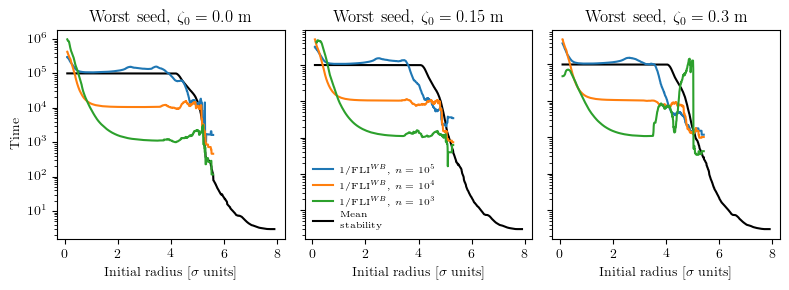

In [273]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, (idx, ax) in enumerate(zip(range(0, 3), axs)):
    ax.plot(sigma_sample, loss_evo_list[100000][idx], c="black")
    for t in [100000, 10000, 1000]:
        ax.plot(sigma_sample, lyapunov_wb_evo_list[t][idx],  label=f"1/FLI$^{{WB}}$, $n=10^{int(np.log10(t))}$")
    ax.set_yscale("log")
    ax.plot([], [], c="black", label="Mean\nstability")
    # ax.set_ylim(1e2, 3e5)
    
    if i == 0:
        ax.set_ylabel("Time")
    else:
        ax.set_yticklabels([])
    ax.set_xlabel("Initial radius [$\\sigma$ units]")
    ax.set_title(f"{lattice_name_list[0]} seed, $\\zeta_0={zeta_name_list[i]}$ m")
    # ax_bis = ax.twinx()
    # ax_bis.scatter(sigma_sample, n_samples, marker="x", c="grey", s=5, alpha=0.5)
    # ax_bis.set_ylim(top=3900)
    # if i == 2:
    #     ax_bis.set_ylabel("Number of samples")
    # else:
    #     ax_bis.set_yticklabels([])
    if i == 1:
        ax.legend(fontsize="x-small", frameon=False)

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "lyapunov_time_vs_radius.png"), bbox_inches="tight", dpi=600)

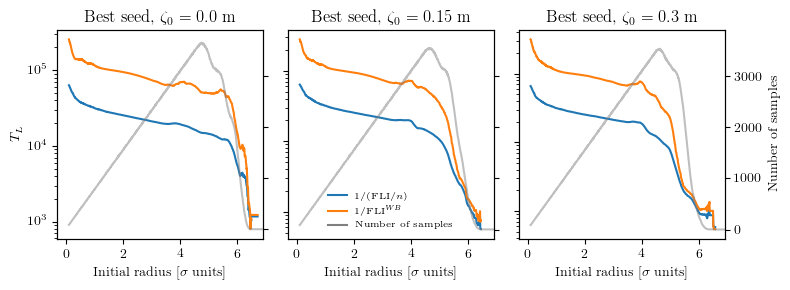

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, (idx, ax) in enumerate(zip(range(6, 9), axs)):
    # ax.plot(sigma_sample, loss_evo_list[100000][idx], c="black")
    # for t in [100000, 10000, 1000]:
    ax.plot(sigma_sample, lyapunov_evo_list[100000][idx],  label=f"$1/($FLI$/n)$")#, $n=10^{int(np.log10(100000))}$")
    ax.plot(sigma_sample, lyapunov_wb_evo_list[100000][idx],  label=f"1/FLI$^{{WB}}$")#, $n=10^{int(np.log10(100000))}$")
    ax.set_yscale("log")
    # ax.plot([], [], c="black", label="Mean\nstability")
    # ax.set_ylim(1e2, 3e5)
    ax.plot([],[], c="grey", label="Number of samples")
    
    if i == 0:
        ax.set_ylabel("$T_L$")
    else:
        ax.set_yticklabels([])
    ax.set_xlabel("Initial radius [$\\sigma$ units]")
    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")
    ax_bis = ax.twinx()
    ax_bis.plot(sigma_sample, samples_evo_list[100000][idx], c="grey", alpha=0.5)
    ax_bis.set_ylim(top=3900)
    if i == 2:
        ax_bis.set_ylabel("Number of samples")
    else:
        ax_bis.set_yticklabels([])
    if i == 1:
        ax.legend(fontsize="x-small", frameon=False, loc='lower center')

    ax.set_xlim(right=6.9)

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "lyapunov_time_vs_lyapunov_wb_time.png"), bbox_inches="tight", dpi=600)

['$10^3$', '$10^4$', '$10^5$']


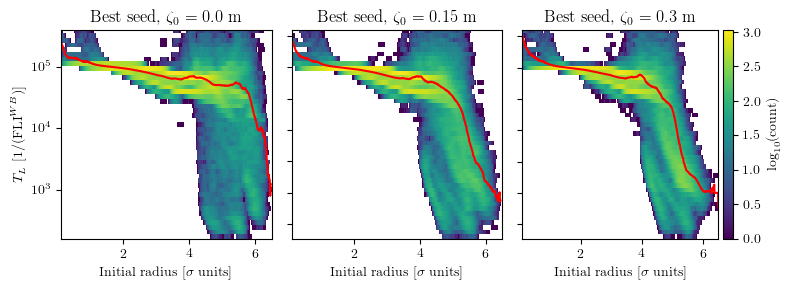

In [46]:
bucket_lenght = 0.2
n_samples = 1000
sigma_sample_low = sigma_sample - bucket_lenght / 2
sigma_sample_high = sigma_sample + bucket_lenght / 2

fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, (idx, ax) in enumerate(zip(range(6, 9), axs)):

    data_list = []
    data_mean = []

    for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
        mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)

        tmp_data = (np.asarray(flibk_x_post_data_list[idx][-1][mask])).copy()
        tmp_data[tmp_data < -6] = np.nan
        tmp_data = 1/10**tmp_data

        data_list.append(np.log10(tmp_data))
        data_mean.append(np.log10(np.nanmean(tmp_data)))

    v_min = np.infty
    v_max = -np.infty
    for d in data_list:
        v_min = np.nanmin([v_min, np.nanmin(d)])
        v_max = np.nanmax([v_max, np.nanmax(d)])

    count_map, bin_centers = compose_count_map(data_list, v_min, v_max, density=False, nbins=50)

    cmap = ax.imshow(np.log10(count_map).T, aspect="auto", origin="lower", interpolation="none", extent=[sigma_sample[0], sigma_sample[-1], v_min, v_max])
    ax.plot(sigma_sample, data_mean, c="red")
    # plt.colorbar()
    ax.set_xlim(right=6.5)
    ax.set_ylim(top=5.6)

    if i == 2:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

    if i != 0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel("$T_L$ $[1/(\\mathrm{{FLI}}^{{WB}})]$")
        # write ticklabels in the form of 10^{{number}}
        ax.set_yticks([3,4,5])
        labels = [f"$10^{i}$" for i in [3,4,5]]
        print(labels)
        ax.set_yticklabels(labels)
    ax.set_xlabel("Initial radius [$\\sigma$ units]")

    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "lyapunov_dist_and_mean.png"), bbox_inches="tight", dpi=600)


['$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$', '$10^5$']


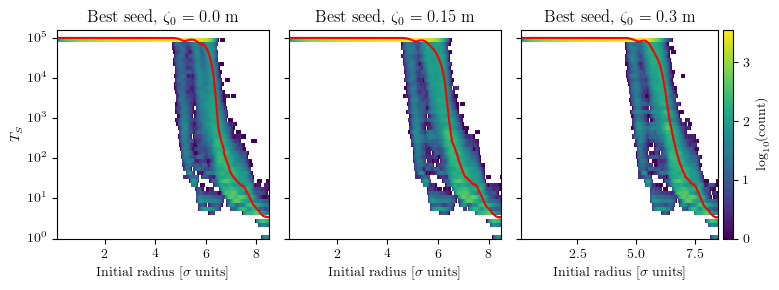

In [50]:
bucket_lenght = 0.2
n_samples = 1000
sigma_sample_low = sigma_sample - bucket_lenght / 2
sigma_sample_high = sigma_sample + bucket_lenght / 2

fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, (idx, ax) in enumerate(zip(range(6, 9), axs)):

    data_list = []
    data_mean = []

    for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
        mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)

        tmp_data = (np.asarray(stability_list[idx][mask])).copy()
        
        data_list.append(np.log10(tmp_data))
        data_mean.append(np.log10(np.nanmean(tmp_data)))

    v_min = np.infty
    v_max = -np.infty
    for d in data_list:
        v_min = np.nanmin([v_min, np.nanmin(d)])
        v_max = np.nanmax([v_max, np.nanmax(d)])

    count_map, bin_centers = compose_count_map(data_list, v_min, v_max, density=False, nbins=50)

    cmap = ax.imshow(np.log10(count_map).T, aspect="auto", origin="lower", interpolation="none", extent=[sigma_sample[0], sigma_sample[-1], v_min, v_max])
    ax.plot(sigma_sample, data_mean, c="red")
    # plt.colorbar()
    ax.set_xlim(right=8.5)
    ax.set_ylim(top=5.2)

    if i == 2:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

    if i != 0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel("$T_S$")
        # write ticklabels in the form of 10^{{number}}
        ax.set_yticks(range(6))
        labels = [f"$10^{i}$" for i in range(6)]
        print(labels)
        ax.set_yticklabels(labels)
    ax.set_xlabel("Initial radius [$\\sigma$ units]")

    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "stab_dist_and_mean.png"), bbox_inches="tight", dpi=600)


['$10^3$', '$10^4$', '$10^5$']
['$10^0$', '$10^1$', '$10^2$', '$10^3$', '$10^4$', '$10^5$']


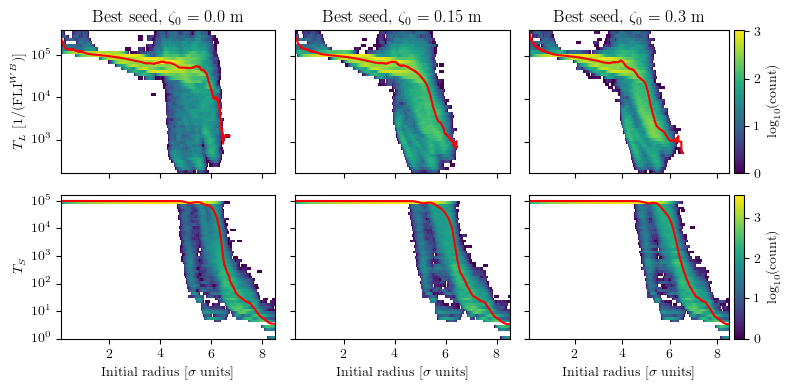

In [56]:
bucket_lenght = 0.2
n_samples = 1000
sigma_sample_low = sigma_sample - bucket_lenght / 2
sigma_sample_high = sigma_sample + bucket_lenght / 2

fig, axs = plt.subplots(2, 3, figsize=(8, 4), sharex=True)

for i, (idx, ax) in enumerate(zip(range(6, 9), axs[0,:])):

    data_list = []
    data_mean = []

    for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
        mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)

        tmp_data = (np.asarray(flibk_x_post_data_list[idx][-1][mask])).copy()
        tmp_data[tmp_data < -6] = np.nan
        tmp_data = 1/10**tmp_data

        data_list.append(np.log10(tmp_data))
        data_mean.append(np.log10(np.nanmean(tmp_data)))

    v_min = np.infty
    v_max = -np.infty
    for d in data_list:
        v_min = np.nanmin([v_min, np.nanmin(d)])
        v_max = np.nanmax([v_max, np.nanmax(d)])

    count_map, bin_centers = compose_count_map(data_list, v_min, v_max, density=False, nbins=50)

    cmap = ax.imshow(np.log10(count_map).T, aspect="auto", origin="lower", interpolation="none", extent=[sigma_sample[0], sigma_sample[-1], v_min, v_max])
    ax.plot(sigma_sample, data_mean, c="red")
    # plt.colorbar()
    ax.set_xlim(right=6.5)
    ax.set_ylim(top=5.6)

    if i == 2:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

    if i != 0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel("$T_L$ $[1/(\\mathrm{{FLI}}^{{WB}})]$")
        # write ticklabels in the form of 10^{{number}}
        ax.set_yticks([3,4,5])
        labels = [f"$10^{i}$" for i in [3,4,5]]
        print(labels)
        ax.set_yticklabels(labels)
    # ax.set_xlabel("Initial radius [$\\sigma$ units]")

    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")

for i, (idx, ax) in enumerate(zip(range(6, 9), axs[1,:])):

    data_list = []
    data_mean = []

    for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
        mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)

        tmp_data = (np.asarray(stability_list[idx][mask])).copy()
        
        data_list.append(np.log10(tmp_data))
        data_mean.append(np.log10(np.nanmean(tmp_data)))

    v_min = np.infty
    v_max = -np.infty
    for d in data_list:
        v_min = np.nanmin([v_min, np.nanmin(d)])
        v_max = np.nanmax([v_max, np.nanmax(d)])

    count_map, bin_centers = compose_count_map(data_list, v_min, v_max, density=False, nbins=50)

    cmap = ax.imshow(np.log10(count_map).T, aspect="auto", origin="lower", interpolation="none", extent=[sigma_sample[0], sigma_sample[-1], v_min, v_max])
    ax.plot(sigma_sample, data_mean, c="red")
    # plt.colorbar()
    ax.set_xlim(right=8.5)
    ax.set_ylim(top=5.2)

    if i == 2:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

    if i != 0:
        ax.set_yticks(range(6))
        ax.set_yticklabels([])
    else:
        ax.set_ylabel("$T_S$")
        # write ticklabels in the form of 10^{{number}}
        ax.set_yticks(range(6))
        labels = [f"$10^{i}$" for i in range(6)]
        print(labels)
        ax.set_yticklabels(labels)
    ax.set_xlabel("Initial radius [$\\sigma$ units]")

    # ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "dist_and_mean.png"), bbox_inches="tight", dpi=600)


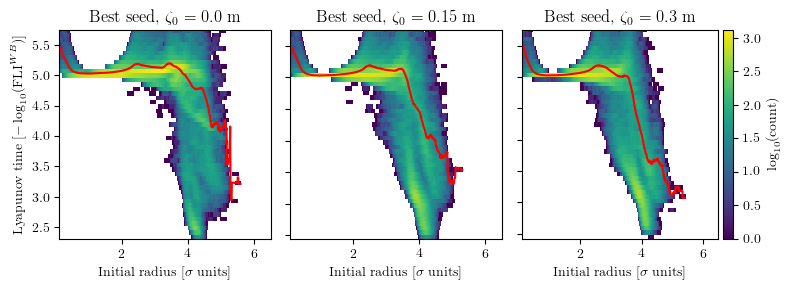

In [269]:
bucket_lenght = 0.2
n_samples = 1000
sigma_sample_low = sigma_sample - bucket_lenght / 2
sigma_sample_high = sigma_sample + bucket_lenght / 2

fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, (idx, ax) in enumerate(zip(range(0, 3), axs)):

    data_list = []
    data_mean = []

    for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
        mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)

        tmp_data = (np.asarray(flibk_x_post_data_list[idx][-1][mask])).copy()
        tmp_data[tmp_data < -6] = np.nan
        tmp_data = 1/10**tmp_data

        data_list.append(np.log10(tmp_data))
        data_mean.append(np.log10(np.nanmean(tmp_data)))

    v_min = np.infty
    v_max = -np.infty
    for d in data_list[:-200]:
        v_min = np.nanmin([v_min, np.nanmin(d)])
        v_max = np.nanmax([v_max, np.nanmax(d)])

    count_map, bin_centers = compose_count_map(data_list, v_min, v_max, density=False, nbins=50)

    cmap = ax.imshow(np.log10(count_map).T, aspect="auto", origin="lower", interpolation="none", extent=[sigma_sample[0], sigma_sample[-1], v_min, v_max])
    ax.plot(sigma_sample, data_mean, c="red")
    # plt.colorbar()
    ax.set_xlim(right=6.5)
    ax.set_ylim(top=5.75)

    if i == 2:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

    if i != 0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel("Lyapunov time $[-\\log_{{10}}(\\mathrm{{FLI}}^{{WB}})]$")
    ax.set_xlabel("Initial radius [$\\sigma$ units]")

    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")

plt.tight_layout()
            

In [268]:
data_list[-200]

array([nan, nan, nan, ..., nan, nan, nan])

In [20]:
import lmfit

def nek_law(params, x, data=None, eps=None):
    t_0 = 10**params["t_0"].value
    sig_0 = params["sig_0"].value
    b = params["b"].value

    val = np.asarray(t_0 * np.exp((sig_0/x)**b))

    # print(np.count_nonzero(eps))
    if data is not None:
        if np.any(np.isnan((np.log10(val) - np.log10(data)))): 
            # print("NAN!")
            return np.ones_like(data) * 1e10
        if np.any(np.isinf((np.log10(val) - np.log10(data)))): 
            # print("INF!")
            return np.ones_like(data) * 1e10

    if data is None:
        return val
    if eps is None:
        return (np.log10(val) - np.log10(data))
    return (val - data) / eps

In [21]:
import warnings
warnings.filterwarnings("ignore")

Ns = 100

t_min=-4
t_max=4
t_delta = (t_max - t_min) / Ns

sig_min=10
sig_max=60
sig_delta = (sig_max - sig_min) / Ns

b_min=0
b_max=3
b_delta = (b_max - b_min) / Ns

idx = 8

sigma_fit_samples_loss = np.arange(5.5, 6.35, 0.1)

loss_fit_results = []

for from_sigma in tqdm(sigma_fit_samples_loss):

    ##########################################################

    params = lmfit.Parameters()
    params.add("t_0", value=5.0e0, min=t_min, max=t_max)
    params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
    params.add("b", value=2.0e0, min=b_min, max=b_max)

    x = np.asarray(sigma_sample).copy()
    y = np.asarray(loss_evo_list[t][idx]).copy()

    nanmask = np.logical_and(~np.isnan(y), x > from_sigma)
    x = x[nanmask]
    y = y[nanmask]

    out = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=Ns)

    params = lmfit.Parameters()
    params.add("t_0", value=out.params["t_0"].value, min=out.params["t_0"].value - t_delta, max=out.params["t_0"].value + t_delta)
    params.add("sig_0", value=out.params["sig_0"].value, min=out.params["sig_0"].value - sig_delta, max=out.params["sig_0"].value + sig_delta)
    params.add("b", value=out.params["b"].value, min=out.params["b"].value - b_delta, max=out.params["b"].value + b_delta)

    out = lmfit.minimize(nek_law, params, args=(x, y))

    loss_fit_results.append(out)

sigma_fit_samples = np.arange(4.0, 5.6, 0.1)

lyap_list_result = []

for from_sigma in tqdm(sigma_fit_samples):

    params = lmfit.Parameters()
    params.add("t_0", value=5.0e0, min=t_min, max=t_max)
    params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
    params.add("b", value=2.0e0, min=b_min, max=b_max)

    x = np.asarray(sigma_sample).copy()
    y = np.asarray(lyapunov_wb_evo_list[100000][idx]).copy()

    nanmask = np.logical_and(~np.isnan(y), x > from_sigma)
    x = x[nanmask]
    y = y[nanmask]

    if len(y) <= 5:
        lyap_list_result.append(None)
        continue

    out = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=Ns)

    params = lmfit.Parameters()
    params.add("t_0", value=out.params["t_0"].value, min=out.params["t_0"].value - t_delta, max=out.params["t_0"].value + t_delta)
    params.add("sig_0", value=out.params["sig_0"].value, min=out.params["sig_0"].value - sig_delta, max=out.params["sig_0"].value + sig_delta)
    params.add("b", value=out.params["b"].value, min=out.params["b"].value - b_delta, max=out.params["b"].value + b_delta)

    out = lmfit.minimize(nek_law, params, args=(x, y))

    lyap_list_result.append(out)

100%|██████████| 16/16 [04:50<00:00, 18.17s/it]


(3.0, 7.345)

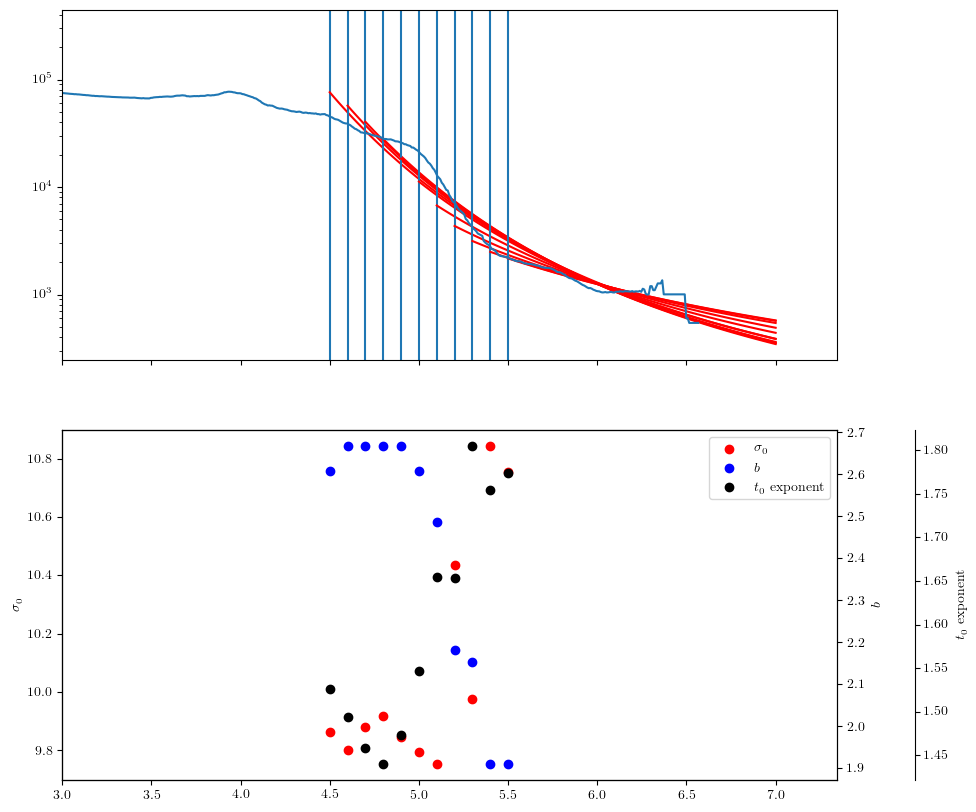

In [36]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax_bis = ax[1].twinx()
ax_ter = ax[1].twinx()

for i, out in enumerate(lyap_list_result):
    if i < 5:
        continue
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples[i], 7.0, 100)
    ax[0].axvline(sigma_fit_samples[i])
    ax[0].plot(x, nek_law(out.params, x, None), color="red")

    ax[1].scatter([sigma_fit_samples[i]], [out.params["sig_0"].value], color="red")
    ax_bis.scatter([sigma_fit_samples[i]], [out.params["b"].value], color="blue", label="$b$")
    ax_ter.scatter([sigma_fit_samples[i]], [out.params["t_0"].value], color="black", label="$t_0$ exponent")
    # print(f"{sigma_fit_samples[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

# fix ax_ter yaxis position
ax_ter.spines.right.set_position(("axes", 1.1))

ax[1].set_ylabel("$\\sigma_0$")
ax_bis.set_ylabel("$b$")
ax_ter.set_ylabel("$t_0$ exponent")

ax[1].scatter([], [], color="red", label="$\\sigma_0$")
ax[1].scatter([], [], color="blue", label="$b$")
ax[1].scatter([], [], color="black", label="$t_0$ exponent")
ax[1].legend()

ax[0].plot(sigma_sample, lyapunov_wb_evo_list[100000][8])

ax[0].set_yscale("log")
ax[0].set_xlim(left=3.0)
# ax[1].set_ylim(top=50.0)

(3.0, 9.445)

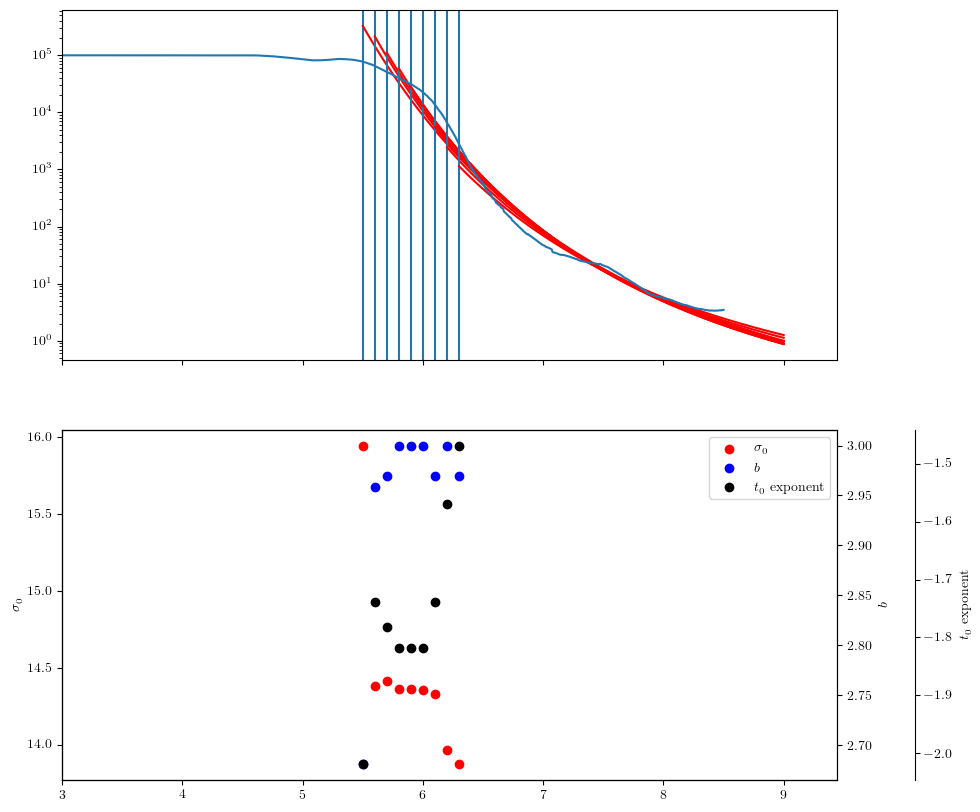

In [35]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax_bis = ax[1].twinx()
ax_ter = ax[1].twinx()

for i, out in enumerate(loss_fit_results):
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples_loss[i], 9.0, 100)
    ax[0].axvline(sigma_fit_samples_loss[i])
    ax[0].plot(x, nek_law(out.params, x, None), color="red")

    ax[1].scatter([sigma_fit_samples_loss[i]], [out.params["sig_0"].value], color="red")
    ax_bis.scatter([sigma_fit_samples_loss[i]], [out.params["b"].value], color="blue", label="$b$")
    ax_ter.scatter([sigma_fit_samples_loss[i]], [out.params["t_0"].value], color="black", label="$t_0$ exponent")
    # print(f"{sigma_fit_samples_loss[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

# fix ax_ter yaxis position
ax_ter.spines.right.set_position(("axes", 1.1))

ax[1].set_ylabel("$\\sigma_0$")
ax_bis.set_ylabel("$b$")
ax_ter.set_ylabel("$t_0$ exponent")

ax[1].scatter([], [], color="red", label="$\\sigma_0$")
ax[1].scatter([], [], color="blue", label="$b$")
ax[1].scatter([], [], color="black", label="$t_0$ exponent")
ax[1].legend()

ax[0].plot(sigma_sample, loss_evo_list[100000][8])

ax[0].set_yscale("log")
ax[0].set_xlim(left=3.0)

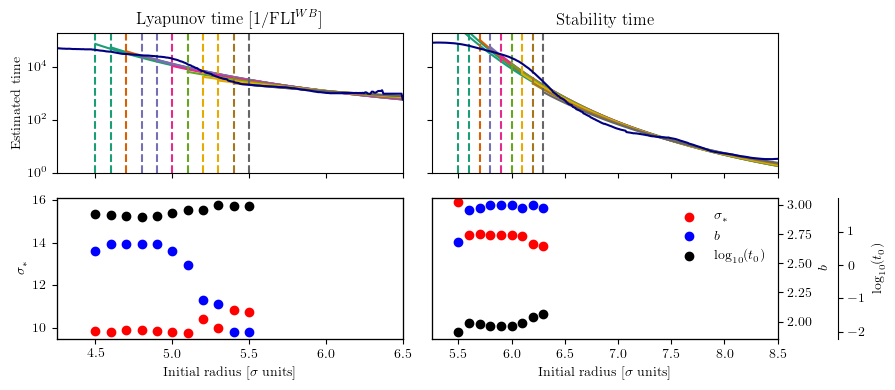

In [112]:
fig, ax = plt.subplots(2, 2, figsize=(9, 4))

ax1_bis = ax[1,0].twinx()
ax1_ter = ax[1,0].twinx()

ax2_bis = ax[1,1].twinx()
ax2_ter = ax[1,1].twinx()

cmap=plt.get_cmap("Dark2")

for i, out in enumerate(lyap_list_result):
    if i < 5:
        continue
    color = cmap((i-5)/(len(lyap_list_result)-5))
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples[i], 7.0, 100)
    ax[0,0].axvline(sigma_fit_samples[i], color=color, linestyle="--")
    ax[0,0].plot(x, nek_law(out.params, x, None), color=color)

    ax[1,0].scatter([sigma_fit_samples[i]], [out.params["sig_0"].value], color="red")
    ax1_bis.scatter([sigma_fit_samples[i]], [out.params["b"].value], color="blue", label="$b$")
    ax1_ter.scatter([sigma_fit_samples[i]], [out.params["t_0"].value], color="black", label="$t_0$ exponent")
    # print(f"{sigma_fit_samples[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

# fix ax_ter yaxis position
# ax1_ter.spines.right.set_position(("axes", 1.1))

ax[1,0].set_ylabel("$\\sigma_\\ast$")
# ax1_bis.set_ylabel("$b$")
# ax1_ter.set_ylabel("$t_0$ exponent")

ax[1,0].scatter([], [], color="red", label="$\\sigma_0$")
ax[1,0].scatter([], [], color="blue", label="$b$")
ax[1,0].scatter([], [], color="black", label="$t_0$ exponent")
# ax[1,0].legend()

ax[0,0].plot(sigma_sample, lyapunov_wb_evo_list[100000][8], color="navy")
ax[0,0].set_title("Lyapunov time $[1/\\mathrm{{FLI}}^{{WB}}]$")
ax[0,0].set_yscale("log")
ax[0,0].set_xlim(left=3.0)


for i, out in enumerate(loss_fit_results):
    if out is None:
        continue
    color = cmap(i/len(loss_fit_results))
    x = np.linspace(sigma_fit_samples_loss[i], 9.0, 100)
    ax[0,1].axvline(sigma_fit_samples_loss[i], color=color, linestyle="--")
    ax[0,1].plot(x, nek_law(out.params, x, None), color=color)

    ax[1,1].scatter([sigma_fit_samples_loss[i]], [out.params["sig_0"].value], color="red")
    ax2_bis.scatter([sigma_fit_samples_loss[i]], [out.params["b"].value], color="blue", label="$b$")
    ax2_ter.scatter([sigma_fit_samples_loss[i]], [out.params["t_0"].value], color="black", label="$t_0$ exponent")
    # print(f"{sigma_fit_samples_loss[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

# fix ax_ter yaxis position
ax2_ter.spines.right.set_position(("axes", 1.175))

# ax[1,1].set_ylabel("$\\sigma_0$")
ax2_bis.set_ylabel("$b$")
ax2_ter.set_ylabel("$\\log_{{10}}(t_0)$")

ax[1,1].scatter([], [], color="red", label="$\\sigma_\\ast$")
ax[1,1].scatter([], [], color="blue", label="$b$")
ax[1,1].scatter([], [], color="black", label="$\\log_{{10}}(t_0)$")
ax[1,1].legend(frameon=False)

ax[0,1].plot(sigma_sample, loss_evo_list[100000][8], color="navy")
ax[0,1].set_title("Stability time")

ax[0,1].set_yscale("log")
ax[0,1].set_xlim(left=3.0)

ax[0,0].set_ylim(1e0, 2e5)
ax[0,1].set_ylim(1e0, 2e5)
ax[0,0].set_xlim(4.25, 6.5)
ax[0,1].set_xlim(5.25, 8.5)
ax[1,0].set_xlim(4.25, 6.5)
ax[1,1].set_xlim(5.25, 8.5)

ax1_bis.get_shared_y_axes().join(ax2_bis, ax1_bis)
ax1_ter.get_shared_y_axes().join(ax1_ter, ax2_ter)
ax[1,0].set_ylim(9.5, 16.1)
ax[1,1].set_ylim(9.5, 16.1)

ax1_bis.set_yticklabels([])
ax1_bis.set_yticks([])
ax1_ter.set_yticklabels([])
ax1_ter.set_yticks([])
ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])
ax[1,1].set_yticks([])
ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])

ax[0,0].set_ylabel("Estimated time")
ax[1,0].set_xlabel("Initial radius [$\\sigma$ units]")
ax[1,1].set_xlabel("Initial radius [$\\sigma$ units]")

plt.tight_layout()

In [22]:
import warnings
warnings.filterwarnings("ignore")

Ns = 100

t_min=-4
t_max=4
t_delta = (t_max - t_min) / Ns

sig_min=10
sig_max=60
sig_delta = (sig_max - sig_min) / Ns

b_min=0
b_max=3
b_delta = (b_max - b_min) / Ns

idx = 2

sigma_fit_samples_loss_bad = np.arange(4.0, 5.1, 0.1)

loss_fit_results_bad = []

for from_sigma in tqdm(sigma_fit_samples_loss_bad):

    ##########################################################

    params = lmfit.Parameters()
    params.add("t_0", value=5.0e0, min=t_min, max=t_max)
    params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
    params.add("b", value=2.0e0, min=b_min, max=b_max)

    x = np.asarray(sigma_sample).copy()
    y = np.asarray(loss_evo_list[t][idx]).copy()

    nanmask = np.logical_and(~np.isnan(y), x > from_sigma)
    x = x[nanmask]
    y = y[nanmask]

    out = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=Ns)

    params = lmfit.Parameters()
    params.add("t_0", value=out.params["t_0"].value, min=out.params["t_0"].value - t_delta, max=out.params["t_0"].value + t_delta)
    params.add("sig_0", value=out.params["sig_0"].value, min=out.params["sig_0"].value - sig_delta, max=out.params["sig_0"].value + sig_delta)
    params.add("b", value=out.params["b"].value, min=out.params["b"].value - b_delta, max=out.params["b"].value + b_delta)

    out = lmfit.minimize(nek_law, params, args=(x, y))

    loss_fit_results_bad.append(out)


100%|██████████| 11/11 [03:51<00:00, 21.04s/it]


In [23]:
Ns = 100

t_min=-4
t_max=4
t_delta = (t_max - t_min) / Ns

sig_min=10
sig_max=60
sig_delta = (sig_max - sig_min) / Ns

b_min=0
b_max=3
b_delta = (b_max - b_min) / Ns

idx = 2

sigma_fit_samples_bad = np.arange(3.0, 4.1, 0.1)

lyap_list_result_bad = []

for from_sigma in tqdm(sigma_fit_samples_bad):

    params = lmfit.Parameters()
    params.add("t_0", value=5.0e0, min=t_min, max=t_max)
    params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
    params.add("b", value=2.0e0, min=b_min, max=b_max)

    x = np.asarray(sigma_sample).copy()
    y = np.asarray(lyapunov_wb_evo_list[100000][idx]).copy()

    nanmask = np.logical_and(np.logical_and(~np.isnan(y), x > from_sigma), y>10)
    x = x[nanmask]
    y = y[nanmask]

    if len(y) <= 5:
        lyap_list_result_bad.append(None)
        continue

    out = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=Ns)

    params = lmfit.Parameters()
    params.add("t_0", value=out.params["t_0"].value, min=out.params["t_0"].value - t_delta, max=out.params["t_0"].value + t_delta)
    params.add("sig_0", value=out.params["sig_0"].value, min=out.params["sig_0"].value - sig_delta, max=out.params["sig_0"].value + sig_delta)
    params.add("b", value=out.params["b"].value, min=out.params["b"].value - b_delta, max=out.params["b"].value + b_delta)

    out = lmfit.minimize(nek_law, params, args=(x, y))

    lyap_list_result_bad.append(out)

100%|██████████| 11/11 [03:22<00:00, 18.41s/it]


(3.0, 5.77)

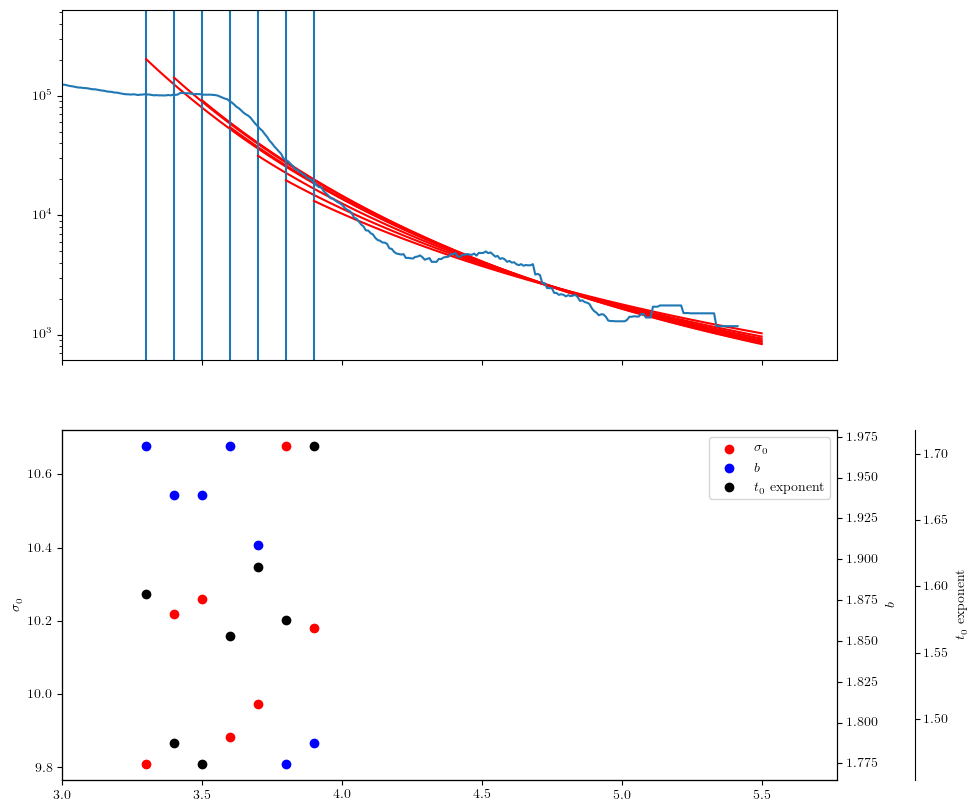

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax_bis = ax[1].twinx()
ax_ter = ax[1].twinx()

for i, out in enumerate(lyap_list_result_bad):
    if i < 3 or i > 9:
        continue
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples_bad[i], 5.5, 100)
    ax[0].axvline(sigma_fit_samples_bad[i])
    ax[0].plot(x, nek_law(out.params, x, None), color="red")

    ax[1].scatter([sigma_fit_samples_bad[i]], [out.params["sig_0"].value], color="red")
    ax_bis.scatter([sigma_fit_samples_bad[i]], [out.params["b"].value], color="blue", label="$b$")
    ax_ter.scatter([sigma_fit_samples_bad[i]], [out.params["t_0"].value], color="black", label="$t_0$ exponent")
    # print(f"{sigma_fit_samples_bad[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

# fix ax_ter yaxis position
ax_ter.spines.right.set_position(("axes", 1.1))

ax[1].set_ylabel("$\\sigma_0$")
ax_bis.set_ylabel("$b$")
ax_ter.set_ylabel("$t_0$ exponent")

ax[1].scatter([], [], color="red", label="$\\sigma_0$")
ax[1].scatter([], [], color="blue", label="$b$")
ax[1].scatter([], [], color="black", label="$t_0$ exponent")
ax[1].legend()

ax[0].plot(sigma_sample, lyapunov_wb_evo_list[100000][2])

ax[0].set_yscale("log")
ax[0].set_xlim(left=3.0)
# ax[1].set_ylim(top=50.0)

(3.0, 9.445)

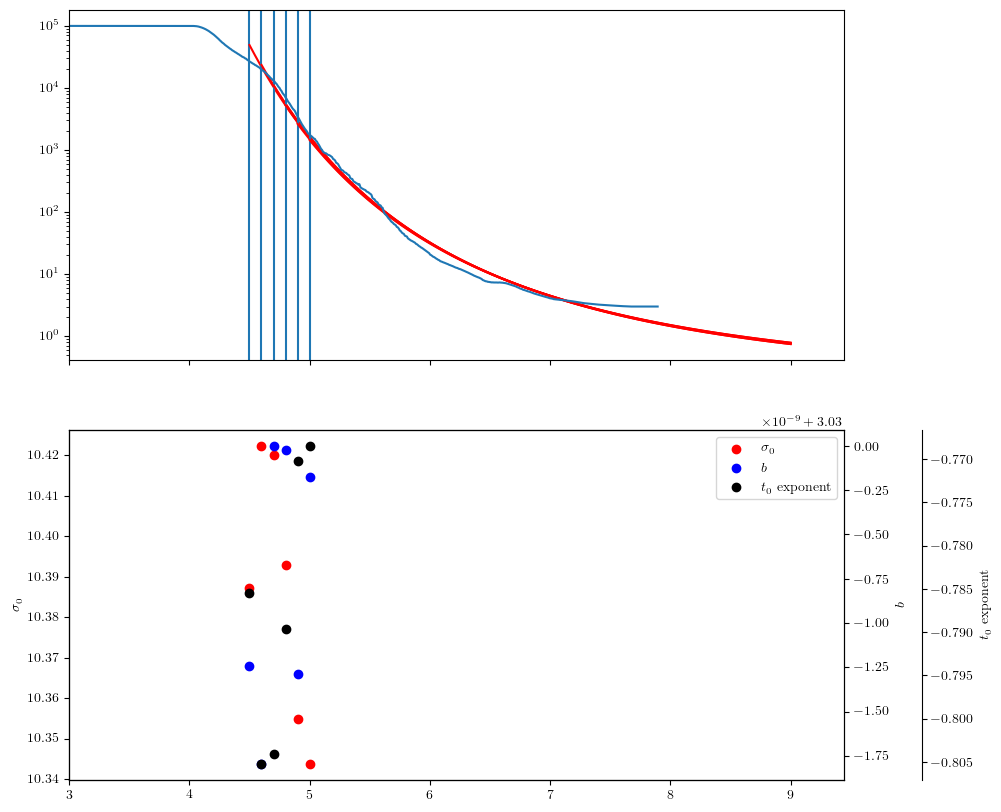

In [30]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax_bis = ax[1].twinx()
ax_ter = ax[1].twinx()

for i, out in enumerate(loss_fit_results_bad):
    if i < 5:
        continue
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples_loss_bad[i], 9.0, 100)
    ax[0].axvline(sigma_fit_samples_loss_bad[i])
    ax[0].plot(x, nek_law(out.params, x, None), color="red")

    ax[1].scatter([sigma_fit_samples_loss_bad[i]], [out.params["sig_0"].value], color="red")
    ax_bis.scatter([sigma_fit_samples_loss_bad[i]], [out.params["b"].value], color="blue", label="$b$")
    ax_ter.scatter([sigma_fit_samples_loss_bad[i]], [out.params["t_0"].value], color="black", label="$t_0$ exponent")
    # print(f"{sigma_fit_samples_loss_bad[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

# fix ax_ter yaxis position
ax_ter.spines.right.set_position(("axes", 1.1))

ax[1].set_ylabel("$\\sigma_0$")
ax_bis.set_ylabel("$b$")
ax_ter.set_ylabel("$t_0$ exponent")

ax[1].scatter([], [], color="red", label="$\\sigma_0$")
ax[1].scatter([], [], color="blue", label="$b$")
ax[1].scatter([], [], color="black", label="$t_0$ exponent")
ax[1].legend()

ax[0].plot(sigma_sample, loss_evo_list[100000][2])

ax[0].set_yscale("log")
ax[0].set_xlim(left=3.0)

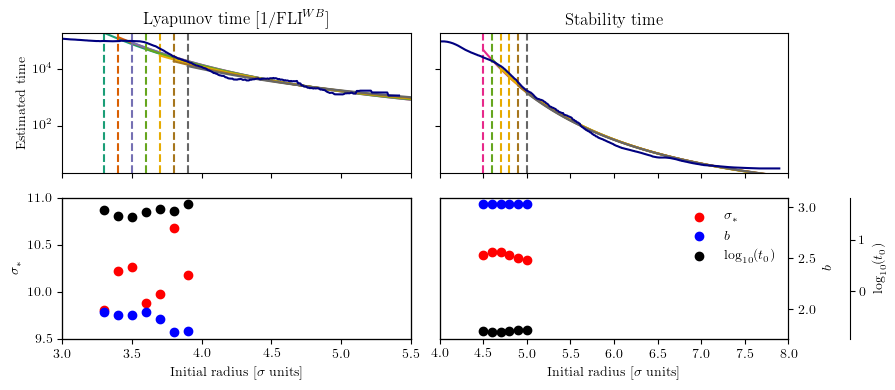

In [113]:
fig, ax = plt.subplots(2, 2, figsize=(9, 4))

ax1_bis = ax[1,0].twinx()
ax1_ter = ax[1,0].twinx()

ax2_bis = ax[1,1].twinx()
ax2_ter = ax[1,1].twinx()

cmap=plt.get_cmap("Dark2")

for i, out in enumerate(lyap_list_result_bad):
    if i < 3 or i > 9:
        continue
    color = cmap((i-3)/(9-3))
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples_bad[i], 7.0, 100)
    ax[0,0].axvline(sigma_fit_samples_bad[i], color=color, linestyle="--")
    ax[0,0].plot(x, nek_law(out.params, x, None), color=color)

    ax[1,0].scatter([sigma_fit_samples_bad[i]], [out.params["sig_0"].value], color="red")
    ax1_bis.scatter([sigma_fit_samples_bad[i]], [out.params["b"].value], color="blue", label="$b$")
    ax1_ter.scatter([sigma_fit_samples_bad[i]], [out.params["t_0"].value], color="black", label="$t_0$ exponent")
    # print(f"{sigma_fit_samples_bad[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

# fix ax_ter yaxis position
# ax1_ter.spines.right.set_position(("axes", 1.1))

ax[1,0].set_ylabel("$\\sigma_\\ast$")
# ax1_bis.set_ylabel("$b$")
# ax1_ter.set_ylabel("$t_0$ exponent")

ax[1,0].scatter([], [], color="red", label="$\\sigma_0$")
ax[1,0].scatter([], [], color="blue", label="$b$")
ax[1,0].scatter([], [], color="black", label="$t_0$ exponent")
# ax[1,0].legend()

ax[0,0].plot(sigma_sample, lyapunov_wb_evo_list[100000][2], color="navy")
ax[0,0].set_title("Lyapunov time $[1/\\mathrm{{FLI}}^{{WB}}]$")
ax[0,0].set_yscale("log")
ax[0,0].set_xlim(left=3.0)


for i, out in enumerate(loss_fit_results_bad):
    if i < 5:
        continue
    color = cmap((i-6)/(len(loss_fit_results_bad)-5))
    if out is None:
        continue
    color = cmap(i/len(loss_fit_results_bad))
    x = np.linspace(sigma_fit_samples_loss_bad[i], 9.0, 100)
    ax[0,1].axvline(sigma_fit_samples_loss_bad[i], color=color, linestyle="--")
    ax[0,1].plot(x, nek_law(out.params, x, None), color=color)

    ax[1,1].scatter([sigma_fit_samples_loss_bad[i]], [out.params["sig_0"].value], color="red")
    ax2_bis.scatter([sigma_fit_samples_loss_bad[i]], [out.params["b"].value], color="blue", label="$b$")
    ax2_ter.scatter([sigma_fit_samples_loss_bad[i]], [out.params["t_0"].value], color="black", label="$t_0$ exponent")
    # print(f"{sigma_fit_samples_loss_bad[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

# fix ax_ter yaxis position
ax2_ter.spines.right.set_position(("axes", 1.175))

# ax[1,1].set_ylabel("$\\sigma_0$")
ax2_bis.set_ylabel("$b$")
ax2_ter.set_ylabel("$\\log_{{10}}(t_0)$")

ax[1,1].scatter([], [], color="red", label="$\\sigma_\\ast$")
ax[1,1].scatter([], [], color="blue", label="$b$")
ax[1,1].scatter([], [], color="black", label="$\\log_{{10}}(t_0)$")
ax[1,1].legend(frameon=False)

ax[0,1].plot(sigma_sample, loss_evo_list[100000][2], color="navy")
ax[0,1].set_title("Stability time")

ax[0,1].set_yscale("log")
# ax[0,1].set_xlim(left=3.0)

ax[0,0].set_ylim(2, 2e5)
ax[0,1].set_ylim(2, 2e5)
ax[0,0].set_xlim(3, 5.5)
ax[0,1].set_xlim(4, 8)
ax[1,0].set_xlim(3, 5.5)
ax[1,1].set_xlim(4, 8)

ax1_bis.get_shared_y_axes().join(ax2_bis, ax1_bis)
ax1_ter.get_shared_y_axes().join(ax1_ter, ax2_ter)
ax[1,0].set_ylim(9.5, 11)
ax[1,1].set_ylim(9.5, 11)

ax1_bis.set_yticklabels([])
ax1_bis.set_yticks([])
ax1_ter.set_yticklabels([])
ax1_ter.set_yticks([])
ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])
ax[1,1].set_yticks([])
ax[0,0].set_xticklabels([])
ax[0,1].set_xticklabels([])


ax[0,0].set_ylabel("Estimated time")
ax[1,0].set_xlabel("Initial radius [$\\sigma$ units]")
ax[1,1].set_xlabel("Initial radius [$\\sigma$ units]")

plt.tight_layout()

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Ns = 50

t_min=0.0e0
t_max=1.0e3
t_delta = (t_max - t_min) / Ns

sig_min=1.0e-1
sig_max=1.0e3
sig_delta = (sig_max - sig_min) / Ns

b_min=0.0e0
b_max=1.0e1
b_delta = (b_max - b_min) / Ns

# fit_results_lyapunov = {t: [] for t in times}
fit_results_lyapunov_wb = {t: [] for t in times}
fit_results_loss = []

sigma_fit_samples = np.arange(3.5, 6.1, 0.25)
sigma_fit_samples_loss = np.arange(5.5, 7.6, 0.25)

for idx in tqdm([0, 1, 2, 6, 7, 8]):
    
    result_list_loss = []
    for from_sigma in tqdm(sigma_fit_samples_loss):

        ##########################################################

        params = lmfit.Parameters()
        params.add("t_0", value=5.0e0, min=t_min, max=t_max)
        params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
        params.add("b", value=2.0e0, min=b_min, max=b_max)

        x = np.asarray(sigma_sample).copy()
        y = np.asarray(loss_evo_list[t][idx]).copy()

        nanmask = np.logical_and(~np.isnan(y), x > from_sigma)
        x = x[nanmask]
        y = y[nanmask]

        out = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=Ns)

        params = lmfit.Parameters()
        params.add("t_0", value=out.params["t_0"].value, min=out.params["t_0"].value - t_delta, max=out.params["t_0"].value + t_delta)
        params.add("sig_0", value=out.params["sig_0"].value, min=out.params["sig_0"].value - sig_delta, max=out.params["sig_0"].value + sig_delta)
        params.add("b", value=out.params["b"].value, min=out.params["b"].value - b_delta, max=out.params["b"].value + b_delta)

        out = lmfit.minimize(nek_law, params, args=(x, y))

        result_list_loss.append(out)

    fit_results_loss.append(result_list_loss)
    print("done loss")
    for t in tqdm([1000, 10000, 100000]):
        print(f"doing t {t}")
        result_list_lyap = []

        for from_sigma in tqdm(sigma_fit_samples):

            params = lmfit.Parameters()
            params.add("t_0", value=5.0e0, min=t_min, max=t_max)
            params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
            params.add("b", value=2.0e0, min=b_min, max=b_max)

            x = np.asarray(sigma_sample).copy()
            y = np.asarray(lyapunov_wb_evo_list[t][idx]).copy()

            nanmask = np.logical_and(~np.isnan(y), x > from_sigma)
            x = x[nanmask]
            y = y[nanmask]

            if len(y) <= 5:
                result_list_lyap.append(None)
                continue

            out = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=Ns)

            params = lmfit.Parameters()
            params.add("t_0", value=out.params["t_0"].value, min=out.params["t_0"].value - t_delta, max=out.params["t_0"].value + t_delta)
            params.add("sig_0", value=out.params["sig_0"].value, min=out.params["sig_0"].value - sig_delta, max=out.params["sig_0"].value + sig_delta)
            params.add("b", value=out.params["b"].value, min=out.params["b"].value - b_delta, max=out.params["b"].value + b_delta)

            out = lmfit.minimize(nek_law, params, args=(x, y))

            result_list_lyap.append(out)

        fit_results_lyapunov_wb[t].append(result_list_lyap)


 11%|█         | 1/9 [01:11<09:29, 71.23s/it]

done loss


 22%|██▏       | 2/9 [02:23<08:21, 71.64s/it]

done loss


 33%|███▎      | 3/9 [03:35<07:11, 71.94s/it]

done loss


 44%|████▍     | 4/9 [04:48<06:01, 72.35s/it]

done loss


 56%|█████▌    | 5/9 [06:03<04:53, 73.40s/it]

done loss


 67%|██████▋   | 6/9 [07:17<03:40, 73.45s/it]

done loss


 78%|███████▊  | 7/9 [08:29<02:26, 73.12s/it]

done loss


 89%|████████▉ | 8/9 [09:41<01:12, 72.72s/it]

done loss


100%|██████████| 9/9 [10:53<00:00, 72.62s/it]

done loss


In [ ]:
fit_results_lyapunov_wb[100000][8]

In [ ]:
import pickle

with open("fit_results_evo.pkl", "wb") as f:
    pickle.dump((fit_results_loss, fit_results_lyapunov_wb), f)

In [ ]:
import pickle
sigma_fit_samples = np.arange(3.5, 6.1, 0.25)
sigma_fit_samples_loss = np.arange(5.5, 7.6, 0.25)

with open("fit_results_evo.pkl", "rb") as f:
    fit_results_loss, fit_results_lyapunov_wb = pickle.load(f)

(3.0, 7.345)

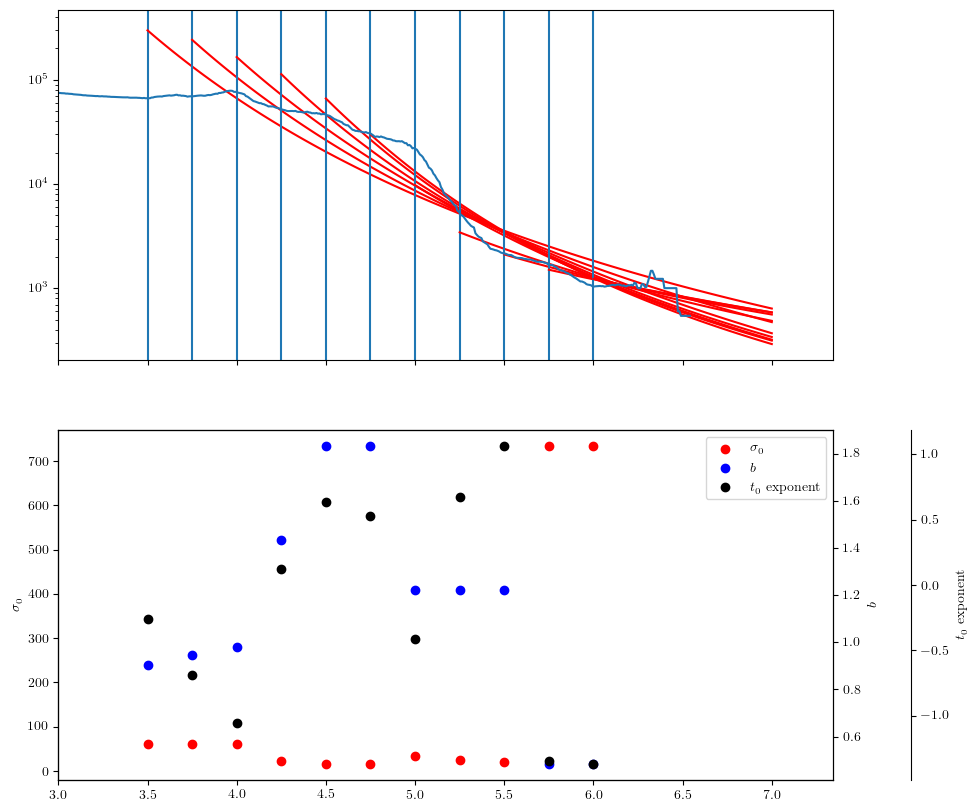

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax_bis = ax[1].twinx()
ax_ter = ax[1].twinx()

for i, out in enumerate(fit_results_lyapunov_wb[100000][8]):
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples[i], 7.0, 100)
    ax[0].axvline(sigma_fit_samples[i])
    ax[0].plot(x, nek_law(out.params, x, None), color="red")

    ax[1].scatter([sigma_fit_samples[i]], [out.params["sig_0"].value], color="red")
    ax_bis.scatter([sigma_fit_samples[i]], [out.params["b"].value], color="blue", label="$b$")
    ax_ter.scatter([sigma_fit_samples[i]], [out.params["t_0"].value], color="black", label="$t_0$ exponent")
    # print(f"{sigma_fit_samples[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

# fix ax_ter yaxis position
ax_ter.spines.right.set_position(("axes", 1.1))

ax[1].set_ylabel("$\\sigma_0$")
ax_bis.set_ylabel("$b$")
ax_ter.set_ylabel("$t_0$ exponent")

ax[1].scatter([], [], color="red", label="$\\sigma_0$")
ax[1].scatter([], [], color="blue", label="$b$")
ax[1].scatter([], [], color="black", label="$t_0$ exponent")
ax[1].legend()

ax[0].plot(sigma_sample, lyapunov_wb_evo_list[100000][8])

ax[0].set_yscale("log")
ax[0].set_xlim(left=3.0)
# ax[1].set_ylim(top=50.0)

(3.0, 9.445)

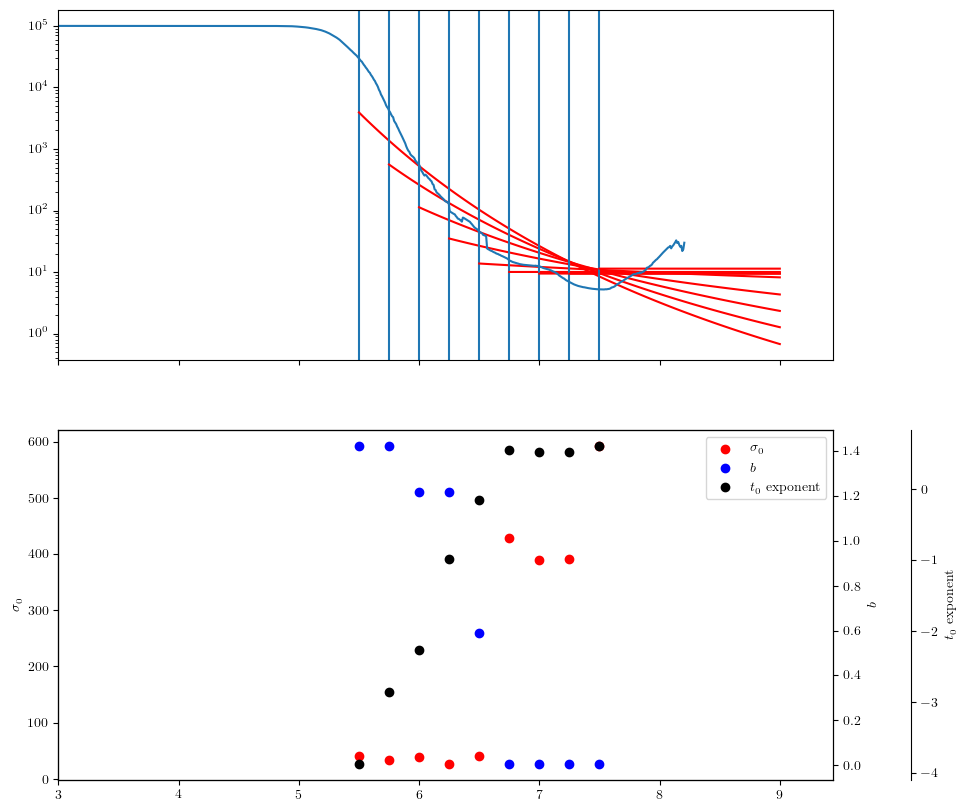

In [260]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

ax_bis = ax[1].twinx()
ax_ter = ax[1].twinx()

for i, out in enumerate(fit_results_loss[4]):
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples_loss[i], 9.0, 100)
    ax[0].axvline(sigma_fit_samples_loss[i])
    ax[0].plot(x, nek_law(out.params, x, None), color="red")

    ax[1].scatter([sigma_fit_samples_loss[i]], [out.params["sig_0"].value], color="red")
    ax_bis.scatter([sigma_fit_samples_loss[i]], [out.params["b"].value], color="blue", label="$b$")
    ax_ter.scatter([sigma_fit_samples_loss[i]], [out.params["t_0"].value], color="black", label="$t_0$ exponent")
    # print(f"{sigma_fit_samples_loss[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

# fix ax_ter yaxis position
ax_ter.spines.right.set_position(("axes", 1.1))

ax[1].set_ylabel("$\\sigma_0$")
ax_bis.set_ylabel("$b$")
ax_ter.set_ylabel("$t_0$ exponent")

ax[1].scatter([], [], color="red", label="$\\sigma_0$")
ax[1].scatter([], [], color="blue", label="$b$")
ax[1].scatter([], [], color="black", label="$t_0$ exponent")
ax[1].legend()

ax[0].plot(sigma_sample, loss_evo_list[100000][4])

ax[0].set_yscale("log")
ax[0].set_xlim(left=3.0)

3.500000	0.55	60.91	0.90
3.750000	0.21	60.91	0.95
4.000000	0.09	60.91	0.98
4.250000	1.32	23.18	1.43
4.500000	4.34	15.49	1.83
4.750000	3.34	15.85	1.83
5.000000	0.39	33.35	1.22
5.250000	4.68	24.65	1.22
5.500000	11.59	21.26	1.22
5.750000	0.05	734.18	0.48
6.000000	0.04	734.31	0.48

3.500000	1.03	183.35	0.59
3.750000	0.35	183.35	0.63
4.000000	0.11	183.35	0.66
4.250000	0.40	60.91	0.91
4.500000	0.09	60.91	0.98
4.750000	0.45	25.37	1.43
5.000000	0.10	28.60	1.43
5.250000	0.05	30.04	1.43
5.500000	0.19	19.59	1.83
5.750000	0.01	43.91	1.22
6.000000	0.08	53.69	1.02



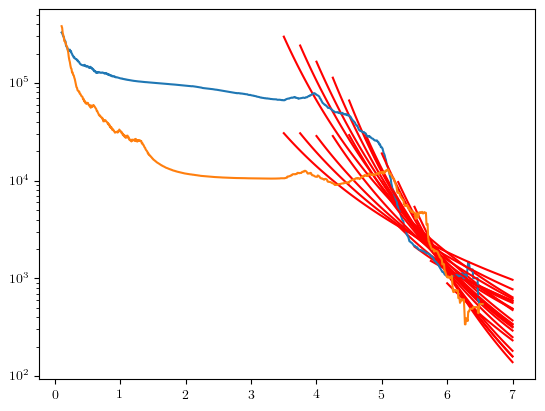

In [ ]:
for i, out in enumerate(fit_results_lyapunov_wb[100000][8]):
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples[i], 7.0, 100)
    plt.plot(x, nek_law(out.params, x, None), color="red")

    print(f"{sigma_fit_samples[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

plt.plot(sigma_sample, lyapunov_wb_evo_list[100000][8])

print()

for i, out in enumerate(fit_results_lyapunov_wb[10000][8]):
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples[i], 7.0, 100)
    plt.plot(x, nek_law(out.params, x, None), color="red")

    print(f"{sigma_fit_samples[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

plt.plot(sigma_sample, lyapunov_wb_evo_list[10000][8])

print()

plt.yscale("log")

3.500000	7.47	244.57	0.54
3.750000	2.44	244.57	0.58
4.000000	0.70	244.57	0.61
4.250000	0.14	264.97	0.64
4.500000	0.03	264.97	0.67
4.750000	0.00	264.97	0.72
5.000000	0.00	264.97	0.77
5.250000	0.15	26.15	1.64
5.500000	0.01	30.72	1.64
5.750000	0.00	34.37	1.64
6.000000	0.00	22.90	2.04

3.500000	0.00	40.37	1.63



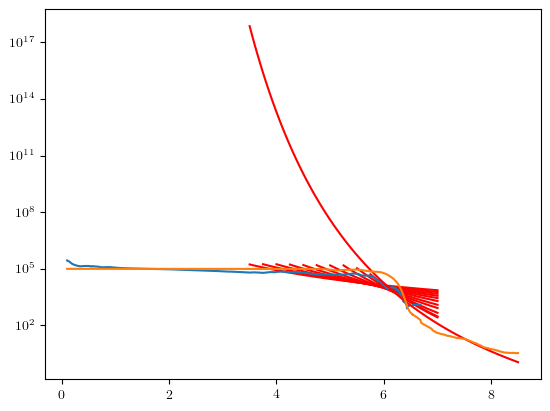

In [ ]:
for i, out in enumerate(fit_results_lyapunov_wb[100000][6]):
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples[i], 7.0, 100)
    plt.plot(x, nek_law(out.params, x, None), color="red")

    print(f"{sigma_fit_samples[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

plt.plot(sigma_sample, lyapunov_wb_evo_list[100000][6])

print()

for i, out in enumerate(fit_results_loss[6]):
    if out is None:
        continue
    x = np.linspace(sigma_fit_samples[i], 8.5, 100)
    plt.plot(x, nek_law(out.params, x, None), color="red")

    print(f"{sigma_fit_samples[i]:2f}\t{10**out.params['t_0'].value:.2f}\t{out.params['sig_0'].value:.2f}\t{out.params['b'].value:.2f}")

plt.plot(sigma_sample, loss_evo_list[10000][6])

print()

plt.yscale("log")

In [ ]:
fit_results_loss[8]

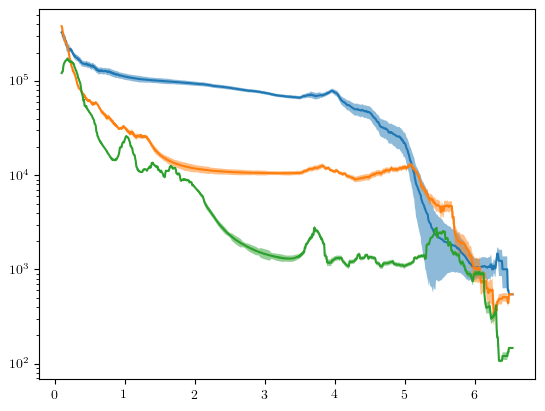

In [ ]:
plt.plot(sigma_sample, lyapunov_wb_evo_list[100000][8])
plt.fill_between(sigma_sample, lyapunov_wb_evo_list[100000][8] - lyapunov_wb_evo_std_list[100000][8], lyapunov_wb_evo_list[100000][8] + lyapunov_wb_evo_std_list[100000][8], alpha=0.5)
plt.plot(sigma_sample, lyapunov_wb_evo_list[10000][8])
plt.fill_between(sigma_sample, lyapunov_wb_evo_list[10000][8] - lyapunov_wb_evo_std_list[10000][8], lyapunov_wb_evo_list[10000][8] + lyapunov_wb_evo_std_list[10000][8], alpha=0.5)
plt.plot(sigma_sample, lyapunov_wb_evo_list[1000][8])
plt.fill_between(sigma_sample, lyapunov_wb_evo_list[1000][8] - lyapunov_wb_evo_std_list[1000][8], lyapunov_wb_evo_list[1000][8] + lyapunov_wb_evo_std_list[1000][8], alpha=0.5)
# plt.plot(sigma_sample, lyapunov_wb_evo_list[100000][2])
# plt.plot(sigma_sample, loss_evo_list[100000][2])
plt.yscale("log")

/tmp/ipykernel_6891/3469671438.py:25: RuntimeWarning: Mean of empty slice
  data_mean.append(np.nanmean(1/10**fli_x_post_data_list[idx][-1][mask]))
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_6891/3469671438.py:31: RuntimeWarning: Mean of empty slice
  data_mean_wb.append(np.nanmean(tmp_data))
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


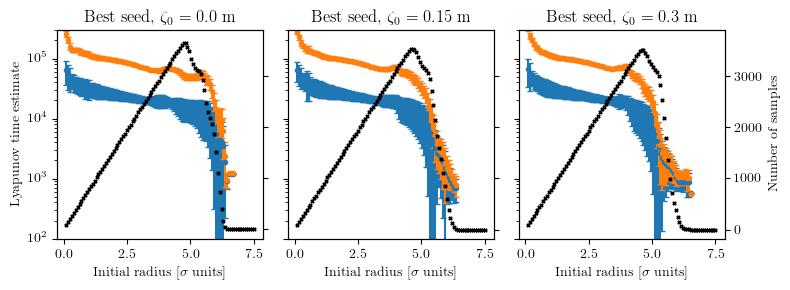

In [ ]:
from_sigma = 0.1
to_sigma = 7.5

bucket_lenght = 0.2
n_samples = 100

sigma_sample = np.linspace(from_sigma, to_sigma, n_samples)
sigma_sample_low = sigma_sample - bucket_lenght / 2
sigma_sample_high = sigma_sample + bucket_lenght / 2

fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, (idx, ax) in enumerate(zip(range(6, 9), axs)):
    data_mean = []
    data_std = []
    
    data_mean_wb = []
    data_std_wb = []
    
    n_samples = []

    for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
        mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)
        
        data_mean.append(np.nanmean(1/10**fli_x_post_data_list[idx][-1][mask]))
        data_std.append(np.nanstd(1/10**fli_x_post_data_list[idx][-1][mask]))
        
        tmp_data = flibk_x_post_data_list[idx][-1][mask].copy()
        tmp_data[tmp_data < -6] = np.nan
        tmp_data = 1/10**tmp_data
        data_mean_wb.append(np.nanmean(tmp_data))
        data_std_wb.append(np.nanstd(tmp_data))
        
        n_samples.append(np.count_nonzero(
            ~np.isnan(fli_x_post_data_list[idx][-1][mask])
        ))

    ax.errorbar(sigma_sample, data_mean, yerr=data_std, fmt="o", markersize=3, capsize=2)
    ax.errorbar(sigma_sample, data_mean_wb, yerr=data_std, fmt="o", markersize=3, capsize=2)
    ax.set_yscale("log")
    ax.set_ylim(1e2, 3e5)
    
    if i == 0:
        ax.set_ylabel("Lyapunov time estimate")
    else:
        ax.set_yticklabels([])
    ax.set_xlabel("Initial radius [$\\sigma$ units]")
    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")
    ax_bis = ax.twinx()
    ax_bis.scatter(sigma_sample, n_samples, marker="x", c="black", s=5)
    ax_bis.set_ylim(top=3900)
    if i == 2:
        ax_bis.set_ylabel("Number of samples")
    else:
        ax_bis.set_yticklabels([])

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "lyapunov_time_vs_radius.png"), bbox_inches="tight", dpi=600)

In [ ]:
import lmfit

def nek_law(params, x, data=None, eps=None):
    t_0 = params["t_0"].value
    sig_0 = params["sig_0"].value
    b = params["b"].value
    cap = params["cap"].value

    # print(t_0, sig_0, b, cap)

    val = np.asarray(t_0 * np.exp((sig_0/x)**b))
    val[val > cap] = cap

    # print(np.count_nonzero(eps))
    if data is not None:
        if np.any(np.isnan((np.log10(val) - np.log10(data)))): 
            # print("NAN!")
            return np.ones_like(data) * cap
        if np.any(np.isinf((np.log10(val) - np.log10(data)))): 
            # print("INF!")
            return np.ones_like(data) * cap

    if data is None:
        return val
    if eps is None:
        return (np.log10(val) - np.log10(data))
    return (val - data) / eps

21600.19453659689

87 87



/tmp/ipykernel_24832/2732911390.py:16: RuntimeWarning: divide by zero encountered in log10
  if np.any(np.isnan((np.log10(val) - np.log10(data)))):
/tmp/ipykernel_24832/2732911390.py:19: RuntimeWarning: divide by zero encountered in log10
  if np.any(np.isinf((np.log10(val) - np.log10(data)))):
/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: invalid value encountered in multiply
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: invalid value encountered in multiply
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_24832/2732911390.py:16: RuntimeWarning: divide by zero encountered in log10
  if np.any(np.isnan((np.log10(val) - np.log10(data)))):
/tmp/ipykernel_2

77534.5475832086

87 87



/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/tmp/ipykernel_24832/2732911390.py:16: RuntimeWarning: divide by zero encountered in log10
  if np.any(np.isnan((np.log10(val) - np.log10(data)))):
/tmp/ipykernel_24832/2732911390.py:19: RuntimeWarning: divide by zero encountered in log10
  if np.any(np.isinf((np.log10(val) - np.log10(data)))):
/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: invalid value encountered in multiply
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_24832/2732911

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 68
    # data points      = 87
    # variables        = 3
    chi-square         = 1.61579609
    reduced chi-square = 0.01923567
    Akaike info crit   = -340.788991
    Bayesian info crit = -333.391266
[[Variables]]
    t_0:    40.5050505 +/- 78.0081643 (192.59%) (init = 50.50505)
    sig_0:  10.8344387 +/- 7.67830337 (70.87%) (init = 10.2)
    b:      2.03558493 +/- 1.19020485 (58.47%) (init = 2.121212)
    cap:    21600.19 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_0, b)   = -0.999
    C(t_0, sig_0) = 0.998
    C(t_0, b)     = -0.995
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 96
    # data points      = 87
    # variables        = 3
    chi-square         = 2.24063006
    reduced chi-square = 0.02667417
    Akaike info crit   = -312.346138
    Bayesian info crit = -304.948414
[[Variables]]
    t_0:    35.9829125 +/- 69.0818122 (191.99%) (init 

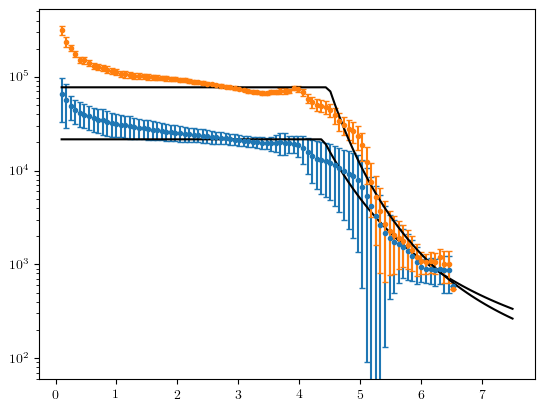

In [ ]:
params = lmfit.Parameters()

Ns = 100

t_min=0.0e0
t_max=1.0e3
t_delta = (t_max - t_min) / Ns

sig_min=1.0e-1
sig_max=1.0e3
sig_delta = (sig_max - sig_min) / Ns

b_min=0.0e0
b_max=1.0e1
b_delta = (b_max - b_min) / Ns

params.add("t_0", value=5.0e0, min=t_min, max=t_max)
params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
params.add("b", value=2.0e0, min=b_min, max=b_max)

manual_cap = np.nanmean(np.asarray(data_mean)[np.logical_and(np.asarray(sigma_sample) > 2.0, np.asarray(sigma_sample) < 4.0)])

print(manual_cap)
print()

params.add("cap", value=manual_cap, vary=False)

# fit
x = np.asarray(sigma_sample)
y = np.asarray(data_mean)
eps = np.asarray(data_std)

nanmask = ~np.isnan(y)
x = x[nanmask]
y = y[nanmask]
print(len(x), len(y))
print()
eps = np.asarray(eps)[nanmask]

# nanmask = y < 5e4
# x = x[nanmask]
# y = y[nanmask]
# print(len(x), len(y))
# print()
# eps = np.asarray(eps)[nanmask]

out = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=100)

params = lmfit.Parameters()
params.add("t_0", value=out.params["t_0"].value, min=out.params["t_0"].value - t_delta, max=out.params["t_0"].value + t_delta)
params.add("sig_0", value=out.params["sig_0"].value, min=out.params["sig_0"].value - sig_delta, max=out.params["sig_0"].value + sig_delta)
params.add("b", value=out.params["b"].value, min=out.params["b"].value - b_delta, max=out.params["b"].value + b_delta)
params.add("cap", value=out.params["cap"].value, vary=False)

out = lmfit.minimize(nek_law, params, args=(x, y))

outwb = lmfit.minimize(nek_law, params, args=(x, y))

plt.errorbar(sigma_sample, data_mean, yerr=data_std, fmt="o", markersize=3, capsize=2)
plt.plot(sigma_sample, nek_law(out.params, sigma_sample), c="black")

params = lmfit.Parameters()
params.add("t_0", value=5.0e0, min=t_min, max=t_max)
params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
params.add("b", value=2.0e0, min=b_min, max=b_max)

manual_cap = np.nanmean(np.asarray(data_mean_wb)[np.logical_and(np.asarray(sigma_sample) > 2.0, np.asarray(sigma_sample) < 4.0)])

print(manual_cap)
print()

params.add("cap", value=manual_cap, vary=False)

# fit
x = np.asarray(sigma_sample)
y = np.asarray(data_mean_wb)
eps = np.asarray(data_std_wb)

nanmask = ~np.isnan(y)
x = x[nanmask]
y = y[nanmask]
print(len(x), len(y))
print()
eps = np.asarray(eps)[nanmask]

# nanmask = y < 5e4
# x = x[nanmask]
# y = y[nanmask]
# print(len(x), len(y))
# print()
# eps = np.asarray(eps)[nanmask]

outwb = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=100)

# copy outwb params and add bounds
params = lmfit.Parameters()
params.add("t_0", value=outwb.params["t_0"].value, min=outwb.params["t_0"].value - t_delta, max=outwb.params["t_0"].value + t_delta)
params.add("sig_0", value=outwb.params["sig_0"].value, min=outwb.params["sig_0"].value - sig_delta, max=outwb.params["sig_0"].value + sig_delta)
params.add("b", value=outwb.params["b"].value, min=outwb.params["b"].value - b_delta, max=outwb.params["b"].value + b_delta)
params.add("cap", value=outwb.params["cap"].value, vary=False)

outwb = lmfit.minimize(nek_law, params, args=(x, y))


plt.errorbar(sigma_sample, data_mean_wb, yerr=data_std, fmt="o", markersize=3, capsize=2)
plt.plot(sigma_sample, nek_law(outwb.params, sigma_sample), c="black")

plt.yscale("log")

lmfit.report_fit(out)
lmfit.report_fit(outwb)



In [ ]:
times[::13]
times[-1]

100000

52 100000


/tmp/ipykernel_24832/2068026347.py:27: RuntimeWarning: Mean of empty slice
  data_mean.append(np.nanmean(1/10**fli_x_post_data_list[idx][j][mask]))
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_24832/2068026347.py:33: RuntimeWarning: Mean of empty slice
  data_mean_wb.append(np.nanmean(tmp_data))
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


39 10000
26 1000
52 100000
39 10000
26 1000
52 100000
39 10000
26 1000


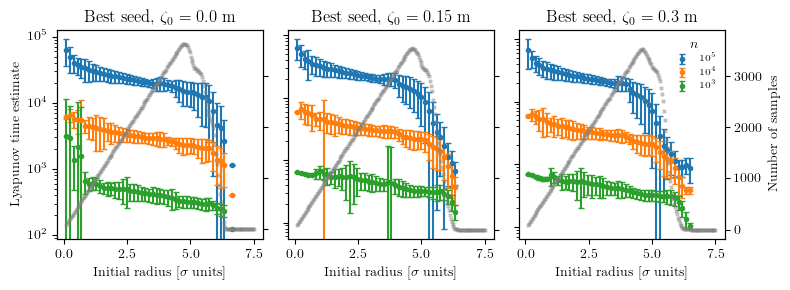

In [ ]:
from_sigma = 0.1
to_sigma = 7.5

bucket_lenght = 0.2
n_samples = 200

sigma_sample = np.linspace(from_sigma, to_sigma, n_samples)
sigma_sample_low = sigma_sample - bucket_lenght / 2
sigma_sample_high = sigma_sample + bucket_lenght / 2

fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, (idx, ax) in enumerate(zip(range(6, 9), axs)):
    for j, t in list(zip(range(26, len(times), 13), (times[26::13])))[::-1]:
        print(j, t)
        data_mean = []
        data_std = []
        
        data_mean_wb = []
        data_std_wb = []
        
        n_samples = []

        for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
            mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)
            
            data_mean.append(np.nanmean(1/10**fli_x_post_data_list[idx][j][mask]))
            data_std.append(np.nanstd(1/10**fli_x_post_data_list[idx][j][mask]))
            
            tmp_data = flibk_x_post_data_list[idx][j][mask].copy()
            tmp_data[tmp_data < -6] = np.nan
            tmp_data = 1/10**tmp_data
            data_mean_wb.append(np.nanmean(tmp_data))
            data_std_wb.append(np.nanstd(tmp_data))
            
            n_samples.append(np.count_nonzero(
                ~np.isnan(fli_x_post_data_list[idx][j][mask])
            ))

        ax.errorbar(sigma_sample[::4], data_mean[::4], yerr=data_std[::4], fmt="o", markersize=3, capsize=2, label=f"$10^{int(np.log10(t))}$")
        # ax.errorbar(sigma_sample, data_mean_wb, yerr=data_std, fmt="o", markersize=3, capsize=2)
    ax.set_yscale("log")
    # ax.set_ylim(1e2, 3e5)
    
    if i == 0:
        ax.set_ylabel("Lyapunov time estimate")
    else:
        ax.set_yticklabels([])
    ax.set_xlabel("Initial radius [$\\sigma$ units]")
    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")
    ax_bis = ax.twinx()
    ax_bis.scatter(sigma_sample, n_samples, marker="x", c="grey", s=5, alpha=0.5)
    ax_bis.set_ylim(top=3900)
    if i == 2:
        ax_bis.set_ylabel("Number of samples")
        ax.legend(title="$n$", fontsize="x-small", frameon=False)
    else:
        ax_bis.set_yticklabels([])

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "lyapunov_time_vs_radius.png"), bbox_inches="tight", dpi=600)

/tmp/ipykernel_6891/1262705424.py:28: RuntimeWarning: Mean of empty slice
  data_mean.append(np.nanmean(1/10**fli_x_post_data_list[idx][-1][mask]))
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_6891/1262705424.py:34: RuntimeWarning: Mean of empty slice
  data_mean_wb.append(np.nanmean(tmp_data))
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


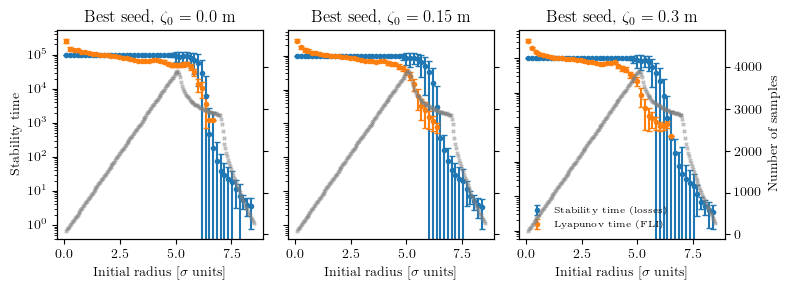

In [ ]:
from_sigma = 0.1
to_sigma = 8.5

bucket_lenght = 0.2
n_samples = 200

sigma_sample = np.linspace(from_sigma, to_sigma, n_samples)
sigma_sample_low = sigma_sample - bucket_lenght / 2
sigma_sample_high = sigma_sample + bucket_lenght / 2

fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, (idx, ax) in enumerate(zip(range(6, 9), axs)):
    data_mean_stab = []
    data_std_stab = []
    
    data_mean = []
    data_std = []
    
    data_mean_wb = []
    data_std_wb = []
    
    n_samples = []

    for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
        mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)
        
        data_mean.append(np.nanmean(1/10**fli_x_post_data_list[idx][-1][mask]))
        data_std.append(np.nanstd(1/10**fli_x_post_data_list[idx][-1][mask]))
        
        tmp_data = flibk_x_post_data_list[idx][-1][mask].copy()
        tmp_data[tmp_data < -6] = np.nan
        tmp_data = 1/10**tmp_data
        data_mean_wb.append(np.nanmean(tmp_data))
        data_std_wb.append(np.nanstd(tmp_data))
        
        data_mean_stab.append(np.nanmean(stability_list[idx][mask]))
        data_std_stab.append(np.nanstd(stability_list[idx][mask]))
        
        n_samples.append(np.count_nonzero(
            ~np.isnan(stability_list[idx][mask])
        ))

    ax.errorbar(sigma_sample[::4], data_mean_stab[::4], yerr=data_std_stab[::4], fmt="o", markersize=3, capsize=2, label="Stability time (losses)")
    ax.errorbar(sigma_sample[::4], data_mean_wb[::4], yerr=data_std[::4], fmt="o", markersize=3, capsize=2, label="Lyapunov time (FLI)")

    ax.set_yscale("log")
    # ax.set_ylim(1e2, 3e5)
    
    if i == 0:
        ax.set_ylabel("Stability time")
    else:
        ax.set_yticklabels([])
    ax.set_xlabel("Initial radius [$\\sigma$ units]")
    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")
    ax_bis = ax.twinx()
    ax_bis.scatter(sigma_sample, n_samples, marker="x", c="grey", s=5, alpha=0.5)
    ax_bis.set_ylim(top=4900)
    if i == 2:
        ax_bis.set_ylabel("Number of samples")
        ax.legend(fontsize="x-small", frameon=False)
    else:
        ax_bis.set_yticklabels([])

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "lyapunov_time_vs_radius.png"), bbox_inches="tight", dpi=600)

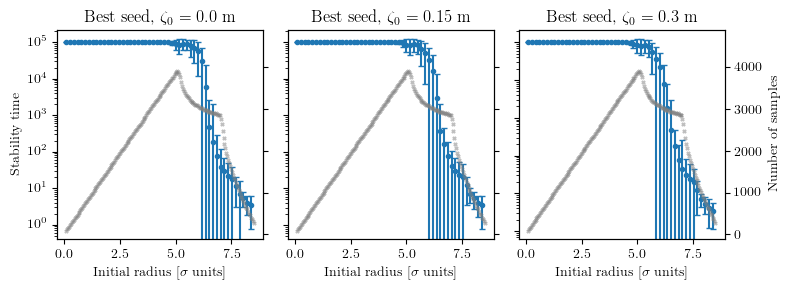

In [ ]:
from_sigma = 0.1
to_sigma = 8.5

bucket_lenght = 0.2
n_samples = 200

sigma_sample = np.linspace(from_sigma, to_sigma, n_samples)
sigma_sample_low = sigma_sample - bucket_lenght / 2
sigma_sample_high = sigma_sample + bucket_lenght / 2

fig, axs = plt.subplots(1, 3, figsize=(8, 3))

for i, (idx, ax) in enumerate(zip(range(6, 9), axs)):
    data_mean_stab = []
    data_std_stab = []
    
    n_samples = []

    for s, l, h in zip(sigma_sample, sigma_sample_low, sigma_sample_high):
        mask = np.logical_and(radius_sigma_list[idx] >= l, radius_sigma_list[idx] < h)
        
        data_mean_stab.append(np.nanmean(stability_list[idx][mask]))
        data_std_stab.append(np.nanstd(stability_list[idx][mask]))
        
        n_samples.append(np.count_nonzero(
            ~np.isnan(stability_list[idx][mask])
        ))

    ax.errorbar(sigma_sample[::4], data_mean_stab[::4], yerr=data_std_stab[::4], fmt="o", markersize=3, capsize=2)
    ax.set_yscale("log")
    # ax.set_ylim(1e2, 3e5)
    
    if i == 0:
        ax.set_ylabel("Stability time")
    else:
        ax.set_yticklabels([])
    ax.set_xlabel("Initial radius [$\\sigma$ units]")
    ax.set_title(f"{lattice_name_list[2]} seed, $\\zeta_0={zeta_name_list[i]}$ m")
    ax_bis = ax.twinx()
    ax_bis.scatter(sigma_sample, n_samples, marker="x", c="grey", s=5, alpha=0.5)
    ax_bis.set_ylim(top=4900)
    if i == 2:
        ax_bis.set_ylabel("Number of samples")
    else:
        ax_bis.set_yticklabels([])

plt.tight_layout()
plt.savefig(os.path.join(IMGDIR, "lyapunov_time_vs_radius.png"), bbox_inches="tight", dpi=600)

In [ ]:
import lmfit

def nek_law(params, x, data=None, eps=None):
    t_0 = 10**params["t_0"].value
    sig_0 = params["sig_0"].value
    b = params["b"].value

    val = np.asarray(t_0 * np.exp((sig_0/x)**b))

    # print(np.count_nonzero(eps))
    if data is not None:
        if np.any(np.isnan((np.log10(val) - np.log10(data)))): 
            # print("NAN!")
            return np.ones_like(data) * 1e10
        if np.any(np.isinf((np.log10(val) - np.log10(data)))): 
            # print("INF!")
            return np.ones_like(data) * 1e10

    if data is None:
        return val
    if eps is None:
        return (np.log10(val) - np.log10(data))
    return (val - data) / eps

In [ ]:
params = lmfit.Parameters()

Ns = 100

t_min=-2.0
t_max=2.0
t_delta = (t_max - t_min) / Ns

sig_min=1.0e-1
sig_max=1.0e3
sig_delta = (sig_max - sig_min) / Ns

b_min=0.0e0
b_max=1.0e1
b_delta = (b_max - b_min) / Ns

params.add("t_0", value=5.0e0, min=t_min, max=t_max)
params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
params.add("b", value=2.0e0, min=b_min, max=b_max)

# fit
x = np.asarray(sigma_sample)
y = np.asarray(data_mean_stab)

nanmask = ~np.isnan(y)
x = x[nanmask]
y = y[nanmask]
print(len(x), len(y))
print()

nanmask = x >= 5.75
x = x[nanmask]
y = y[nanmask]
print(len(x), len(y))
print()

out = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=100)

params = lmfit.Parameters()
params.add("t_0", value=out.params["t_0"].value, min=out.params["t_0"].value - t_delta, max=out.params["t_0"].value + t_delta)
params.add("sig_0", value=out.params["sig_0"].value, min=out.params["sig_0"].value - sig_delta, max=out.params["sig_0"].value + sig_delta)
params.add("b", value=out.params["b"].value, min=out.params["b"].value - b_delta, max=out.params["b"].value + b_delta)

out = lmfit.minimize(nek_law, params, args=(x, y))

200 200

66 66



/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 73
    # data points      = 66
    # variables        = 3
    chi-square         = 1.37137792
    reduced chi-square = 0.02176790
    Akaike info crit   = -249.673356
    Bayesian info crit = -243.104392
[[Variables]]
    t_0:   -0.50464646 +/- 0.16305331 (32.31%) (init = -0.4646465)
    sig_0:  10.1651593 +/- 0.41446419 (4.08%) (init = 10.2)
    b:      4.50597675 +/- 0.28758853 (6.38%) (init = 4.444444)
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_0, b)   = -0.997
    C(t_0, sig_0) = -0.984
    C(t_0, b)     = 0.970


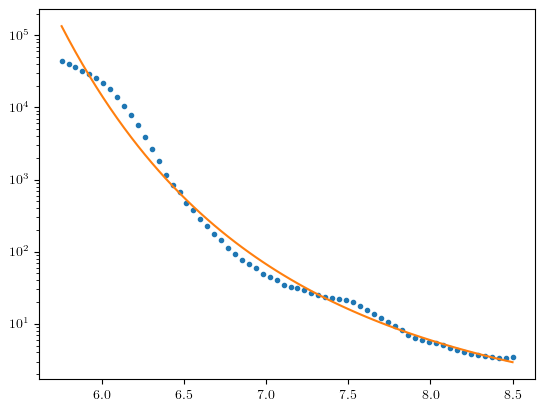

In [ ]:
plt.plot(x, y, "o", markersize=3, label="Data")
plt.plot(x, nek_law(out.params, x), label="Fit")
plt.yscale("log")
lmfit.report_fit(out)

In [ ]:
params = lmfit.Parameters()

Ns = 100

t_min=0.0e0
t_max=1.0e1
t_delta = (t_max - t_min) / Ns

sig_min=1.0e-1
sig_max=1.0e3
sig_delta = (sig_max - sig_min) / Ns

b_min=0.0e0
b_max=1.0e1
b_delta = (b_max - b_min) / Ns

params.add("t_0", value=5.0e0, min=t_min, max=t_max)
params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
params.add("b", value=2.0e0, min=b_min, max=b_max)

# fit
x = np.asarray(sigma_sample)
y = np.asarray(data_mean_wb)

nanmask = ~np.isnan(y)
x = x[nanmask]
y = y[nanmask]
print(len(x), len(y))
print()

nanmask = x >= 4.0
x = x[nanmask]
y = y[nanmask]
print(len(x), len(y))
print()

out = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=100)

params = lmfit.Parameters()
params.add("t_0", value=out.params["t_0"].value, min=out.params["t_0"].value - t_delta, max=out.params["t_0"].value + t_delta)
params.add("sig_0", value=out.params["sig_0"].value, min=out.params["sig_0"].value - sig_delta, max=out.params["sig_0"].value + sig_delta)
params.add("b", value=out.params["b"].value, min=out.params["b"].value - b_delta, max=out.params["b"].value + b_delta)

out = lmfit.minimize(nek_law, params, args=(x, y))

154 154

61 61



/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in multiply
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_6891/4054572864.py:8: RuntimeWarning: overflow encountered in exp
  val = np.asarray

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 77
    # data points      = 20
    # variables        = 3
    chi-square         = 0.11464521
    reduced chi-square = 0.00674384
    Akaike info crit   = -97.2329061
    Bayesian info crit = -94.2457092
[[Variables]]
    t_0:    1.83956505 +/- 7.05156679 (383.33%) (init = 1.818182)
    sig_0:  10.4155366 +/- 64.3917030 (618.23%) (init = 10.2)
    b:      1.92020202 +/- 1.64337247 (85.58%) (init = 2.020202)
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_0, b)   = 1.000
    C(t_0, sig_0) = -1.000
    C(t_0, b)     = -0.999


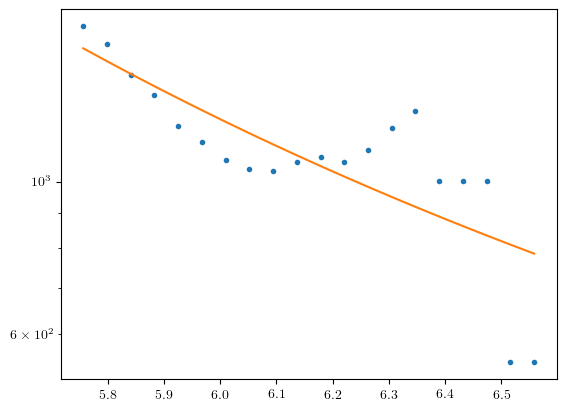

In [ ]:
plt.plot(x, y, "o", markersize=3, label="Data")
plt.plot(x, nek_law(out.params, x), label="Fit")
plt.yscale("log")
lmfit.report_fit(out)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 85
    # data points      = 61
    # variables        = 3
    chi-square         = 2.00870102
    reduced chi-square = 0.03463278
    Akaike info crit   = -202.216522
    Bayesian info crit = -195.883901
[[Variables]]
    t_0:    0.00101010 +/- 1.01140699 (100128.95%) (init = 0.1010101)
    sig_0:  30.0172590 +/- 34.5974897 (115.26%) (init = 30.4)
    b:      1.23548152 +/- 0.55017237 (44.53%) (init = 1.212121)
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_0, b)   = -1.000
    C(t_0, sig_0) = 0.998
    C(t_0, b)     = -0.997


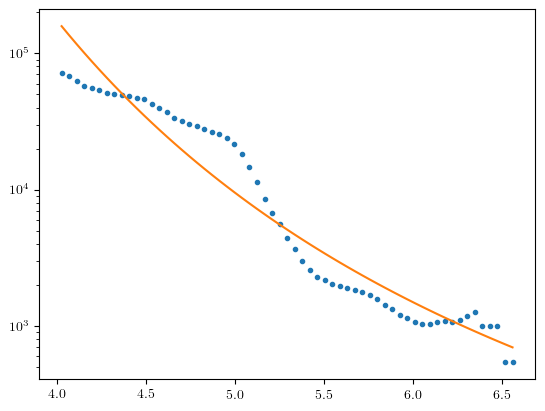

In [ ]:
plt.plot(x, y, "o", markersize=3, label="Data")
plt.plot(x, nek_law(out.params, x), label="Fit")
plt.yscale("log")
lmfit.report_fit(out)

21600.19453659689

87 87



/tmp/ipykernel_24832/2732911390.py:16: RuntimeWarning: divide by zero encountered in log10
  if np.any(np.isnan((np.log10(val) - np.log10(data)))):
/tmp/ipykernel_24832/2732911390.py:19: RuntimeWarning: divide by zero encountered in log10
  if np.any(np.isinf((np.log10(val) - np.log10(data)))):
/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: invalid value encountered in multiply
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: invalid value encountered in multiply
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_24832/2732911390.py:16: RuntimeWarning: divide by zero encountered in log10
  if np.any(np.isnan((np.log10(val) - np.log10(data)))):
/tmp/ipykernel_2

77534.5475832086

87 87



/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: overflow encountered in exp
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/tmp/ipykernel_24832/2732911390.py:16: RuntimeWarning: divide by zero encountered in log10
  if np.any(np.isnan((np.log10(val) - np.log10(data)))):
/tmp/ipykernel_24832/2732911390.py:19: RuntimeWarning: divide by zero encountered in log10
  if np.any(np.isinf((np.log10(val) - np.log10(data)))):
/tmp/ipykernel_24832/2732911390.py:11: RuntimeWarning: invalid value encountered in multiply
  val = np.asarray(t_0 * np.exp((sig_0/x)**b))
/tmp/ipykernel_24832/2732911

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 68
    # data points      = 87
    # variables        = 3
    chi-square         = 1.61579609
    reduced chi-square = 0.01923567
    Akaike info crit   = -340.788991
    Bayesian info crit = -333.391266
[[Variables]]
    t_0:    40.5050505 +/- 78.0081643 (192.59%) (init = 50.50505)
    sig_0:  10.8344387 +/- 7.67830337 (70.87%) (init = 10.2)
    b:      2.03558493 +/- 1.19020485 (58.47%) (init = 2.121212)
    cap:    21600.19 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_0, b)   = -0.999
    C(t_0, sig_0) = 0.998
    C(t_0, b)     = -0.995
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 96
    # data points      = 87
    # variables        = 3
    chi-square         = 2.24063006
    reduced chi-square = 0.02667417
    Akaike info crit   = -312.346138
    Bayesian info crit = -304.948414
[[Variables]]
    t_0:    35.9829125 +/- 69.0818122 (191.99%) (init 

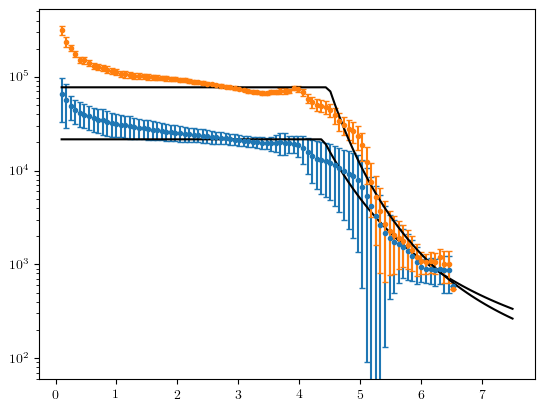

In [ ]:
params = lmfit.Parameters()

Ns = 100

t_min=0.0e0
t_max=1.0e3
t_delta = (t_max - t_min) / Ns

sig_min=1.0e-1
sig_max=1.0e3
sig_delta = (sig_max - sig_min) / Ns

b_min=0.0e0
b_max=1.0e1
b_delta = (b_max - b_min) / Ns

params.add("t_0", value=5.0e0, min=t_min, max=t_max)
params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
params.add("b", value=2.0e0, min=b_min, max=b_max)

manual_cap = np.nanmean(np.asarray(data_mean)[np.logical_and(np.asarray(sigma_sample) > 2.0, np.asarray(sigma_sample) < 4.0)])

print(manual_cap)
print()

params.add("cap", value=manual_cap, vary=False)

# fit
x = np.asarray(sigma_sample)
y = np.asarray(data_mean)
eps = np.asarray(data_std)

nanmask = ~np.isnan(y)
x = x[nanmask]
y = y[nanmask]
print(len(x), len(y))
print()
eps = np.asarray(eps)[nanmask]

# nanmask = y < 5e4
# x = x[nanmask]
# y = y[nanmask]
# print(len(x), len(y))
# print()
# eps = np.asarray(eps)[nanmask]

out = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=100)

params = lmfit.Parameters()
params.add("t_0", value=out.params["t_0"].value, min=out.params["t_0"].value - t_delta, max=out.params["t_0"].value + t_delta)
params.add("sig_0", value=out.params["sig_0"].value, min=out.params["sig_0"].value - sig_delta, max=out.params["sig_0"].value + sig_delta)
params.add("b", value=out.params["b"].value, min=out.params["b"].value - b_delta, max=out.params["b"].value + b_delta)
params.add("cap", value=out.params["cap"].value, vary=False)

out = lmfit.minimize(nek_law, params, args=(x, y))

outwb = lmfit.minimize(nek_law, params, args=(x, y))

plt.errorbar(sigma_sample, data_mean, yerr=data_std, fmt="o", markersize=3, capsize=2)
plt.plot(sigma_sample, nek_law(out.params, sigma_sample), c="black")

params = lmfit.Parameters()
params.add("t_0", value=5.0e0, min=t_min, max=t_max)
params.add("sig_0", value=10.0e0, min=sig_min, max=sig_max)
params.add("b", value=2.0e0, min=b_min, max=b_max)

manual_cap = np.nanmean(np.asarray(data_mean_wb)[np.logical_and(np.asarray(sigma_sample) > 2.0, np.asarray(sigma_sample) < 4.0)])

print(manual_cap)
print()

params.add("cap", value=manual_cap, vary=False)

# fit
x = np.asarray(sigma_sample)
y = np.asarray(data_mean_wb)
eps = np.asarray(data_std_wb)

nanmask = ~np.isnan(y)
x = x[nanmask]
y = y[nanmask]
print(len(x), len(y))
print()
eps = np.asarray(eps)[nanmask]

# nanmask = y < 5e4
# x = x[nanmask]
# y = y[nanmask]
# print(len(x), len(y))
# print()
# eps = np.asarray(eps)[nanmask]

outwb = lmfit.minimize(nek_law, params, args=(x, y), method="brute", workers=40, Ns=100)

# copy outwb params and add bounds
params = lmfit.Parameters()
params.add("t_0", value=outwb.params["t_0"].value, min=outwb.params["t_0"].value - t_delta, max=outwb.params["t_0"].value + t_delta)
params.add("sig_0", value=outwb.params["sig_0"].value, min=outwb.params["sig_0"].value - sig_delta, max=outwb.params["sig_0"].value + sig_delta)
params.add("b", value=outwb.params["b"].value, min=outwb.params["b"].value - b_delta, max=outwb.params["b"].value + b_delta)
params.add("cap", value=outwb.params["cap"].value, vary=False)

outwb = lmfit.minimize(nek_law, params, args=(x, y))


plt.errorbar(sigma_sample, data_mean_wb, yerr=data_std, fmt="o", markersize=3, capsize=2)
plt.plot(sigma_sample, nek_law(outwb.params, sigma_sample), c="black")

plt.yscale("log")

lmfit.report_fit(out)
lmfit.report_fit(outwb)



In [ ]:
lmfit.report_fit(out)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 68
    # data points      = 87
    # variables        = 3
    chi-square         = 1.61579609
    reduced chi-square = 0.01923567
    Akaike info crit   = -340.788991
    Bayesian info crit = -333.391266
[[Variables]]
    t_0:    40.5050505 +/- 78.0081643 (192.59%) (init = 50.50505)
    sig_0:  10.8344387 +/- 7.67830337 (70.87%) (init = 10.2)
    b:      2.03558493 +/- 1.19020485 (58.47%) (init = 2.121212)
    cap:    21600.19 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_0, b)   = -0.999
    C(t_0, sig_0) = 0.998
    C(t_0, b)     = -0.995


In [ ]:

lmfit.report_fit(outwb)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 96
    # data points      = 87
    # variables        = 3
    chi-square         = 2.24063006
    reduced chi-square = 0.02667417
    Akaike info crit   = -312.346138
    Bayesian info crit = -304.948414
[[Variables]]
    t_0:    35.9829125 +/- 69.0818122 (191.99%) (init = 30.30303)
    sig_0:  9.75326648 +/- 3.88276994 (39.81%) (init = 10.2)
    b:      2.62525246 +/- 0.20774614 (7.91%) (init = 2.525253)
    cap:    77534.55 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_0, b)   = -0.999
    C(t_0, sig_0) = -0.996
    C(t_0, b)     = 0.991


-8.468264558057061

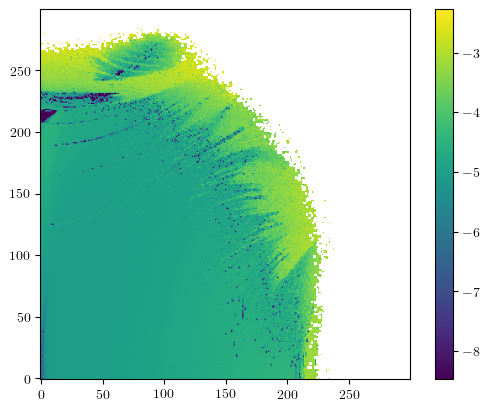

In [ ]:
plt.imshow(flibk_x_post_data_list[idx][-1].reshape(300, 300), origin="lower")
plt.colorbar()

np.nanmin(flibk_x_post_data_list[idx][-1])

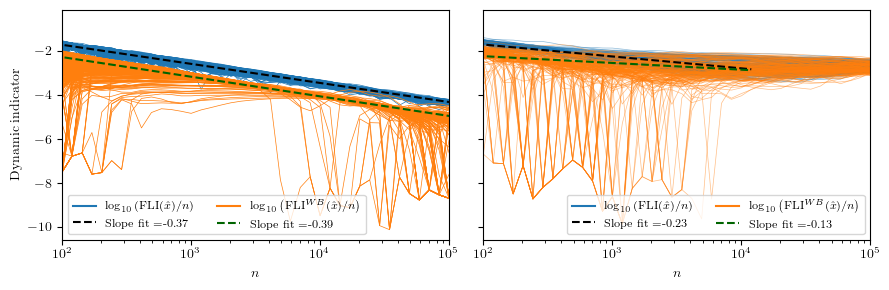

In [ ]:
for main_index in range(4,5):
    tmp_data = fli_x_post_data_list[main_index]
    tmp_bdata = [p for p in flibk_x_post_data_list[main_index]]
    # plt.figure()
    # plt.hist(tmp_data[-1], bins=100)
    # plt.figure()
    # plt.hist(tmp_bdata[-1], bins=100)

    stab_mask_min = -4.5 
    stab_mask_max = -4.2
    stab_mask = np.logical_and(np.logical_and(tmp_data[-1] > stab_mask_min, tmp_data[-1] < stab_mask_max), tmp_bdata[-1]>-14)

    # print(np.count_nonzero(stab_mask))

    masked_data = [d[stab_mask][::100] for d in tmp_data]
    masked_bdata = [d[stab_mask][::100] for d in tmp_bdata] 

    tmp_data = np.log10(np.nanmean(np.power(10, masked_data), axis=1))
    tmp_bdata = np.log10(np.nanmean(np.power(10, masked_bdata), axis=1))

    fit_data = np.polyfit(np.log(times[12:]), tmp_data[12:], 1)
    fit_bdata = np.polyfit(np.log(times[12:]), tmp_bdata[12:], 1)

    fit_fn_data = np.poly1d(fit_data)
    fit_fn_bdata = np.poly1d(fit_bdata)

    fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
    axs[0].plot(times, masked_data, c="C0", linewidth=0.5)
    axs[0].plot([],[], c="C0", label="$\\log_{{10}}\\left(\\mathrm{{FLI}}(\\hat{x}) / n \\right)$")
    axs[0].plot([], [], "--", c="black", label="Slope fit ={:.2f}".format(fit_data[0]))
    # plt.plot(times, [np.mean(d) for d in masked_data])
    axs[0].plot(times, masked_bdata, c="C1", linewidth=0.5)
    axs[0].plot([],[], c="C1", label="$\\log_{{10}}\\left(\\mathrm{{FLI}}^{{WB}}(\\hat{x}) / n \\right)$")
    axs[0].plot([], [], "--", c="darkgreen", label="Slope fit ={:.2f}".format(fit_bdata[0]))
    # plt.plot(times, [np.mean(d) for d in masked_bdata])

    axs[0].plot(times, fit_fn_data(np.log(times)), "--", c="black")
    axs[0].plot(times, fit_fn_bdata(np.log(times)), "--", c="darkgreen")

    axs[0].set_xscale("log")
    axs[0].set_xlim(1e2, 1e5)
    axs[0].legend(ncol=2, fontsize="small")

    tmp_data = fli_x_post_data_list[7]
    tmp_bdata = [p for p in flibk_x_post_data_list[7]]

    chaos_mask_min = -3.0
    chaos_mask_max = -2.0
    chaos_mask = np.logical_and(np.logical_and(tmp_data[-1] > chaos_mask_min, tmp_data[-1] < chaos_mask_max), tmp_bdata[-1]>-14)

    # print(np.count_nonzero(chaos_mask))

    masked_data = [d[chaos_mask][::20] for d in tmp_data]
    masked_bdata = [d[chaos_mask][::20] for d in tmp_bdata]

    tmp_data = np.log10(np.nanmean(np.power(10, masked_data), axis=1))
    tmp_bdata = np.log10(np.nanmean(np.power(10, masked_bdata), axis=1))

    fit_data = np.polyfit(np.log(times[12:-12]), tmp_data[12:-12], 1)
    fit_bdata = np.polyfit(np.log(times[12:-12]), tmp_bdata[12:-12], 1)

    fit_fn_data = np.poly1d(fit_data)
    fit_fn_bdata = np.poly1d(fit_bdata)

    axs[1].plot(times, masked_data, c="C0", linewidth=0.5, alpha=0.5)
    axs[1].plot([],[], c="C0", label="$\\log_{{10}}\\left(\\mathrm{{FLI}}(\\hat{x}) / n \\right)$")
    axs[1].plot([], [], "--", c="black", label="Slope fit ={:.2f}".format(fit_data[0]))
    # plt.plot(times, [np.mean(d) for d in masked_data])
    axs[1].plot(times, masked_bdata, c="C1", linewidth=0.5, alpha=0.5)
    axs[1].plot([],[], c="C1", label="$\\log_{{10}}\\left(\\mathrm{{FLI}}^{{WB}}(\\hat{x}) / n \\right)$")
    axs[1].plot([], [], "--", c="darkgreen", label="Slope fit ={:.2f}".format(fit_bdata[0]))
    # plt.plot(times, [np.mean(d) for d in masked_bdata])

    axs[1].plot(times[:-12], fit_fn_data(np.log(times[:-12])), "--", c="black")
    axs[1].plot(times[:-12], fit_fn_bdata(np.log(times[:-12])), "--", c="darkgreen")

    axs[1].set_xscale("log")
    axs[1].set_xlim(1e2, 1e5)
    axs[1].legend(ncol=2, fontsize="small")

    axs[0].set_xlabel("$n$")
    axs[1].set_xlabel("$n$")

    axs[0].set_ylabel("Dynamic indicator")
    # axs[1].set_ylabel("$n$")

    # add a common title to the figure
    # plt.suptitle(f"{title_plot_list[main_index]}")

    plt.tight_layout()
    plt.savefig(os.path.join(IMGDIR, f"fli_vs_flibk_idx_{main_index}.png"), bbox_inches="tight", dpi=600)

/tmp/ipykernel_33073/423944429.py:41: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean([data_fli_x, data_fli_px, data_fli_y, data_fli_py, data_fli_zeta, data_fli_delta], axis=0)
/home/HPC/camontan/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


(300, 300, 4)


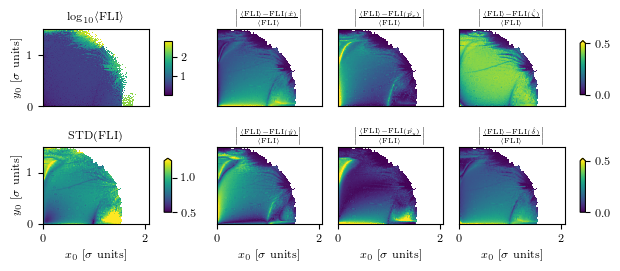

In [ ]:
# fig, axs = plt.subplots(1, 3, figsize=(8, 3))
for main_idx in range(4,5):

    fig = plt.figure(figsize=(7, 2.8))
    gs = gridspec.GridSpec(2, 6, width_ratios=[1, 0.35, 1, 1, 1, 0.05])

    gs0 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[0,5], height_ratios=[0.3, 1, 0.3])
    gs1 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs[1,5], height_ratios=[0.3, 1, 0.3])

    gs2 = gridspec.GridSpecFromSubplotSpec(3, 2, subplot_spec=gs[0,1], height_ratios=[0.3, 1, 0.3], width_ratios=[1, 3.5])
    gs3 = gridspec.GridSpecFromSubplotSpec(3, 2, subplot_spec=gs[1,1], height_ratios=[0.3, 1, 0.3], width_ratios=[1, 3.5])


    axs = [
        plt.subplot(gs[0,0]),
        plt.subplot(gs[0,2]),
        plt.subplot(gs[0,3]),
        plt.subplot(gs[0,4]),
        plt.subplot(gs0[1]),

        plt.subplot(gs[1,0]),
        plt.subplot(gs[1,2]),
        plt.subplot(gs[1,3]),
        plt.subplot(gs[1,4]),
        plt.subplot(gs1[1]),

        plt.subplot(gs2[1,0]),
        plt.subplot(gs3[1,0]),
    ]

    idx = -1
    samples = 300

    data_fli_x = fli_x_data_list[main_idx][idx]
    data_fli_px = fli_px_data_list[main_idx][idx]
    data_fli_y = fli_y_data_list[main_idx][idx]
    data_fli_py = fli_py_data_list[main_idx][idx]
    data_fli_zeta = fli_zeta_data_list[main_idx][idx]
    data_fli_delta = fli_delta_data_list[main_idx][idx]

    data_mean = np.nanmean([data_fli_x, data_fli_px, data_fli_y, data_fli_py, data_fli_zeta, data_fli_delta], axis=0)
    data_std = np.nanstd([data_fli_x, data_fli_px, data_fli_y, data_fli_py, data_fli_zeta, data_fli_delta], axis=0)

    vmin = np.nanmin([np.nanmin(data_fli_x), np.nanmin(data_fli_px), np.nanmin(data_fli_y), np.nanmin(data_fli_py), np.nanmin(data_fli_zeta), np.nanmin(data_fli_delta)])
    vmax = np.nanmax([np.nanmax(data_fli_x), np.nanmax(data_fli_px), np.nanmax(data_fli_y), np.nanmax(data_fli_py), np.nanmax(data_fli_zeta), np.nanmax(data_fli_delta)])

    # vmin=0
    # vmax=20

    tmp = data_mean.copy().reshape(samples, samples)
    tmp_mask = tmp < 0
    cmap = plt.cm.get_cmap('viridis')
    tmp[tmp_mask] = np.nan
    norm = plt.Normalize(vmin=-4.0, vmax=np.nanmax(np.log10(tmp)))
    rgba = cmap(norm(np.log10(tmp)))
    print(rgba.shape)
    # color red the tmp_mask
    rgba[tmp_mask] = [1, 0, 0, 1]
    rgba[~tmp_mask] = [0, 0, 0, 0]

    tmp[np.isinf(tmp)] = np.nan

    map = axs[0].imshow(np.log10(data_mean).reshape(samples, samples), origin="lower", extent=e_list_sigma[main_idx], cmap="viridis", interpolation="nearest")
    axs[0].imshow((rgba), origin='lower', extent=e_list_sigma[main_idx], interpolation="nearest")

    axs[0].set_title("$\\log_{{10}}\\langle\\mathrm{{FLI}}\\rangle$", fontsize="small")
    axs[0].set_ylabel("$y_0$ [$\\sigma$ units]", fontsize="small")
    axs[0].set_xticklabels([])
    axs[0].set_xticks([])
    axs[0].set_xlabel("")

    cbar = plt.colorbar(map, cax=axs[-2], fraction=0.5)
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize("small")

    map = axs[5].imshow(((data_std)).reshape(samples, samples), origin="lower", extent=e_list_sigma[main_idx], cmap="viridis", vmin=0.5, vmax=1.25)
    axs[5].set_title("$\\mathrm{{STD}}({{\\mathrm{{FLI}}}})$", fontsize="small")
    axs[5].set_xlabel("$x_0$ [$\\sigma$ units]", fontsize="small")
    axs[5].set_ylabel("$y_0$ [$\\sigma$ units]", fontsize="small")

    cbar = plt.colorbar(map, cax=axs[-1], fraction=0.5, extend="max")
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize("small")

    diff_x = np.abs(np.abs(data_fli_x - data_mean) / data_mean)
    diff_px = np.abs(np.abs(data_fli_px - data_mean) / data_mean)
    diff_y = np.abs(np.abs(data_fli_y - data_mean) / data_mean)
    diff_py = np.abs(np.abs(data_fli_py - data_mean) / data_mean)
    diff_zeta = np.abs(np.abs(data_fli_zeta - data_mean) / data_mean)
    diff_delta = np.abs(np.abs(data_fli_delta - data_mean) / data_mean)

    map = axs[1].imshow((diff_x).reshape(samples, samples), origin="lower", extent=e_list_sigma[main_idx], cmap="viridis", vmin=0, vmax=0.5)
    axs[1].set_title("$\\left|\\frac{{\\langle\\mathrm{{FLI}}\\rangle - \\mathrm{{FLI}}(\\hat{{x}})}}{{\\langle\\mathrm{{FLI}}\\rangle}}\\right|$", fontsize="x-small")
    axs[1].set_xlabel("$x_0$ [$\\sigma$ units]")
    # remove y-axis labels
    axs[1].set_yticklabels([])
    axs[1].set_yticks([])
    axs[1].set_ylabel("")
    axs[1].set_xticklabels([])
    axs[1].set_xticks([])
    axs[1].set_xlabel("")

    map = axs[2].imshow((diff_px).reshape(samples, samples), origin="lower", extent=e_list_sigma[main_idx], cmap="viridis", vmin=0, vmax=0.5)
    axs[2].set_title("$\\left|\\frac{{\\langle\\mathrm{{FLI}}\\rangle - \\mathrm{{FLI}}(\\hat{{p_x}})}}{{\\langle\\mathrm{{FLI}}\\rangle}}\\right|$", fontsize="x-small")
    axs[2].set_xlabel("$x_0$ [$\\sigma$ units]")
    # remove y-axis labels
    axs[2].set_yticklabels([])
    axs[2].set_yticks([])
    axs[2].set_ylabel("")
    axs[2].set_xticklabels([])
    axs[2].set_xticks([])
    axs[2].set_xlabel("")

    map = axs[3].imshow((diff_zeta).reshape(samples, samples), origin="lower", extent=e_list_sigma[main_idx], cmap="viridis", vmin=0, vmax=0.5)
    axs[3].set_title("$\\left|\\frac{{\\langle\\mathrm{{FLI}}\\rangle - \\mathrm{{FLI}}(\\hat{{\\zeta}})}}{{\\langle\\mathrm{{FLI}}\\rangle}}\\right|$", fontsize="x-small")
    axs[3].set_xlabel("$x_0$ [$\\sigma$ units]")
    # remove y-axis labels
    axs[3].set_yticklabels([])
    axs[3].set_yticks([])
    axs[3].set_ylabel("")
    axs[3].set_xticklabels([])
    axs[3].set_xticks([])
    axs[3].set_xlabel("")

    map = axs[6].imshow((diff_y).reshape(samples, samples), origin="lower", extent=e_list_sigma[main_idx], cmap="viridis", vmin=0, vmax=0.5)
    axs[6].set_title("$\\left|\\frac{{\\langle\\mathrm{{FLI}}\\rangle - \\mathrm{{FLI}}(\\hat{{y}})}}{{\\langle\\mathrm{{FLI}}\\rangle}}\\right|$", fontsize="x-small")
    axs[6].set_xlabel("$x_0$ [$\\sigma$ units]", fontsize="small")
    # remove y-axis labels
    axs[6].set_yticklabels([])
    axs[6].set_yticks([])
    axs[6].set_ylabel("")

    map = axs[7].imshow((diff_py).reshape(samples, samples), origin="lower", extent=e_list_sigma[main_idx], cmap="viridis", vmin=0, vmax=0.5)
    axs[7].set_title("$\\left|\\frac{{\\langle\\mathrm{{FLI}}\\rangle - \\mathrm{{FLI}}(\\hat{{p_y}})}}{{\\langle\\mathrm{{FLI}}\\rangle}}\\right|$", fontsize="x-small")
    axs[7].set_xlabel("$x_0$ [$\\sigma$ units]", fontsize="small")
    # remove y-axis labels
    axs[7].set_yticklabels([])
    axs[7].set_yticks([])
    axs[7].set_ylabel("")

    map = axs[8].imshow((diff_delta).reshape(samples, samples), origin="lower", extent=e_list_sigma[main_idx], cmap="viridis", vmin=0, vmax=0.5)
    axs[8].set_title("$\\left|\\frac{{\\langle\\mathrm{{FLI}}\\rangle - \\mathrm{{FLI}}(\\hat{{\\delta}})}}{{\\langle\\mathrm{{FLI}}\\rangle}}\\right|$", fontsize="x-small")
    axs[8].set_xlabel("$x_0$ [$\\sigma$ units]", fontsize="small")
    # remove y-axis labels
    axs[8].set_yticklabels([])
    axs[8].set_yticks([])
    axs[8].set_ylabel("")

    cbar = plt.colorbar(map, cax=axs[4], extend="max", fraction=0.5)
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize("small")
    cbar = plt.colorbar(map, cax=axs[9], extend="max", fraction=0.5)
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize("small")


    # make all tick labels small
    for ax in axs:
        for t in ax.get_xticklabels():
            t.set_fontsize("small")
        for t in ax.get_yticklabels():
            t.set_fontsize("small")

    # plt.suptitle(f"{title_plot_list[main_idx]}", fontsize="small")
    # plt.tight_layout()
    # save figure
    plt.savefig(os.path.join(IMGDIR, f"LE_FLI_high_main_idx_{main_idx}.png"), bbox_inches="tight", dpi=600)

(300, 300, 4)


/tmp/ipykernel_20716/2869993249.py:14: RuntimeWarning: invalid value encountered in log10
  cmap = plt.imshow(np.log10(data_mean).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=-5, interpolation="nearest")


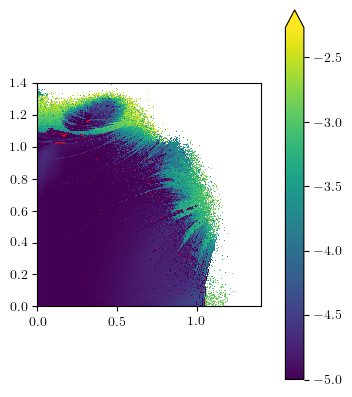

In [ ]:
tmp = data_mean.copy().reshape(samples, samples)
tmp_mask = tmp < 0
cmap = plt.cm.get_cmap('viridis')
tmp[tmp_mask] = np.nan
norm = plt.Normalize(vmin=-4.0, vmax=np.nanmax(np.log10(tmp)))
rgba = cmap(norm(np.log10(tmp)))
print(rgba.shape)
# color red the tmp_mask
rgba[tmp_mask] = [1, 0, 0, 1]
rgba[~tmp_mask] = [0, 0, 0, 0]

tmp[np.isinf(tmp)] = np.nan

cmap = plt.imshow(np.log10(data_mean).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=-5, interpolation="nearest")
plt.imshow((rgba), origin='lower', extent=e_list[idx]*1000, interpolation="nearest")
plt.colorbar(cmap, extend="max", fraction=0.5)

/tmp/ipykernel_20716/1734136836.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(data_mean).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=-5)


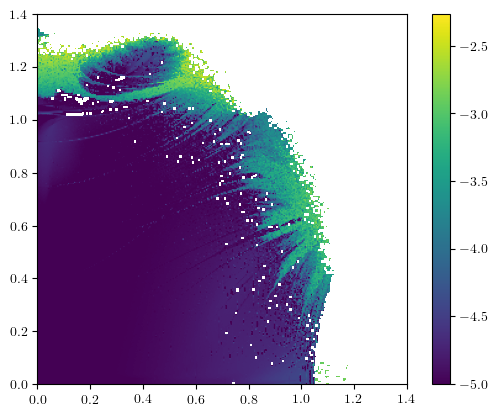

In [ ]:
plt.imshow(np.log10(data_mean).reshape(samples, samples), origin="lower", extent=1000 * e_list[7], cmap="viridis", vmin=-5)
plt.colorbar()

In [ ]:
np.count_nonzero(data_mean < 0)
np.count_nonzero(np.isinf(np.log10(data_mean)))

/tmp/ipykernel_20716/656745455.py:2: RuntimeWarning: invalid value encountered in log10
  np.count_nonzero(np.isinf(np.log10(data_mean)))


0

In [ ]:
print(times[26])
print(times[39])
print(times[52])

print(times[26:][0])
print(times[26:][13])
print(times[26:][26])

1000
10000
100000
1000
10000
100000


In [ ]:
for coord_label, latex_label, post_data_list, post_data_list_wb in list(zip(
    ["x", "px", "y", "py", "delta", "zeta"],
    ["x", "p_x", "y", "p_y", "\\delta", "\\zeta"],
    [fli_x_post_data_list, fli_px_post_data_list, fli_y_post_data_list, fli_py_post_data_list, fli_delta_post_data_list, fli_zeta_post_data_list],
    [flibk_x_thresh_list, flibk_px_thresh_list, flibk_y_thresh_list, flibk_py_thresh_list, flibk_delta_thresh_list, flibk_zeta_thresh_list],
))[4:5]:
    fig = plt.figure(figsize=(8, 6.75))

    gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    axs = []
    axs.append(plt.subplot(gs[0, 0]))
    axs.append(plt.subplot(gs[0, 1]))
    axs.append(plt.subplot(gs[0, 2]))
    axs.append(plt.subplot(gs[1, 0]))
    axs.append(plt.subplot(gs[1, 1]))
    axs.append(plt.subplot(gs[1, 2]))
    axs.append(plt.subplot(gs[2, 0]))
    axs.append(plt.subplot(gs[2, 1]))
    axs.append(plt.subplot(gs[2, 2]))

    idx = 4
    mask = mask_list[idx]

    for an_i, (ax, idx) in enumerate(zip(axs, range(3))):

        post_data = post_data_list[idx][26:]

        val_min, val_max = get_extents([l for l in post_data[::]], 10)
        print(val_min, val_max)

        val_min = -10.5
        val_max = -1.85

        tmp_data, bin_centers = compose_count_map([l[mask] for l in post_data], val_min, val_max, nbins=30, density=False)
        tmp_data = np.log10(tmp_data)
        # print(tmp_data.shape)
        # tmp_data = tmp_data[::13]

        cmap = axs[idx].imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[26::])-0.5], interpolation='none')

        divider = make_axes_locatable(axs[idx])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

        post_data = post_data_list_wb[idx+3][26:]

        val_min, val_max = get_extents([l for l in post_data[::]], 10)
        print(val_min, val_max)

        val_min = -10.5
        val_max = -1.85

        tmp_data, bin_centers = compose_count_map([l[mask] for l in post_data], val_min, val_max, nbins=30, density=False)
        tmp_data = np.log10(tmp_data)
        # print(tmp_data.shape)
        # tmp_data = tmp_data[::13]

        cmap = axs[idx+3].imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[26::])-0.5], interpolation='none')

        divider = make_axes_locatable(axs[idx+3])
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

        # plot the thresholds over the imshow
        # for i, t in enumerate(thresholds):
        #     axs[idx].plot([t, t], [(len(thresholds)-1-i)-0.5, (len(thresholds)-1-i)+0.5], '--', color='red')

        # set the y ticks at idx 0, 13, and 26, and set the labels as 10^3, 10^4, and 10^5
        axs[idx+3].set_yticks([0, 13, 26])
        axs[idx+3].set_yticklabels([f"$10^{{{int(np.log10(times[26:][0]))}}}$", f"$10^{{{int(np.log10(times[26:][13]))}}}$", f"$10^{{{int(np.log10(times[26:][26]))}}}$"][::-1])
        
        axs[idx].set_ylabel("$n$")
        axs[idx].set_title(f"{title_plot_list[idx]}")

        if an_i != 0 and an_i != 3 and an_i != 6:
            print(an_i)
            axs[idx].set_yticklabels([])
            axs[idx].set_ylabel('')


    # increase distance between subplots
    # increase distance between subplots
    plt.suptitle(f"$\\mathrm{{FLI}}^{{WB}}(\\hat{{{latex_label}}})$")
    plt.subplots_adjust(wspace=0.35)
    plt.subplots_adjust(hspace=0.40)

    plt.savefig(os.path.join(IMGDIR, f"evolution_fli_wb_{coord_label}.png"), bbox_inches="tight", dpi=300)

ValueError: Expected the given number of height ratios to match the number of rows of the grid

<Figure size 800x675 with 0 Axes>

-4.889130730175444 -1.9854567539672077
-4.780076998638982 -1.9385212430866279
1
-4.680066710536729 -2.0244237611661435


/tmp/ipykernel_10061/1045252197.py:37: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


2
-4.848738116530658 -1.8322635869572401
-4.731382837881672 -1.84904761462972
4
-4.649758838481529 -1.7804641410853914
5
-4.934055076972833 -1.8824125688358024
-4.694391167721575 -1.8625908612607407
7
-4.569812103985085 -1.8797455299709482
8


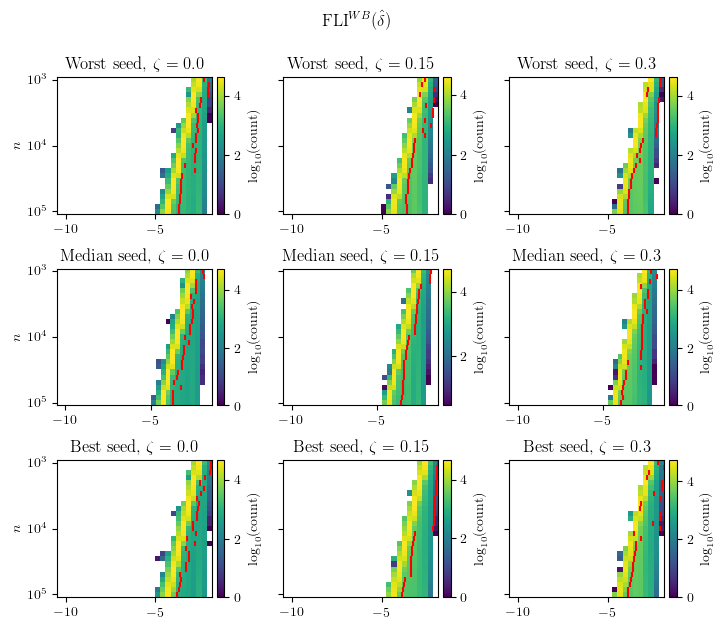

In [ ]:
for coord_label, latex_label, post_data_list, thresh_list in list(zip(
    ["x", "px", "y", "py", "delta", "zeta"],
    ["x", "p_x", "y", "p_y", "\\delta", "\\zeta"],
    [fli_x_post_data_list, fli_px_post_data_list, fli_y_post_data_list, fli_py_post_data_list, fli_delta_post_data_list, fli_zeta_post_data_list],
    [fli_x_thresh_list, fli_px_thresh_list, fli_y_thresh_list, fli_py_thresh_list, fli_delta_thresh_list, fli_zeta_thresh_list],
))[4:5]:
    fig = plt.figure(figsize=(8, 6.75))

    gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    axs = []
    axs.append(plt.subplot(gs[0, 0]))
    axs.append(plt.subplot(gs[0, 1]))
    axs.append(plt.subplot(gs[0, 2]))
    axs.append(plt.subplot(gs[1, 0]))
    axs.append(plt.subplot(gs[1, 1]))
    axs.append(plt.subplot(gs[1, 2]))
    axs.append(plt.subplot(gs[2, 0]))
    axs.append(plt.subplot(gs[2, 1]))
    axs.append(plt.subplot(gs[2, 2]))

    idx = 4
    mask = mask_list[idx]

    for an_i, (ax, idx, idx2, idx3) in enumerate(zip(axs, range(9), range(9), range(9))):

        post_data = post_data_list[idx][26:]
        thresholds = thresh_list[idx][26:]

        val_min, val_max = get_extents([l for l in post_data[::]], 10)
        print(val_min, val_max)

        val_min = -10.5
        val_max = -1.85

        tmp_data, bin_centers = compose_count_map([l[mask] for l in post_data], val_min, val_max, nbins=30, density=False)
        tmp_data = np.log10(tmp_data)
        # print(tmp_data.shape)
        # tmp_data = tmp_data[::13]

        cmap = ax.imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[26::])-0.5], interpolation='none')

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

        # plot the thresholds over the imshow
        for i, t in enumerate(thresholds):
            ax.plot([t, t], [(len(thresholds)-1-i)-0.5, (len(thresholds)-1-i)+0.5], '--', color='red')

        # set the y ticks at idx 0, 13, and 26, and set the labels as 10^3, 10^4, and 10^5
        ax.set_yticks([0, 13, 26])
        ax.set_yticklabels([f"$10^{{{int(np.log10(times[26:][0]))}}}$", f"$10^{{{int(np.log10(times[26:][13]))}}}$", f"$10^{{{int(np.log10(times[26:][26]))}}}$"][::-1])
        
        ax.set_ylabel("$n$")
        ax.set_title(f"{title_plot_list[idx]}")

        if an_i != 0 and an_i != 3 and an_i != 6:
            print(an_i)
            ax.set_yticklabels([])
            ax.set_ylabel('')


    # increase distance between subplots
    # increase distance between subplots
    plt.suptitle(f"$\\mathrm{{FLI}}^{{WB}}(\\hat{{{latex_label}}})$")
    plt.subplots_adjust(wspace=0.35)
    plt.subplots_adjust(hspace=0.40)

    plt.savefig(os.path.join(IMGDIR, f"evolution_fli_wb_{coord_label}.png"), bbox_inches="tight", dpi=300)

-10.704061853897937 -1.949819295308284
-9.370952309917987 -2.001740202629692
1
-10.125527995728051 -1.9286470950635966


/tmp/ipykernel_33073/2622149261.py:37: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


2
-10.12074886991091 -1.823276852983119
-10.103106608726424 -1.8488962152573805
4
-9.04050834450708 -1.6713448516355567
5
-10.839286266355579 -1.893311453065993
-9.975850904566283 -1.8913498003490317
7
-9.767104092014856 -1.8614303772225778
8
-9.659086006314613 -1.9509151555128728
-10.895322743954903 -2.0017410111295733
1
-10.28002815992426 -1.9284823515350118


/tmp/ipykernel_33073/2622149261.py:37: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


2
-10.419010857851834 -1.8232742095932177
-10.198143488375448 -1.8489177036759894
4
-10.079218720419302 -1.671337475492575
5
-9.564114365425601 -1.8933054430808482
-9.561922198710363 -1.8913503762479285
7
-9.808195387052315 -1.861465012355664
8
-10.941454411763504 -1.9579199630577508
-9.242049979116405 -2.001740914532676
1
-8.986863575953633 -1.9292547903119297
2
-9.691669497767315 -1.823240528830471
-9.626057420239295 -1.8497248896226606
4
-8.876074160434783 -1.6714845840158605
5
-11.89904415725042 -1.8932242577060203
-9.972146959566338 -1.8913872653477097
7
-10.16032753222241 -1.8606584925285279
8
-10.6725033667224 -1.9580539768385314
-9.393717676424036 -2.0017443527599132
1
-9.536554958370443 -1.9296277887337683
2
-10.426996324900907 -1.8232393426831528
-9.329911348822538 -1.8500026224693664
4
-10.035418968492227 -1.6713228134040508
5
-10.995121619607609 -1.893216939906535
-9.295954785417578 -1.8913835726290884
7
-9.781707241874654 -1.8607612098339452
8
-9.896528227621552 -1.9508153

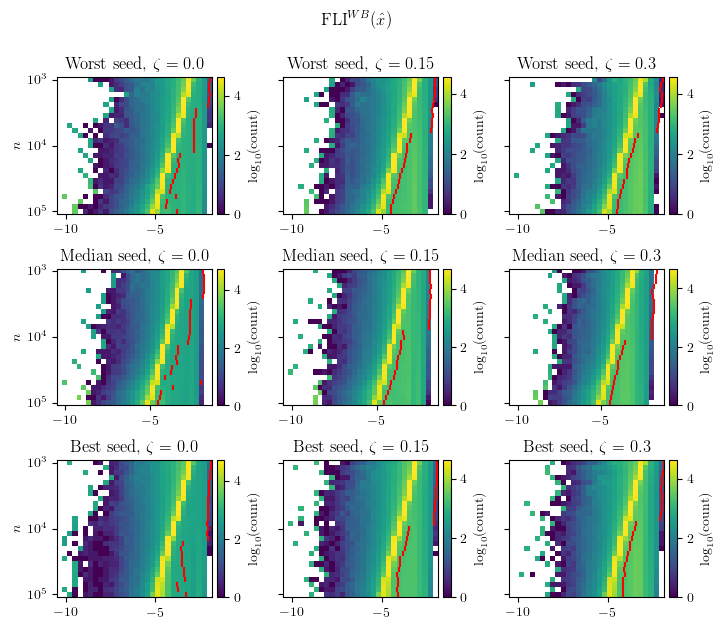

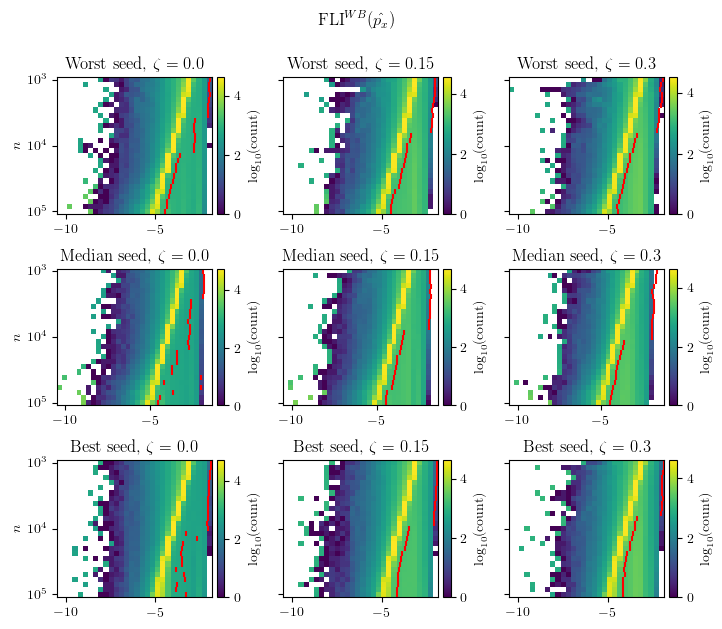

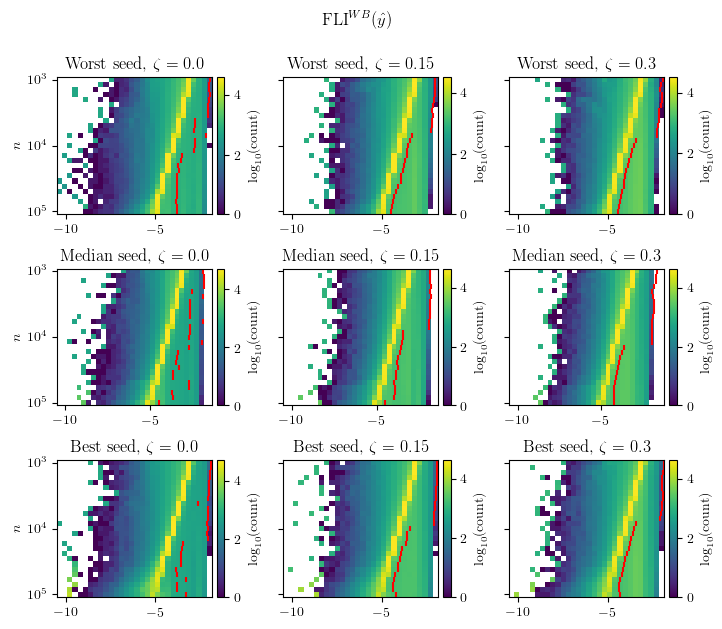

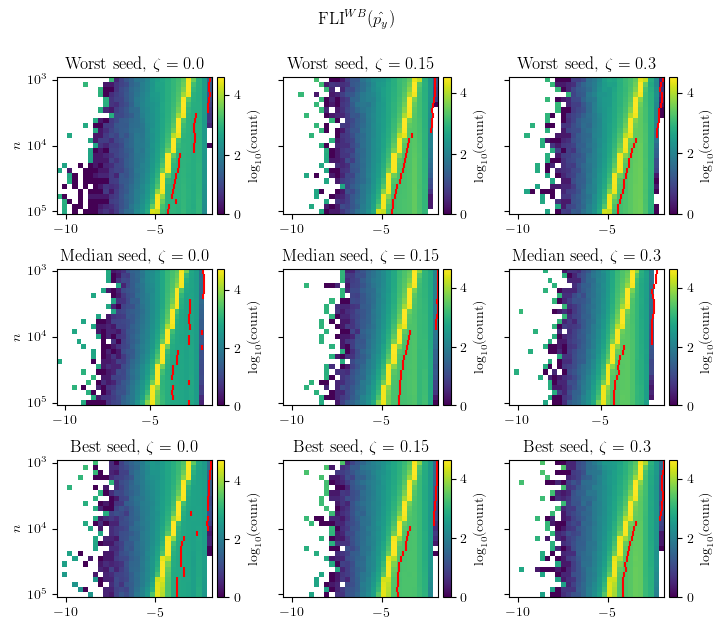

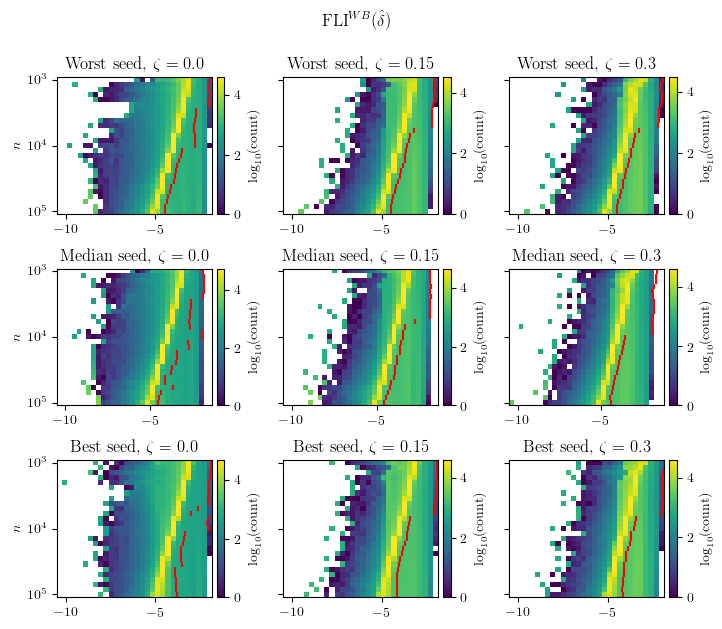

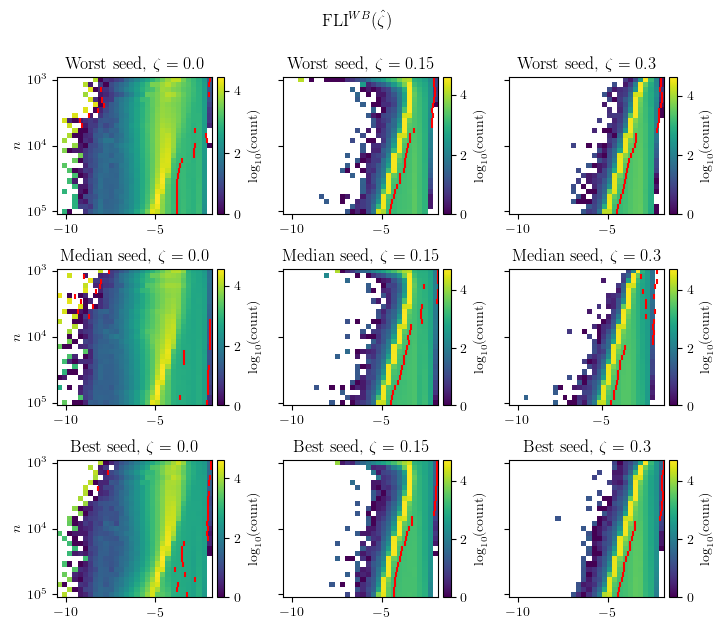

In [ ]:
for coord_label, latex_label, post_data_list, thresh_list in zip(
    ["x", "px", "y", "py", "delta", "zeta"],
    ["x", "p_x", "y", "p_y", "\\delta", "\\zeta"],
    [flibk_x_post_data_list, flibk_px_post_data_list, flibk_y_post_data_list, flibk_py_post_data_list, flibk_delta_post_data_list, flibk_zeta_post_data_list],
    [flibk_x_thresh_list, flibk_px_thresh_list, flibk_y_thresh_list, flibk_py_thresh_list, flibk_delta_thresh_list, flibk_zeta_thresh_list],
):
    fig = plt.figure(figsize=(8, 6.75))

    gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    axs = []
    axs.append(plt.subplot(gs[0, 0]))
    axs.append(plt.subplot(gs[0, 1]))
    axs.append(plt.subplot(gs[0, 2]))
    axs.append(plt.subplot(gs[1, 0]))
    axs.append(plt.subplot(gs[1, 1]))
    axs.append(plt.subplot(gs[1, 2]))
    axs.append(plt.subplot(gs[2, 0]))
    axs.append(plt.subplot(gs[2, 1]))
    axs.append(plt.subplot(gs[2, 2]))

    idx = 4
    mask = mask_list[idx]

    for an_i, (ax, idx, idx2, idx3) in enumerate(zip(axs, range(9), range(9), range(9))):

        post_data = post_data_list[idx][26:]
        thresholds = thresh_list[idx][26:]

        val_min, val_max = get_extents([l for l in post_data[::]], 10)
        print(val_min, val_max)

        val_min = -10.5
        val_max = -1.85

        tmp_data, bin_centers = compose_count_map([l[mask] for l in post_data], val_min, val_max, nbins=30, density=False)
        tmp_data = np.log10(tmp_data)
        # print(tmp_data.shape)
        # tmp_data = tmp_data[::13]

        cmap = ax.imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[26::])-0.5], interpolation='none')

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

        # plot the thresholds over the imshow
        for i, t in enumerate(thresholds):
            ax.plot([t, t], [(len(thresholds)-1-i)-0.5, (len(thresholds)-1-i)+0.5], '--', color='red')

        # set the y ticks at idx 0, 13, and 26, and set the labels as 10^3, 10^4, and 10^5
        ax.set_yticks([0, 13, 26])
        ax.set_yticklabels([f"$10^{{{int(np.log10(times[26:][0]))}}}$", f"$10^{{{int(np.log10(times[26:][13]))}}}$", f"$10^{{{int(np.log10(times[26:][26]))}}}$"][::-1])
        
        ax.set_ylabel("$n$")
        ax.set_title(f"{title_plot_list[idx]}")

        if an_i != 0 and an_i != 3 and an_i != 6:
            print(an_i)
            ax.set_yticklabels([])
            ax.set_ylabel('')


    # increase distance between subplots
    # increase distance between subplots
    plt.suptitle(f"$\\mathrm{{FLI}}^{{WB}}(\\hat{{{latex_label}}})$")
    plt.subplots_adjust(wspace=0.35)
    plt.subplots_adjust(hspace=0.40)

    plt.savefig(os.path.join(IMGDIR, f"evolution_fli_wb_{coord_label}.png"), bbox_inches="tight", dpi=300)

In [ ]:
rem_data_list = []
rem_post_data_list = []
rem_thresh_list = []
rem_guesses_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    rem_file = h5py.File(os.path.join(OUTDIR, f"rem_{lattice}_{zeta}.h5"), "r")

    data_list = []
    post_data_list = []
    thresh_list = []
    guesses_list = []
    for t in times:
        disp_x = rem_file[f"reverse/x/{t}"][:] - rem_file[f"reference/initial/x"][:]
        disp_px = rem_file[f"reverse/px/{t}"][:] - rem_file[f"reference/initial/px"][:]
        disp_y = rem_file[f"reverse/y/{t}"][:] - rem_file[f"reference/initial/y"][:]
        disp_py = rem_file[f"reverse/py/{t}"][:] - rem_file[f"reference/initial/py"][:]
        disp_zeta = rem_file[f"reverse/zeta/{t}"][:] - rem_file[f"reference/initial/zeta"][:]
        disp_delta = rem_file[f"reverse/delta/{t}"][:] - rem_file[f"reference/initial/delta"][:]

        disp = np.sqrt(disp_x**2 + disp_px**2 + disp_y**2 + disp_py**2 + disp_zeta**2 + disp_delta**2)
        
        data_list.append(disp)

        disp[~mask_list[i]] = np.nan
        if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
            disp[mask_list[i]] = 1e-14
            
        disp = np.log10(disp)
        disp[np.isinf(disp)] = np.nan
        disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmax(disp)

        post_data_list.append(disp)

        try:
            threshold = find_threshold_density(disp[mask_list[i]], where_chaos="higher")
        except:
            threshold = 1e-13
        thresh_list.append(threshold)

    rem_data_list.append(data_list)
    rem_post_data_list.append(post_data_list)
    rem_thresh_list.append(thresh_list)
    rem_guesses_list.append(guesses_list)


-13.600523080791362 -2.2813917195908346
-13.32363688440928 -2.2907229136786493
1


/tmp/ipykernel_124986/3126614847.py:30: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


-13.422738735687943 -1.3022042565827272
2
-13.536193310919163 -2.2518550229156404
-13.297015244525522 -2.253440955403419
4
-13.193413688876175 -1.0075819042124998
5
-13.384491508614058 -2.24630469804273
-13.398287929128387 -2.2514316383825492
7
-13.15770510463756 -1.10614291661533
8


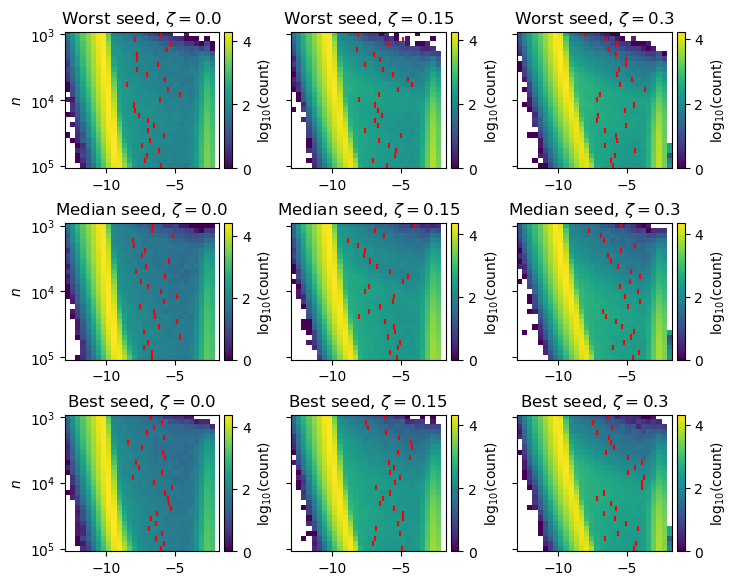

In [ ]:
fig = plt.figure(figsize=(8, 6.75))

gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 1]))
axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[1, 2]))
axs.append(plt.subplot(gs[2, 0]))
axs.append(plt.subplot(gs[2, 1]))
axs.append(plt.subplot(gs[2, 2]))

idx = 4
mask = mask_list[idx]

for an_i, (ax, idx, idx2, idx3) in enumerate(zip(axs, range(9), range(9), range(9))):

    post_data = rem_post_data_list[idx][26:]
    thresholds = rem_thresh_list[idx][26:]

    val_min, val_max = get_extents([l for l in post_data[::]], 10)
    print(val_min, val_max)
    val_min = -13
    val_max = -1.75

    tmp_data, bin_centers = compose_count_map([l[mask] for l in post_data], val_min, val_max, nbins=30, density=False)
    tmp_data = np.log10(tmp_data)
    # print(tmp_data.shape)
    # tmp_data = tmp_data[::13]

    cmap = ax.imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[26::])-0.5], interpolation='none')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

    # plot the thresholds over the imshow
    for i, t in enumerate(thresholds):
        ax.plot([t, t], [(len(thresholds)-1-i)-0.5, (len(thresholds)-1-i)+0.5], '--', color='red')

    # set the y ticks at idx 0, 13, and 26, and set the labels as 10^3, 10^4, and 10^5
    ax.set_yticks([0, 13, 26])
    ax.set_yticklabels([f"$10^{{{int(np.log10(times[26:][0]))}}}$", f"$10^{{{int(np.log10(times[26:][13]))}}}$", f"$10^{{{int(np.log10(times[26:][26]))}}}$"][::-1])
    ax.set_title(f"{title_plot_list[idx]}")
    
    ax.set_ylabel("$n$")
    # ax.set_title(title)

    if an_i != 0 and an_i != 3 and an_i != 6:
        print(an_i)
        ax.set_yticklabels([])
        ax.set_ylabel('')


# increase distance between subplots
# increase distance between subplots
plt.subplots_adjust(wspace=0.35)
plt.subplots_adjust(hspace=0.40)

plt.savefig(os.path.join(IMGDIR, f"evolution_rem.png"), bbox_inches="tight", dpi=300)

In [ ]:
tune_data_list = []
tune_post_data_list = []
tune_thresh_list = []
tune_guesses_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    tune_file = h5py.File(os.path.join(TUNEDIR, f"tune_birkhoff_full_{lattice}_{zeta}.h5"), "r")

    data_list = []
    post_data_list = []
    thresh_list = []
    guesses_list = []
    for t in times:
        tune_x_1 = 1 - (tune_file[f"tune/x/{0}/{t//2}"][:] / (np.pi*2))
        tune_x_2 = 1 - (tune_file[f"tune/x/{t//2}/{t//2*2}"][:] / (np.pi*2))
        tune_y_1 = 1 - (tune_file[f"tune/y/{0}/{t//2}"][:] / (np.pi*2))
        tune_y_2 = 1 - (tune_file[f"tune/y/{t//2}/{t//2*2}"][:] / (np.pi*2))
        disp_x = tune_x_1 - tune_x_2
        disp_y = tune_y_1 - tune_y_2

        disp = np.sqrt(disp_x**2 + disp_y**2)
        
        data_list.append(disp)

        disp[~mask_list[i]] = np.nan
        if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
            disp[mask_list[i]] = 1e-14
            
        disp = np.log10(disp)
        disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmax(disp)
        disp[np.isinf(disp)] = np.nan
        disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmin(disp)

        post_data_list.append(disp)

        try:
            threshold = find_threshold_smart_v2(disp[mask_list[i]], where_chaos="higher")
        except:
            threshold = 1e-13
        thresh_list.append(threshold)

    tune_data_list.append(data_list)
    tune_post_data_list.append(post_data_list)
    tune_thresh_list.append(thresh_list)
    tune_guesses_list.append(guesses_list)


/tmp/ipykernel_33073/675978217.py:29: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_33073/675978217.py:29: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_33073/675978217.py:29: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_33073/675978217.py:29: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_33073/675978217.py:29: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_33073/675978217.py:29: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_33073/675978217.py:29: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_33073/675978217.py:29: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_33073/675978217.py:29: RuntimeWarning: divide by zero encountered in log1

-11.109659742949757 -0.01187910526236159
-14.372711008200026 -0.011890102600423462
1


/tmp/ipykernel_124986/430307796.py:30: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


-9.826525522780305 -0.011923756260709933
2
-15.32695351763935 -0.009532944563377811
-15.105104768022994 -0.009735229453051839
4
-14.19658665499798 -0.006508319449315744
5
-15.32695351763935 -0.00960963898363441
-15.804074772359012 -0.009662619208540398
7
-15.804074772359012 -0.009755726658672945
8


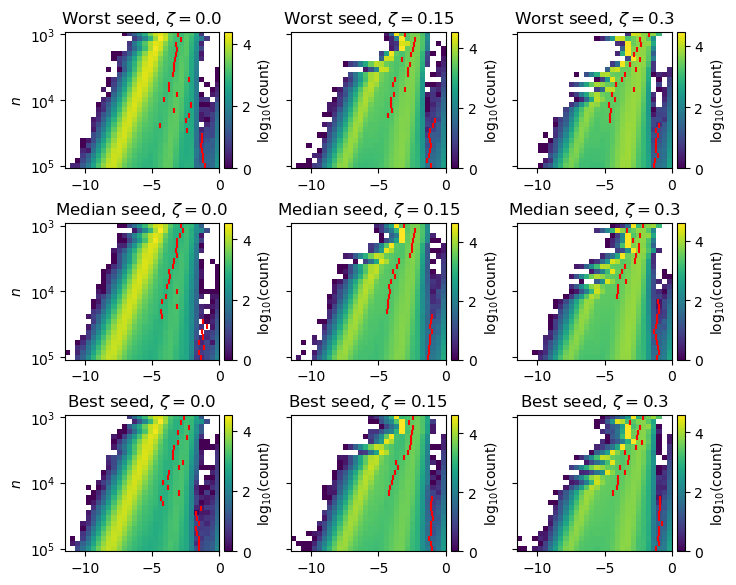

In [ ]:
fig = plt.figure(figsize=(8, 6.75))

gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 1]))
axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[1, 2]))
axs.append(plt.subplot(gs[2, 0]))
axs.append(plt.subplot(gs[2, 1]))
axs.append(plt.subplot(gs[2, 2]))

idx = 4
mask = mask_list[idx]

for an_i, (ax, idx, idx2, idx3) in enumerate(zip(axs, range(9), range(9), range(9))):

    post_data = tune_post_data_list[idx][26:]
    thresholds = tune_thresh_list[idx][26:]

    val_min, val_max = get_extents([l for l in post_data[::]], 10)
    print(val_min, val_max)
    val_min = -11.5
    val_max = 0.0

    tmp_data, bin_centers = compose_count_map([l[mask] for l in post_data], val_min, val_max, nbins=30, density=False)
    tmp_data = np.log10(tmp_data)
    # print(tmp_data.shape)
    # tmp_data = tmp_data[::13]

    cmap = ax.imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[26::])-0.5], interpolation='none')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

    # plot the thresholds over the imshow
    for i, t in enumerate(thresholds):
        ax.plot([t, t], [(len(thresholds)-1-i)-0.5, (len(thresholds)-1-i)+0.5], '--', color='red')

    # set the y ticks at idx 0, 13, and 26, and set the labels as 10^3, 10^4, and 10^5
    ax.set_yticks([0, 13, 26])
    ax.set_yticklabels([f"$10^{{{int(np.log10(times[26:][0]))}}}$", f"$10^{{{int(np.log10(times[26:][13]))}}}$", f"$10^{{{int(np.log10(times[26:][26]))}}}$"][::-1])
    

    ax.set_ylabel("$n$")
    ax.set_title(f"{title_plot_list[idx]}")

    if an_i != 0 and an_i != 3 and an_i != 6:
        print(an_i)
        ax.set_yticklabels([])
        ax.set_ylabel('')


# increase distance between subplots
# increase distance between subplots
plt.subplots_adjust(wspace=0.35)
plt.subplots_adjust(hspace=0.40)

plt.savefig(os.path.join(IMGDIR, f"evolution_tune.png"), bbox_inches="tight", dpi=300)

In [ ]:
import pickle

with open("gali_files/gali_six.pkl", 'rb') as f:
    gali_6_data_list, gali_6_post_data_list, gali_6_thresh_list, gali_6_guesses_list, gali_6_scores_list = pickle.load(f)

-37.36405243555016 -1.4136046970103326


/tmp/ipykernel_124986/2122400655.py:28: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


-37.51840521567655 -1.4426282045334826
1
-39.378585349591994 -2.2627295875092774
2
-37.50635037201746 -1.476084869106459
-39.56355358499837 -1.745607824879679
4
-40.48305572007269 -2.462228238590476
5
-37.43138041361405 -1.5362938173773721
-38.518353926915324 -2.1845801826732476
7
-37.644703281435284 -2.137740741342863
8


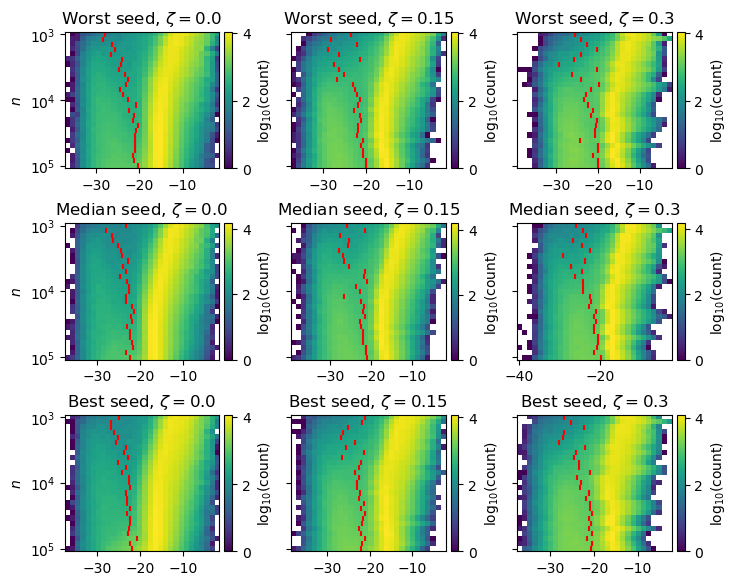

In [ ]:
fig = plt.figure(figsize=(8, 6.75))

gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 1]))
axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[1, 2]))
axs.append(plt.subplot(gs[2, 0]))
axs.append(plt.subplot(gs[2, 1]))
axs.append(plt.subplot(gs[2, 2]))

idx = 4
mask = mask_list[idx]

for an_i, (ax, idx, idx2, idx3) in enumerate(zip(axs, range(9), range(9), range(9))):

    post_data = gali_6_post_data_list[idx][26:]
    thresholds = gali_6_thresh_list[idx][26:]

    val_min, val_max = get_extents([l for l in post_data[::]], 10)
    print(val_min, val_max)

    tmp_data, bin_centers = compose_count_map([l[mask] for l in post_data], val_min, val_max, nbins=30, density=False)
    tmp_data = np.log10(tmp_data)
    # print(tmp_data.shape)
    # tmp_data = tmp_data[::13]

    cmap = ax.imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[26::])-0.5], interpolation='none')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

    # plot the thresholds over the imshow
    for i, t in enumerate(thresholds):
        ax.plot([t, t], [(len(thresholds)-1-i)-0.5, (len(thresholds)-1-i)+0.5], '--', color='red')

    # set the y ticks at idx 0, 13, and 26, and set the labels as 10^3, 10^4, and 10^5
    ax.set_yticks([0, 13, 26])
    ax.set_yticklabels([f"$10^{{{int(np.log10(times[26:][0]))}}}$", f"$10^{{{int(np.log10(times[26:][13]))}}}$", f"$10^{{{int(np.log10(times[26:][26]))}}}$"][::-1])
    

    ax.set_ylabel("$n$")
    ax.set_title(f"{title_plot_list[idx]}")

    if an_i != 0 and an_i != 3 and an_i != 6:
        print(an_i)
        ax.set_yticklabels([])
        ax.set_ylabel('')


# increase distance between subplots
# increase distance between subplots
plt.subplots_adjust(wspace=0.35)
plt.subplots_adjust(hspace=0.40)


plt.savefig(os.path.join(IMGDIR, f"evolution_gali_6.png"), bbox_inches="tight", dpi=300)

In [ ]:
variables = ["x", "px", "y", "py", "zeta", "delta"]
latex_variables = ["x", "p_x", "y", "p_y", "\\zeta", "\\delta"]
gali_2_combo = list(itertools.combinations(variables, 2))
gali_4_combo = list(itertools.combinations(variables, 4))
print(len(gali_2_combo), len(gali_4_combo))

gali_2_latex = list(itertools.combinations(latex_variables, 2))
gali_4_latex = list(itertools.combinations(latex_variables, 4))

15 15


gali_x_px.pkl
Loaded
-11.68529958689921 -0.0003571234831431334


/tmp/ipykernel_124986/999768061.py:64: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


-11.295946734981337 -0.001240372517518798
1
-12.421352166985123 -0.007652133666125414
2
-12.471667029875139 -0.0017173081484718534
-12.311268201909899 -0.0009404276858150061
4
-13.178586620251568 -0.006401996025511413
5
-12.279425054076912 -0.002653159835261517
-12.043938473069355 -0.0027684950500150626
7
-11.786255752567966 -0.005177345501119072
8
gali_x_y.pkl
Loaded
-11.143930603651828 -0.05838057337875466
-11.694285356535099 -0.0420513539321009
1
-11.797247204332287 -0.0593989634618643
2
-12.415744015696722 -0.05433912863402575
-12.544835366280118 -0.08276135609759895
4
-12.116714712085034 -0.09824336131484274
5
-11.574659758138734 -0.006028022624971447
-12.94238387246517 -0.020770859252304128
7
-12.100874092064565 -0.07191606274433528
8
gali_x_py.pkl
Loaded
-10.721463123344751 -0.0007519275496517104
-11.23398751664068 -0.0015143053170498032
1
-10.548399654053899 -0.0020425140463920114
2
-11.827982929346671 -0.0012948357876118363
-11.142126270480857 -0.0012964377090883342
4
-11.0733

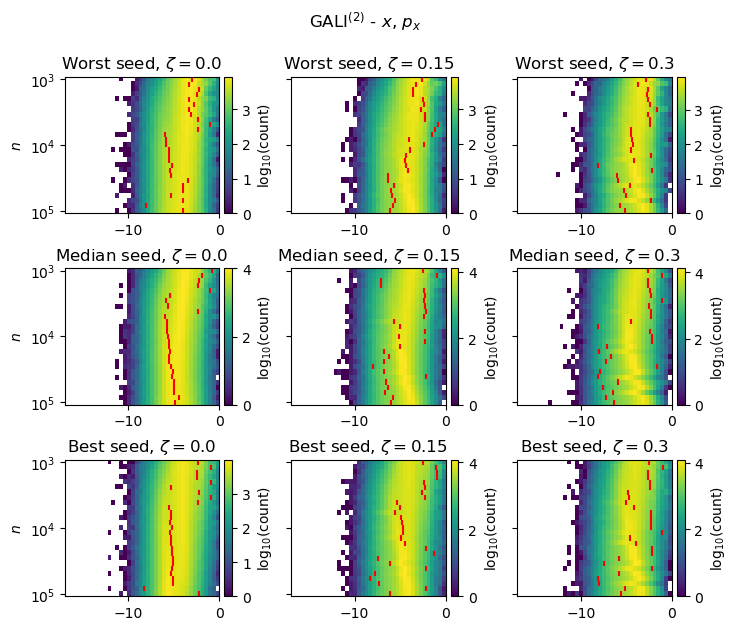

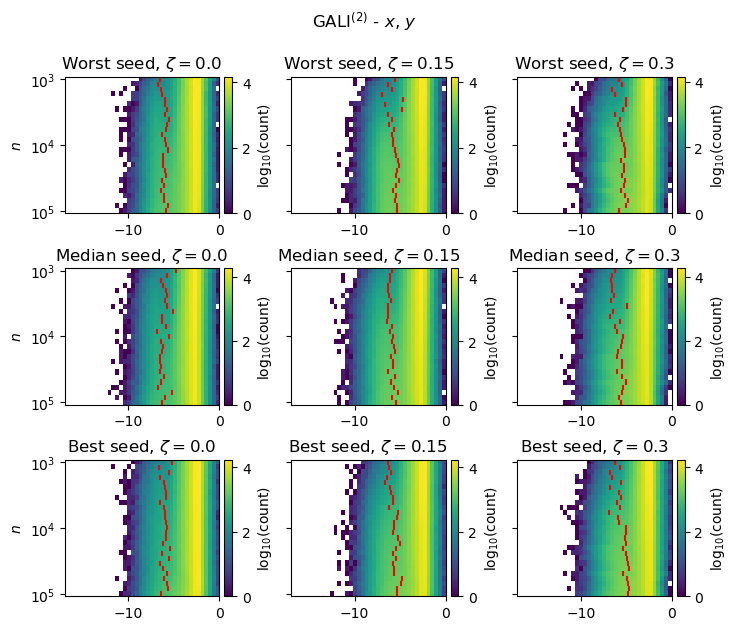

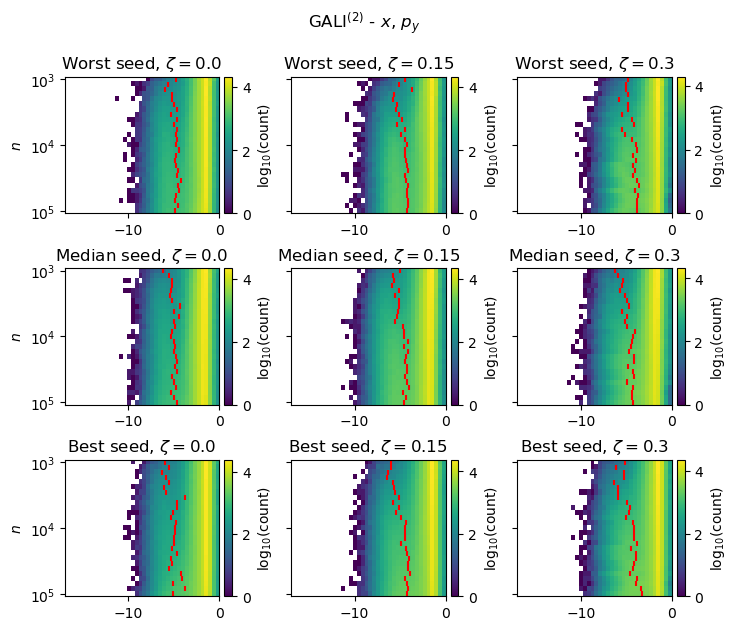

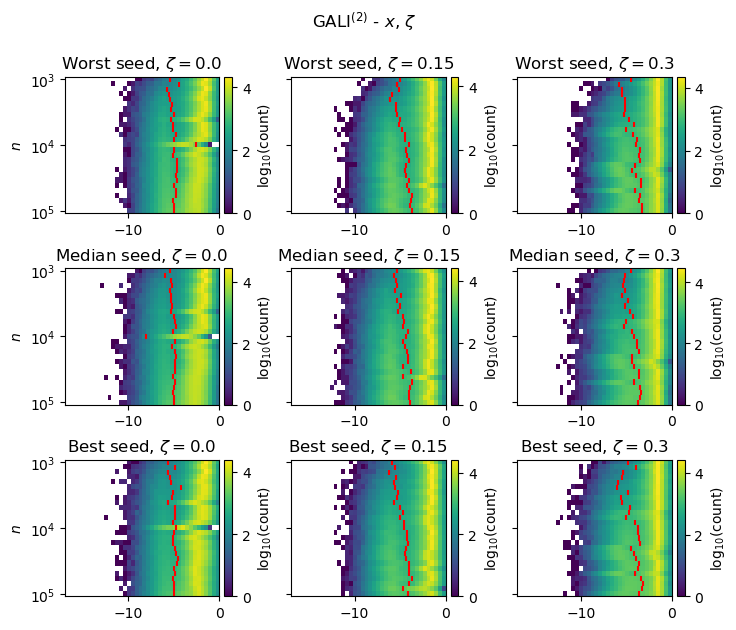

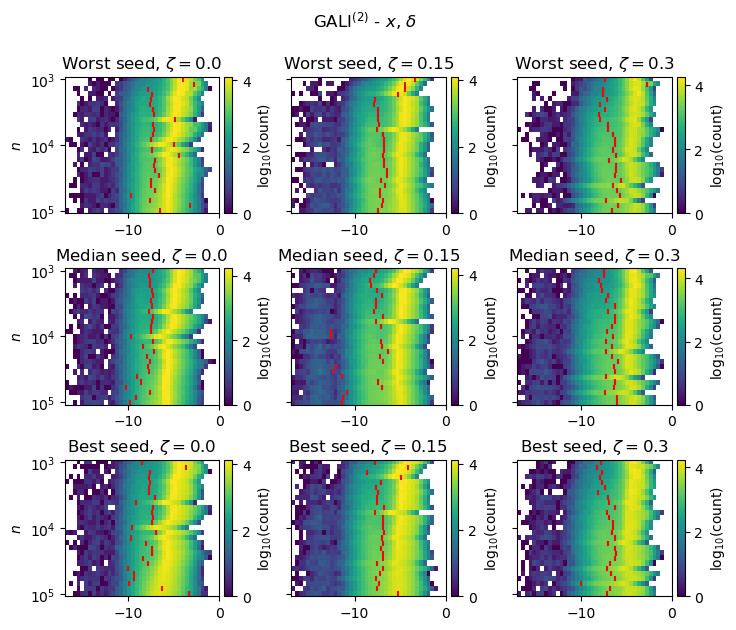

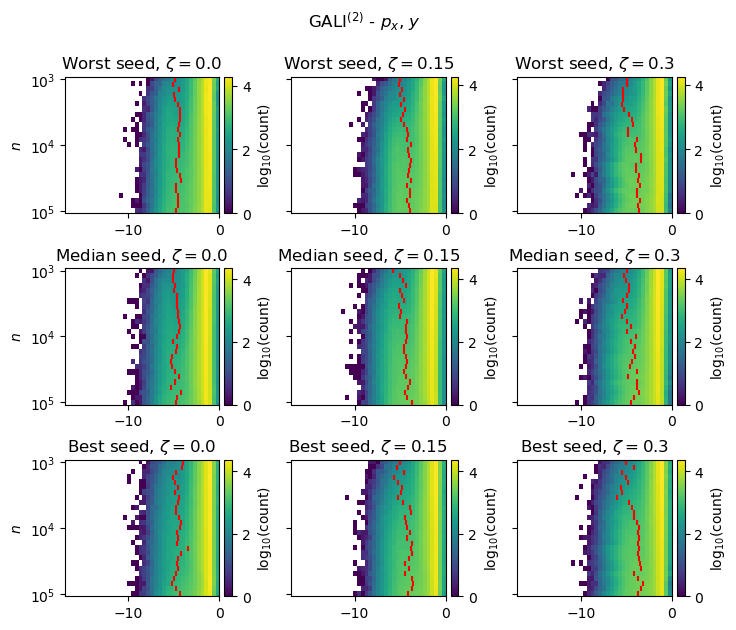

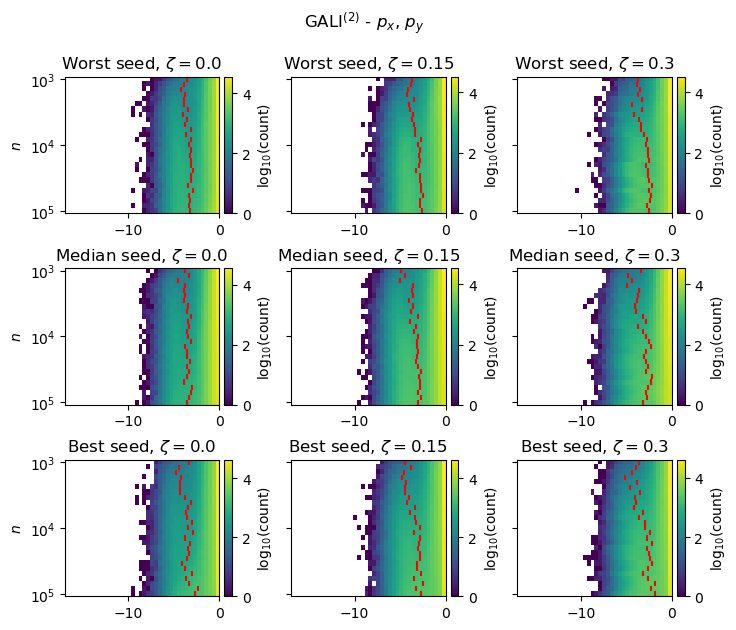

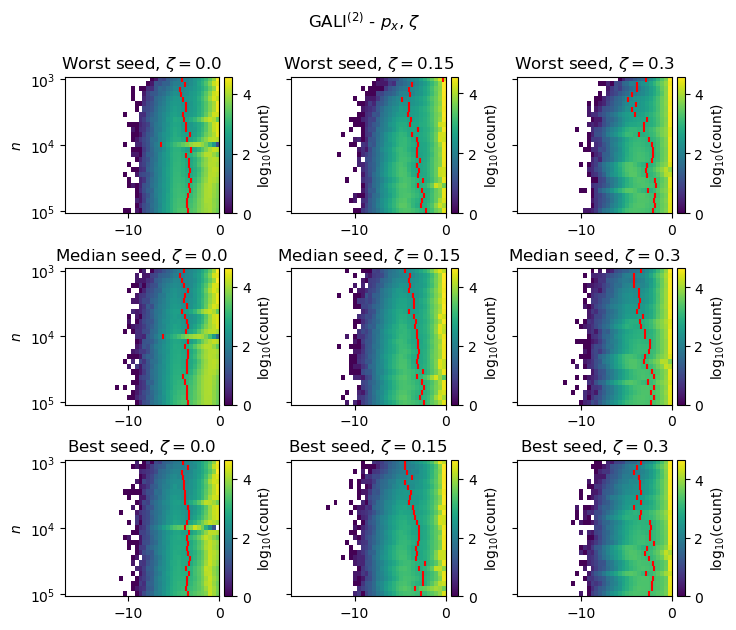

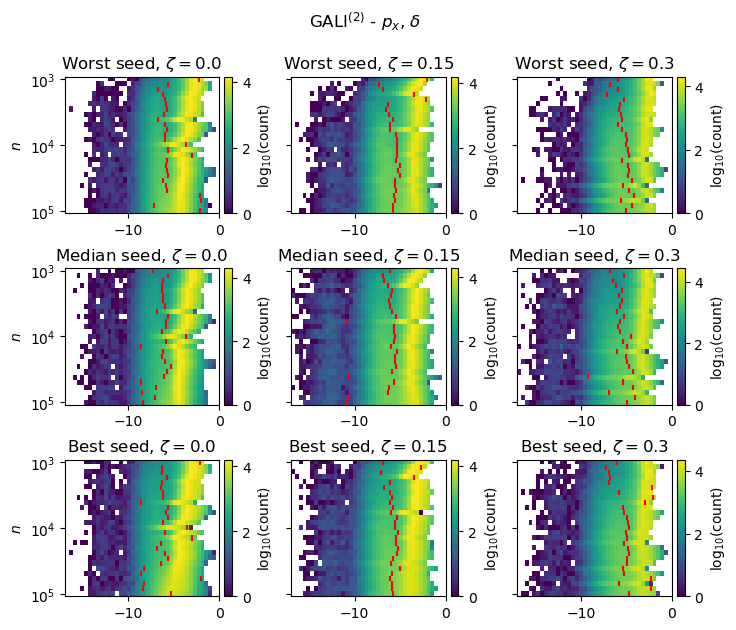

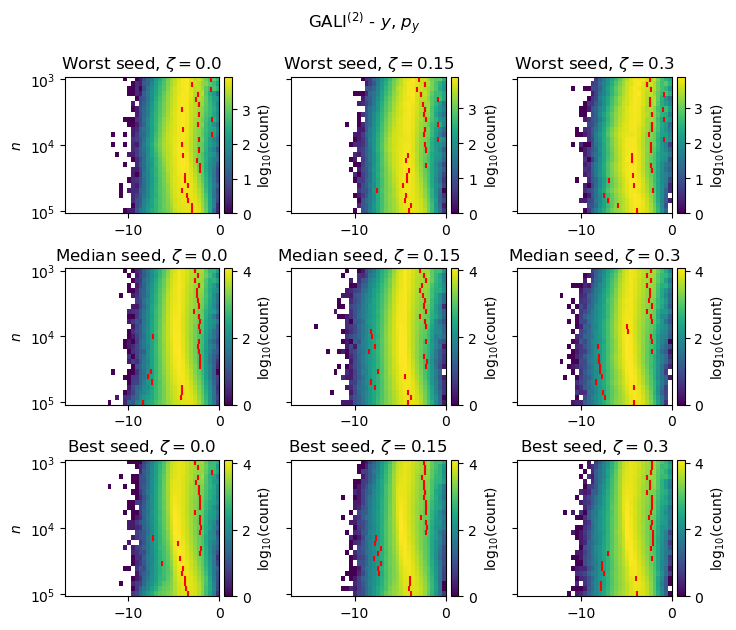

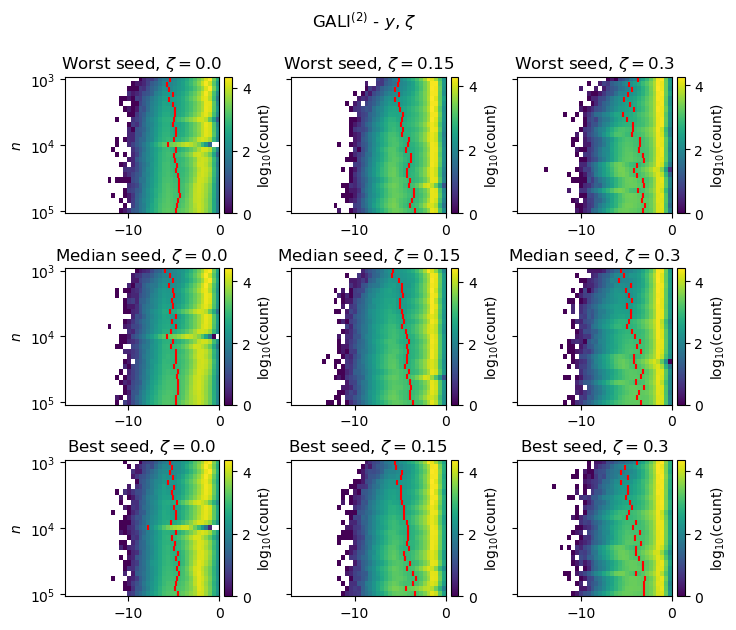

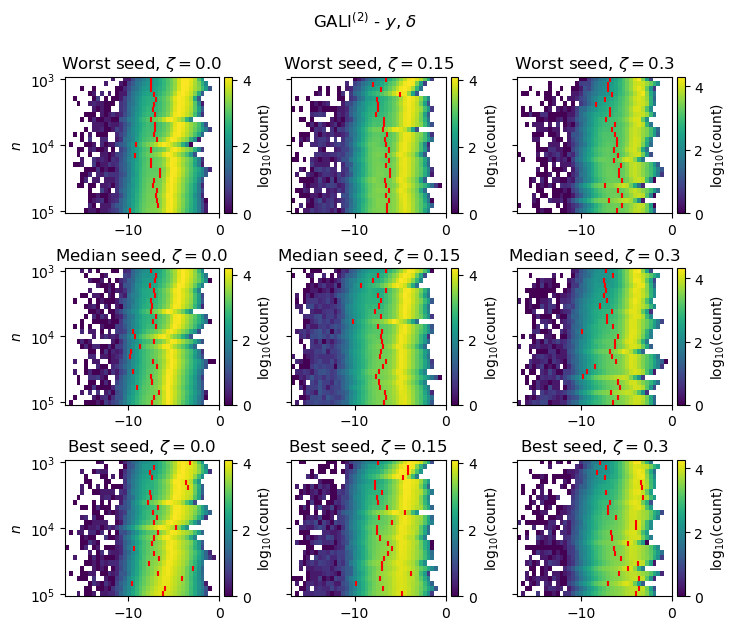

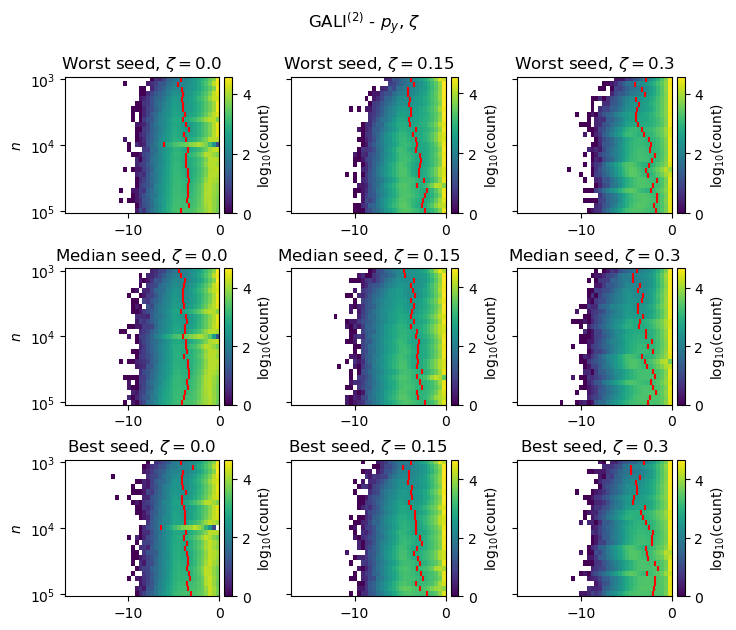

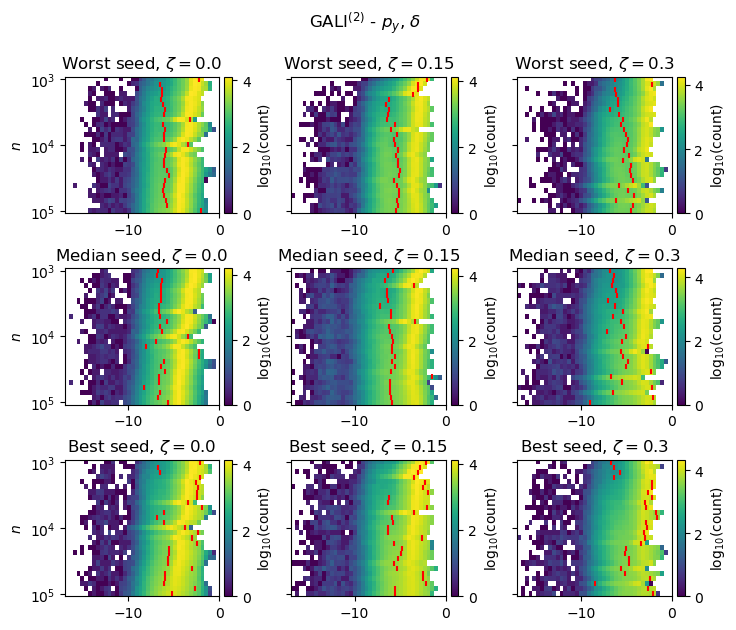

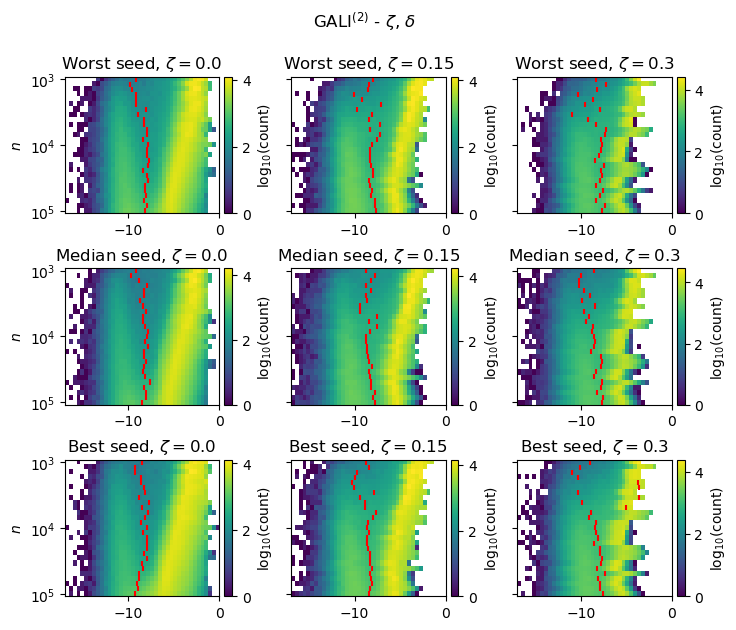

In [ ]:
import pickle

gali_combos = gali_2_combo 
latex_combos = gali_2_latex 

# vmin = np.infty
# vmax = -np.infty
# for i, (combo, latex) in enumerate(zip(gali_combos, latex_combos)):
#     filename = "gali_"
#     for s in combo:
#         filename += s
#         filename += "_"
#     filename = filename[:-1] + ".pkl"
#     print(filename)
#     with open("gali_files/" + filename, 'rb') as f:
#         gali_post_data_list = pickle.load(f)[1]

#     vmin = np.nanmin([vmin, np.nanmin(gali_post_data_list[idx][-1])])
#     vmax = np.nanmax([vmax, np.nanmax(gali_post_data_list[idx][-1])])

# print(vmin, vmax)
# vmin = -10

for q, (combo, latex) in enumerate(zip(gali_combos, latex_combos)):
    filename = "gali_"
    for s in combo:
        filename += s
        filename += "_"
    filename = filename[:-1] + ".pkl"
    print(filename)
    with open("gali_files/" + filename, 'rb') as f:
        gali_post_data_list, gali_thresh_list = pickle.load(f)[1:3]
    print("Loaded")

    fig = plt.figure(figsize=(8, 6.75))

    gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    axs = []
    axs.append(plt.subplot(gs[0, 0]))
    axs.append(plt.subplot(gs[0, 1]))
    axs.append(plt.subplot(gs[0, 2]))
    axs.append(plt.subplot(gs[1, 0]))
    axs.append(plt.subplot(gs[1, 1]))
    axs.append(plt.subplot(gs[1, 2]))
    axs.append(plt.subplot(gs[2, 0]))
    axs.append(plt.subplot(gs[2, 1]))
    axs.append(plt.subplot(gs[2, 2]))

    idx = 4
    mask = mask_list[idx]

    for an_i, (ax, idx, idx2, idx3) in enumerate(zip(axs, range(9), range(9), range(9))):

        post_data = gali_post_data_list[idx][26:]
        thresholds = gali_thresh_list[idx][26:]

        val_min, val_max = get_extents([l for l in post_data[::]], 10)
        print(val_min, val_max)
        val_min = -17.0
        val_max = 0.0

        tmp_data, bin_centers = compose_count_map([l[mask] for l in post_data], val_min, val_max, nbins=40, density=False)
        tmp_data = np.log10(tmp_data)
        # print(tmp_data.shape)
        # tmp_data = tmp_data[::13]

        cmap = ax.imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[26::])-0.5], interpolation='none')

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

        # plot the thresholds over the imshow
        for i, t in enumerate(thresholds):
            ax.plot([t, t], [(len(thresholds)-1-i)-0.5, (len(thresholds)-1-i)+0.5], '--', color='red')

        # set the y ticks at idx 0, 13, and 26, and set the labels as 10^3, 10^4, and 10^5
        ax.set_yticks([0, 13, 26])
        ax.set_yticklabels([f"$10^{{{int(np.log10(times[26:][0]))}}}$", f"$10^{{{int(np.log10(times[26:][13]))}}}$", f"$10^{{{int(np.log10(times[26:][26]))}}}$"][::-1])
        

        ax.set_ylabel("$n$")
        ax.set_title(f"{title_plot_list[idx]}")

        if an_i != 0 and an_i != 3 and an_i != 6:
            print(an_i)
            ax.set_yticklabels([])
            ax.set_ylabel('')


    # increase distance between subplots
    # increase distance between subplots
    plt.suptitle(f"$\\mathrm{{GALI}}^{{(2)}}$ - ${latex[0]}$, ${latex[1]}$")
    plt.subplots_adjust(wspace=0.35)
    plt.subplots_adjust(hspace=0.40)

    plt.savefig(os.path.join(IMGDIR, f"evolution_gali_{2}_{'-'.join([str(x) for x in combo])}.png"), bbox_inches="tight", dpi=300)
    

gali_x_px_y_py.pkl
Loaded
-23.392805950937337 -0.17564232545325667
-24.51704596584029 -0.08626350909141246
1
-23.51201957284058 -0.29904826442526294
2


/tmp/ipykernel_124986/2614922272.py:62: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


-24.24155585347042 -0.06062316991280098
-24.277449722162412 -0.13241025669187453
4
-23.639660550070623 -0.11918345664308191
5
-23.287318366739886 -0.14724222773216036
-24.0069887175343 -0.20068921781757257
7
-23.996865626056874 -0.27414094122228894
8
gali_x_px_y_zeta.pkl
Loaded
-23.46238922303422 -0.13348217569403778
-23.995993004856594 -0.05043941767342658
1
-22.93488913068691 -0.302185207243198
2
-23.633457595867142 -0.1104951790586203
-25.83888142887925 -0.1016950362585771
4
-24.33280924909816 -0.463274425505227
5
-23.206134645713497 -0.10070123709836777
-23.99125236217577 -0.13348685407975347
7
-23.33303027245662 -0.0903562836865251
8
gali_x_px_y_delta.pkl
Loaded
-26.954352108084738 -1.43890187319852
-31.516998195897713 -1.539404870410435
1
-29.780608152948684 -1.7033833302511883
2
-30.668609456303646 -1.4431060051435884
-31.94631402095058 -1.798301684323902
4
-31.283008534608143 -1.2862375710161285
5
-25.581980679507726 -1.347558620459149
-30.16618682829772 -1.5225622923071076
7
-

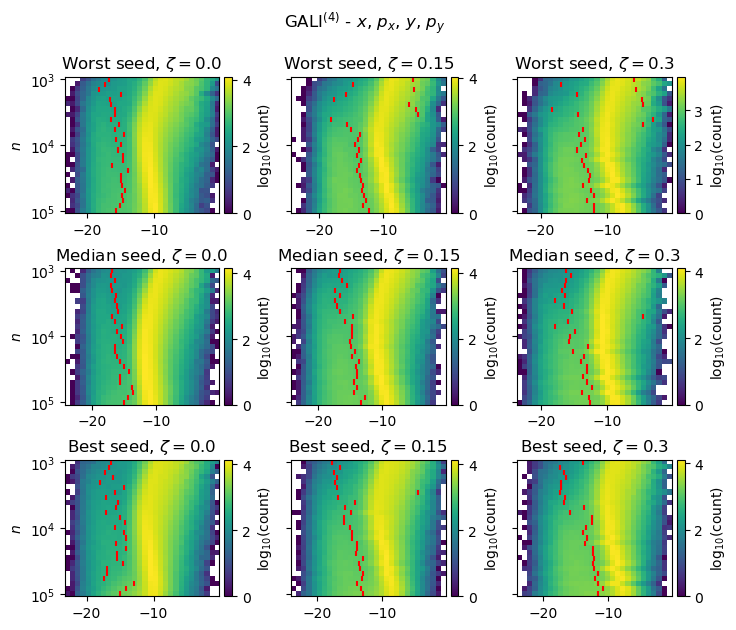

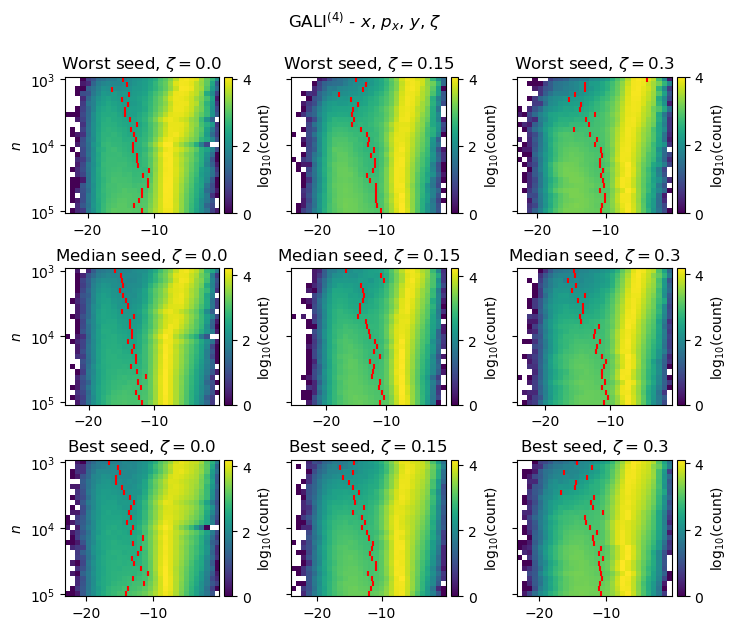

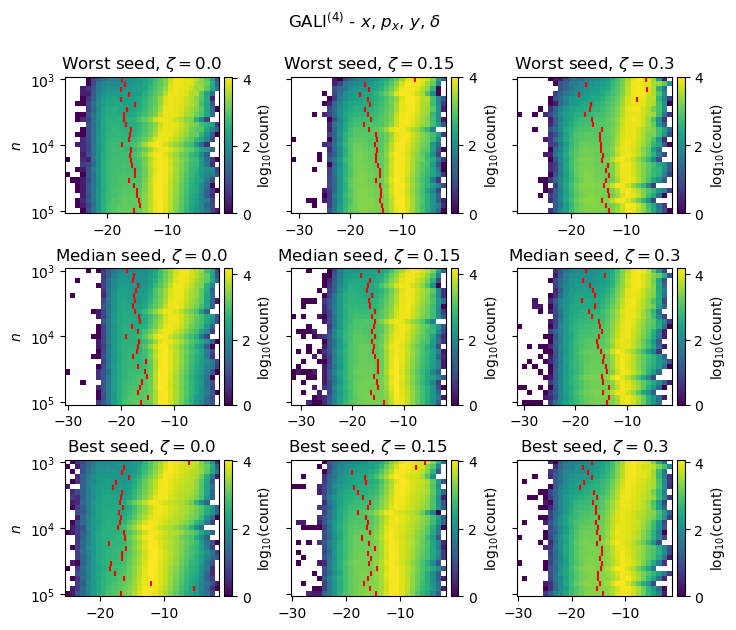

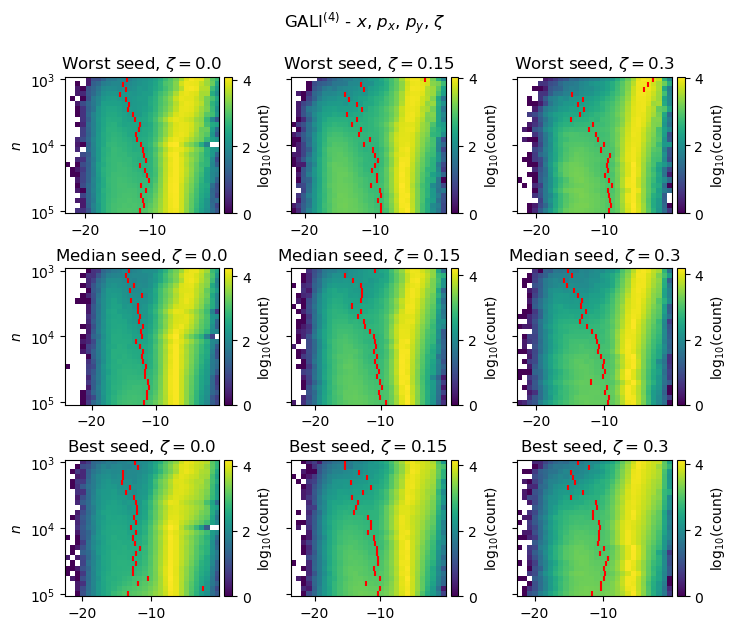

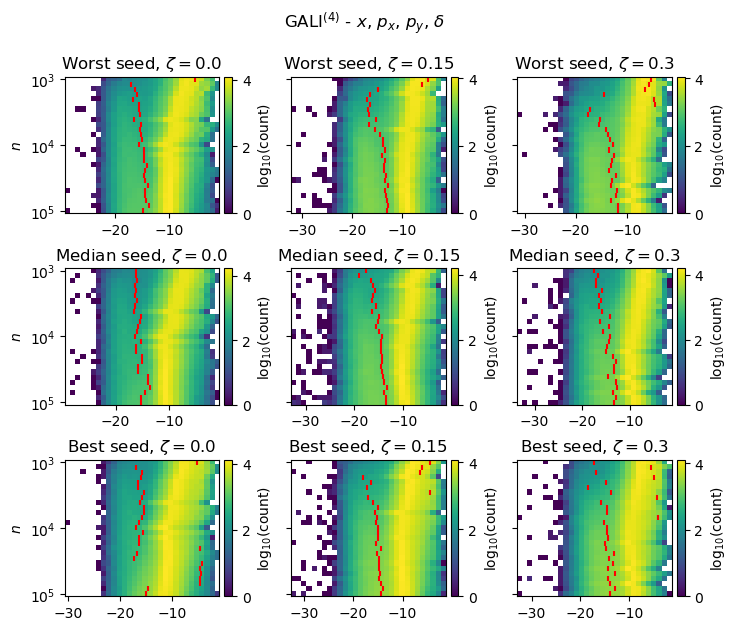

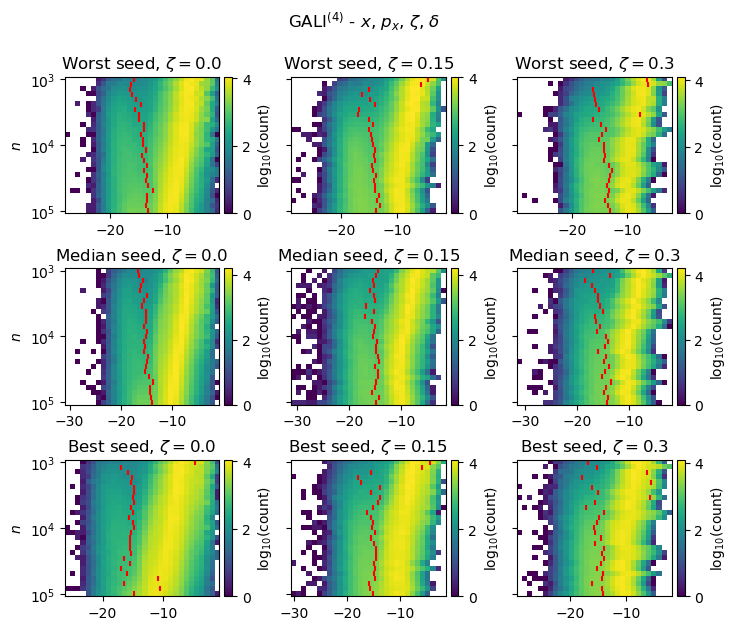

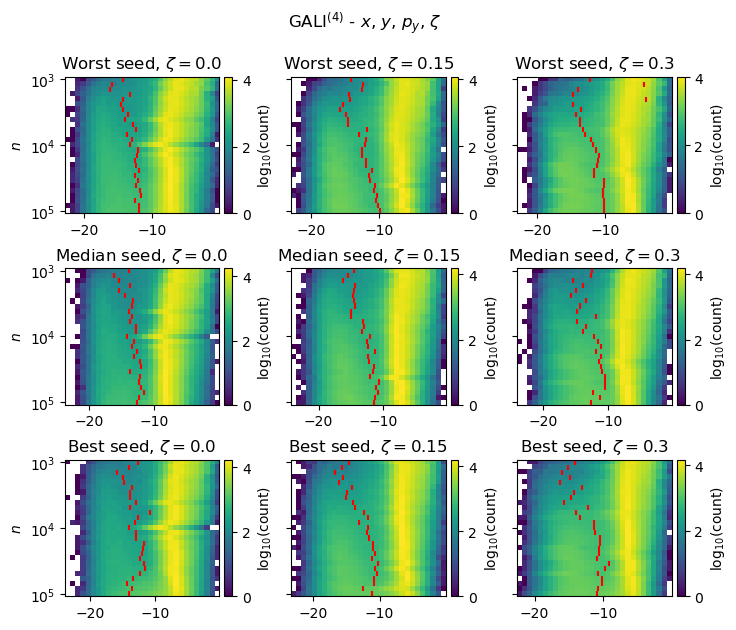

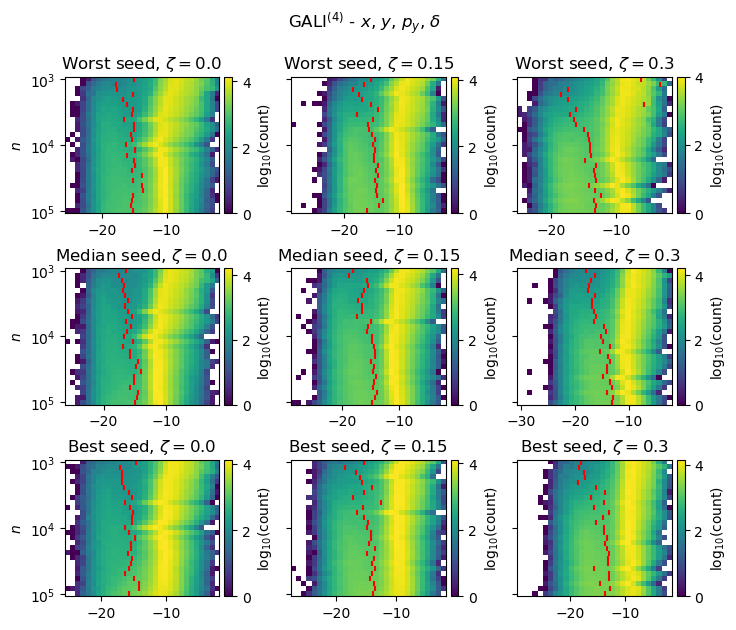

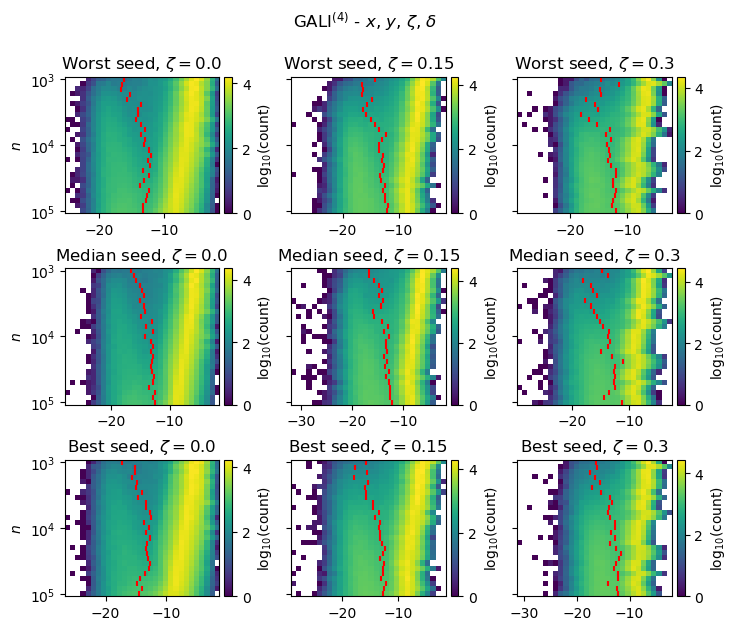

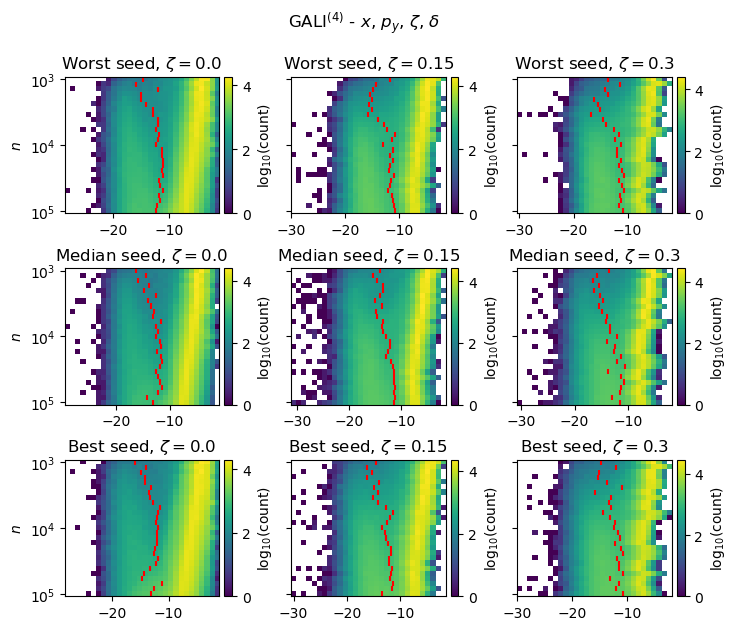

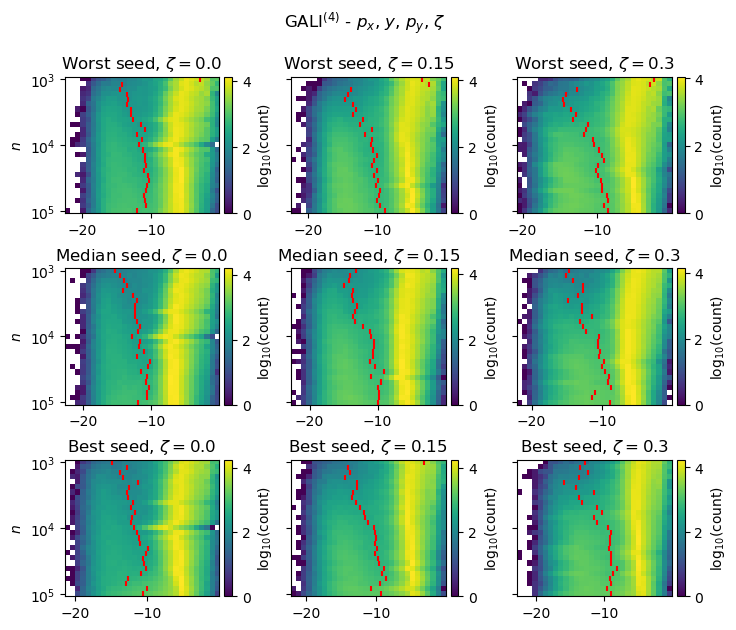

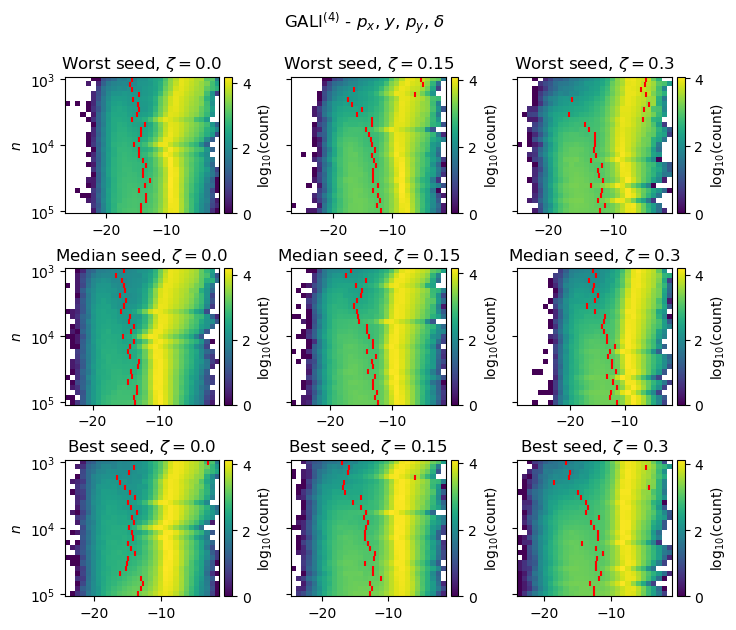

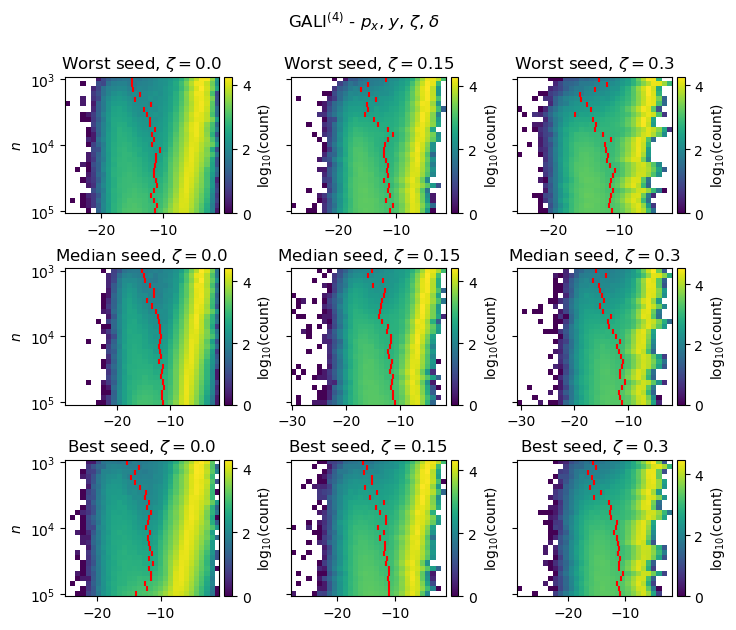

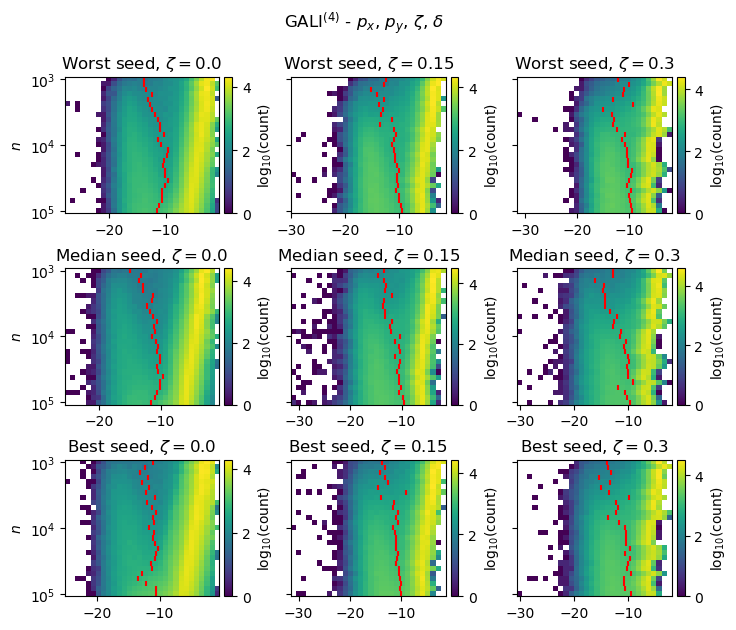

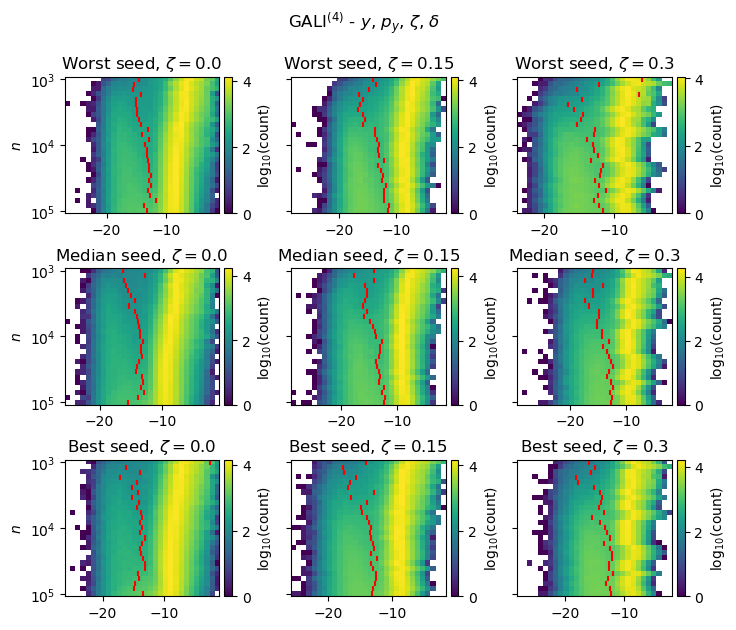

In [ ]:
import pickle

gali_combos = gali_4_combo 
latex_combos = gali_4_latex 

# vmin = np.infty
# vmax = -np.infty
# for i, (combo, latex) in enumerate(zip(gali_combos, latex_combos)):
#     filename = "gali_"
#     for s in combo:
#         filename += s
#         filename += "_"
#     filename = filename[:-1] + ".pkl"
#     print(filename)
#     with open("gali_files/" + filename, 'rb') as f:
#         gali_post_data_list = pickle.load(f)[1]

#     vmin = np.nanmin([vmin, np.nanmin(gali_post_data_list[idx][-1])])
#     vmax = np.nanmax([vmax, np.nanmax(gali_post_data_list[idx][-1])])

# print(vmin, vmax)
# vmin = -10

for q, (combo, latex) in enumerate(zip(gali_combos, latex_combos)):
    filename = "gali_"
    for s in combo:
        filename += s
        filename += "_"
    filename = filename[:-1] + ".pkl"
    print(filename)
    with open("gali_files/" + filename, 'rb') as f:
        gali_post_data_list, gali_thresh_list = pickle.load(f)[1:3]
    print("Loaded")

    fig = plt.figure(figsize=(8, 6.75))

    gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    axs = []
    axs.append(plt.subplot(gs[0, 0]))
    axs.append(plt.subplot(gs[0, 1]))
    axs.append(plt.subplot(gs[0, 2]))
    axs.append(plt.subplot(gs[1, 0]))
    axs.append(plt.subplot(gs[1, 1]))
    axs.append(plt.subplot(gs[1, 2]))
    axs.append(plt.subplot(gs[2, 0]))
    axs.append(plt.subplot(gs[2, 1]))
    axs.append(plt.subplot(gs[2, 2]))

    idx = 4
    mask = mask_list[idx]

    for an_i, (ax, idx, idx2, idx3) in enumerate(zip(axs, range(9), range(9), range(9))):

        post_data = gali_post_data_list[idx][26:]
        thresholds = gali_thresh_list[idx][26:]

        val_min, val_max = get_extents([l for l in post_data[::]], 10)
        print(val_min, val_max)

        tmp_data, bin_centers = compose_count_map([l[mask] for l in post_data], val_min, val_max, nbins=30, density=False)
        tmp_data = np.log10(tmp_data)
        # print(tmp_data.shape)
        # tmp_data = tmp_data[::13]

        cmap = ax.imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[26::])-0.5], interpolation='none')

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

        # plot the thresholds over the imshow
        for i, t in enumerate(thresholds):
            ax.plot([t, t], [(len(thresholds)-1-i)-0.5, (len(thresholds)-1-i)+0.5], '--', color='red')

        # set the y ticks at idx 0, 13, and 26, and set the labels as 10^3, 10^4, and 10^5
        ax.set_yticks([0, 13, 26])
        ax.set_yticklabels([f"$10^{{{int(np.log10(times[26:][0]))}}}$", f"$10^{{{int(np.log10(times[26:][13]))}}}$", f"$10^{{{int(np.log10(times[26:][26]))}}}$"][::-1])
        
        ax.set_ylabel("$n$")
        ax.set_title(f"{title_plot_list[idx]}")

        if an_i != 0 and an_i != 3 and an_i != 6:
            print(an_i)
            ax.set_yticklabels([])
            ax.set_ylabel('')


    # increase distance between subplots
    # increase distance between subplots
    plt.suptitle(f"$\\mathrm{{GALI}}^{{(4)}}$ - ${latex[0]}$, ${latex[1]}$, ${latex[2]}$, ${latex[3]}$")
    plt.subplots_adjust(wspace=0.35)
    plt.subplots_adjust(hspace=0.40)

    plt.savefig(os.path.join(IMGDIR, f"evolution_gali_{4}_{'-'.join([str(x) for x in combo])}.png"), bbox_inches="tight", dpi=300)
    

In [ ]:
tune_data_list = []
tune_post_data_list = []
tune_thresh_list = []
tune_guesses_list = []

for i, ((lattice, extent), zeta) in enumerate(itertools.product(zip(lattice_list, extent_list), zeta_list)):
    tune_file = h5py.File(os.path.join(TUNEDIR, f"tune_birkhoff_full_{lattice}_{zeta}.h5"), "r")

    data_list = []
    post_data_list = []
    thresh_list = []
    guesses_list = []
    scores_list = []
    for t in times:
        tune_x_1 = 1 - (tune_file[f"tune/x/{0}/{t//2}"][:] / (np.pi*2))
        tune_x_2 = 1 - (tune_file[f"tune/x/{t//2}/{t//2*2}"][:] / (np.pi*2))
        tune_y_1 = 1 - (tune_file[f"tune/y/{0}/{t//2}"][:] / (np.pi*2))
        tune_y_2 = 1 - (tune_file[f"tune/y/{t//2}/{t//2*2}"][:] / (np.pi*2))
        disp_x = tune_x_1 - tune_x_2
        disp_y = tune_y_1 - tune_y_2

        disp = np.sqrt(disp_x**2 + disp_y**2)
        
        data_list.append(disp)

        disp[~mask_list[i]] = np.nan
        if np.count_nonzero(disp[mask_list[i]] > 0) == 0:
            disp[mask_list[i]] = 1e-14
            
        disp = np.log10(disp)
        disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmax(disp)
        disp[np.isinf(disp)] = np.nan
        disp[np.logical_and(mask_list[i], np.isnan(disp))] = np.nanmin(disp)

        post_data_list.append(disp)

        try:
            threshold = find_threshold_smart_v2(disp[mask_list[i]], where_chaos="higher")
        except:
            threshold = 1e-13
        thresh_list.append(threshold)

        guess = disp < threshold
        guess = np.asarray(guess, dtype=float)
        guess[~mask_list[i]] = np.nan
        guesses_list.append(guess)

    tune_data_list.append(data_list)
    tune_post_data_list.append(post_data_list)
    tune_thresh_list.append(thresh_list)
    tune_guesses_list.append(guesses_list)


/tmp/ipykernel_10061/1949259480.py:30: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_10061/1949259480.py:30: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_10061/1949259480.py:30: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_10061/1949259480.py:30: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_10061/1949259480.py:30: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_10061/1949259480.py:30: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_10061/1949259480.py:30: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_10061/1949259480.py:30: RuntimeWarning: divide by zero encountered in log10
  disp = np.log10(disp)
/tmp/ipykernel_10061/1949259480.py:30: RuntimeWarning: divide by zero encountere

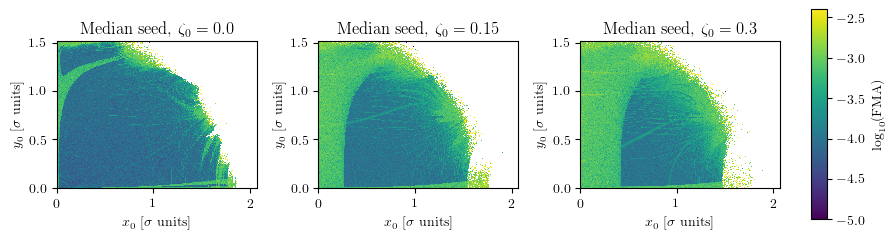

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3))

min_val = np.infty
max_val = -np.infty

for i in range(3):
    min_val = min(min_val, np.nanmin(tune_post_data_list[3+i][-1]))
    max_val = max(max_val, np.nanmax(tune_post_data_list[3+i][-1]))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(tune_post_data_list[3+i][-1].reshape(300, 300), origin="lower", extent=e_list_sigma[3+i], vmin=min_val, vmax=max_val, interpolation="nearest")
    ax.set_title(f"{l_name_list[i+3]} seed, $\\zeta_0={z_name_list[i+3]}$")
    ax.set_xlabel("$x_0$ [$\\sigma$ units]")
    ax.set_ylabel("$y_0$ [$\\sigma$ units]")

plt.tight_layout()
# add vertical colorbar to the right
cbar_ax = fig.add_axes([1.02, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, orientation="vertical", label="$\\log_{10}($FMA$)$")
plt.savefig(os.path.join(IMGDIR, "FMA.png"), dpi=600, bbox_inches="tight")

(300, 300, 4)


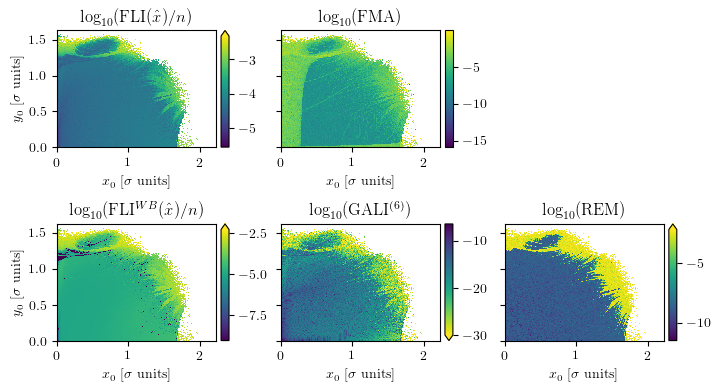

In [ ]:
import types
def bottom_offset(self, bboxes, bboxes2):
    bottom = self.axes.bbox.ymax
    self.offsetText.set(va="top", ha="left")
    self.offsetText.set_position(
            (-3, bottom + 17))

def register_bottom_offset(axis, func):
    axis._update_offset_text_position = types.MethodType(func, axis)    

fig = plt.figure(figsize=(8, 5))

gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 1]))
#axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[1, 2]))

t_idx = -1
idx = 7
samples = 300

cmap = axs[0].imshow((fli_x_post_data_list[idx][t_idx]).reshape((samples, samples)), origin='lower', cmap='viridis', extent=e_list_sigma[idx], interpolation="nearest")

axs[0].set_xlabel('$x_0$ [$\\sigma$ units]')
axs[0].set_ylabel('$y_0$ [$\\sigma$ units]')
# add side colorbar
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend='max')

axs[0].set_title("$\\log_{{10}}($FLI$(\\hat{x}) / n)$")

tmp = flibk_x_post_data_list[idx][t_idx].reshape((samples, samples)).copy()
tmp_mask = tmp == -14
cmap = plt.cm.get_cmap('viridis')
tmp[tmp_mask] = np.nan
norm = plt.Normalize(vmin=np.nanmin(tmp), vmax=np.nanmax(tmp))
rgba = cmap(norm(tmp))
print(rgba.shape)
# color red the tmp_mask
rgba[tmp_mask] = [1, 0, 0, 1]
rgba[~tmp_mask] = [0, 0, 0, 0]

tmp[tmp <= -14] = np.nan

cmap = axs[2].imshow(tmp, origin='lower', extent=e_list_sigma[idx], interpolation="nearest")
axs[2].imshow((rgba), origin='lower', extent=e_list_sigma[idx], interpolation="nearest")

axs[2].set_xlabel('$x_0$ [$\\sigma$ units]')
# hide y axis
# axs[2].set_yticklabels([])
axs[2].set_ylabel('$y_0$ [$\\sigma$ units]')
# add side colorbar
divider = make_axes_locatable(axs[2])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend='max')
# cbar.formatter.set_powerlimits((0, 0))
# register_bottom_offset(cbar.ax.yaxis, bottom_offset)

axs[2].set_title("$\\log_{{10}}($FLI$^{{WB}}(\\hat{x}) / n)$")

# cmap = axs[2].imshow((megno_x_post_data_list[idx][t_idx]).reshape((samples, samples)), origin='lower', cmap='viridis', extent=e_list_sigma[idx], interpolation="nearest")

# axs[2].set_xlabel('$x_0$ [$\\sigma$ units]')
# # hide y axis
# axs[2].set_yticklabels([])
# axs[2].set_ylabel('')
# # add side colorbar
# divider = make_axes_locatable(axs[2])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# cbar = plt.colorbar(cmap, cax=cax, extend='max')

# axs[2].set_title("$\\log_{{10}}($MEGNO$)$")

cmap = axs[3].imshow((gali_6_post_data_list[idx][t_idx]).reshape((samples, samples)), origin='lower', cmap='viridis_r', extent=e_list_sigma[idx], interpolation="nearest", vmin=-30)
cbar.formatter.set_powerlimits((0, 0))
register_bottom_offset(cbar.ax.yaxis, bottom_offset)

axs[3].set_xlabel('$x_0$ [$\\sigma$ units]')
axs[3].set_ylabel('$y_0$ [$\\sigma$ units]')

axs[3].set_yticklabels([])
axs[3].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[3])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend="min")

axs[3].set_title("$\\log_{{10}}($GALI$^{{(6)}})$")

cmap = axs[4].imshow((rem_post_data_list[idx][t_idx]).reshape((samples, samples)), origin='lower', cmap='viridis', extent=e_list_sigma[idx], interpolation="nearest")

axs[4].set_xlabel('$x_0$ [$\\sigma$ units]')
# hide y axis
axs[4].set_yticklabels([])
axs[4].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[4])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax, extend='max')

axs[4].set_title("$\\log_{{10}}($REM$)$")

cmap = axs[1].imshow((tune_post_data_list[idx][t_idx]).reshape((samples, samples)), origin='lower', cmap='viridis', extent=e_list_sigma[idx], interpolation="nearest")

axs[1].set_xlabel('$x_0$ [$\\sigma$ units]')
# hide y axis
axs[1].set_yticklabels([])
axs[1].set_ylabel('')
# add side colorbar
divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cmap, cax=cax)

axs[1].set_title("$\\log_{{10}}($FMA$)$")

# increase distance between subplots
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.01)

plt.savefig(os.path.join(IMGDIR, f"overview.png"), bbox_inches="tight", dpi=600)


-5.3445963264634315 -1.416557170113903
-15.105104768022994 -0.009735229453051839
1


/tmp/ipykernel_33073/134910306.py:36: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(tmp_data)


-10.103106608726424 -1.5909838419723308
-39.56355358499837 -0.9806781478323026
3
-15.595915462134798 -2.253440955403419
4


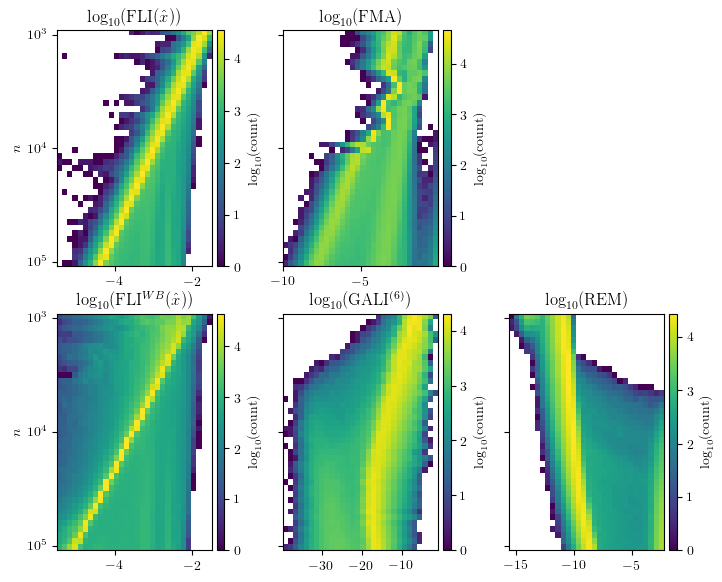

In [ ]:
fig = plt.figure(figsize=(8, 6.75))

gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])

axs = []
axs.append(plt.subplot(gs[0, 0]))
axs.append(plt.subplot(gs[0, 1]))
# axs.append(plt.subplot(gs[0, 2]))
axs.append(plt.subplot(gs[1, 0]))
axs.append(plt.subplot(gs[1, 1]))
axs.append(plt.subplot(gs[1, 2]))


idx = 4
mask = mask_list[idx]

for an_i, (ax, post_data, thresholds, title) in enumerate(
    zip(axs, 
        [fli_x_post_data_list[idx], tune_post_data_list[idx], flibk_x_post_data_list[idx], gali_6_post_data_list[idx], rem_post_data_list[idx]],
        [fli_x_thresh_list[idx], tune_thresh_list[idx], flibk_x_thresh_list[idx], gali_6_thresh_list[idx], rem_thresh_list[idx]],
        ["$\\log_{{10}}($FLI$(\\hat{{x}}))$", "$\\log_{{10}}($FMA$)$", "$\\log_{{10}}($FLI$^{{WB}}(\\hat{{x}}))$", "$\\log_{{10}}($GALI$^{{(6)}})$", "$\\log_{{10}}($REM$)$"])
    ):

    post_data = post_data[13:]
    thresholds = thresholds[13:]

    val_min, val_max = get_extents([l for l in post_data[::]], 10)
    print(val_min, val_max)
    if an_i == 0 or an_i == 2:
        val_min = -5.5
        val_max = -1.5 
    elif an_i == 1:
        val_min = -10

    tmp_data, bin_centers = compose_count_map([l[mask] for l in post_data], val_min, val_max, nbins=30, density=False)
    tmp_data = np.log10(tmp_data)
    # print(tmp_data.shape)
    # tmp_data = tmp_data[::13]

    cmap = ax.imshow(tmp_data, cmap='viridis', aspect='auto', extent=[val_min, val_max, -0.5, len(times[26::])-0.5], interpolation='none')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(cmap, cax=cax, label="$\\log_{{10}}(\\mathrm{{count}})$")

    # plot the thresholds over the imshow
    # for i, t in enumerate(thresholds):
    #     ax.plot([t, t], [(len(thresholds)-1-i)-0.5, (len(thresholds)-1-i)+0.5], '--', color='red')

    # set the y ticks at idx 0, 13, and 26, and set the labels as 10^3, 10^4, and 10^5
    ax.set_yticks([0, 13, 26])
    ax.set_yticklabels([f"$10^{{{int(np.log10(times[26:][0]))}}}$", f"$10^{{{int(np.log10(times[26:][13]))}}}$", f"$10^{{{int(np.log10(times[26:][26]))}}}$"][::-1])
    
    ax.set_ylabel("$n$")
    ax.set_title(title)

    if an_i != 0 and an_i != 2:
        print(an_i)
        ax.set_yticklabels([])
        ax.set_ylabel('')


# increase distance between subplots
# increase distance between subplots
plt.subplots_adjust(wspace=0.35)
# plt.subplots_adjust(hspace=0.01)

plt.savefig(os.path.join(IMGDIR, f"evolution.png"), bbox_inches="tight", dpi=600)